# Load in counts table & name samples

Load in raw transcript counts, normalized (TPM) counts,  (semi) quantitative transcript counts/L, or protein spectral counts associated with <b>ORFs</b>, or raw reads associated with <b>full length assembled contigs</b>. The anaysis options below depend on the type of file read in.

In [96]:
#a<-read.table('table.tab',header=T, stringsAsFactors=F,sep=' ') #raw counts to ORFs
#a<-read.table('TPM_table.tab',header=T, stringsAsFactors=F,sep=' ') #TPM counts
#a<-read.table('copiesperL.tab',header=T, stringsAsFactors=F,sep=' ') #copies per L
#a<-read.csv('copiesperL_ORFs_FactorIncluded.csv',header=T, stringsAsFactors=F,sep=' ') #copies peL with Factor
a<-read.csv('SamplesViewReportCLIO_AE1913merged_trans210506_updated220606exclusive.csv',header=T, stringsAsFactors=F) #exclusive spectral counts
#a<-read.table('/vortexfs1/omics/saito/BATS2019-clio-metaT/eukrhythmic_output/salmon_mega_merge/raw_individual/table.tab',header=T,stringsAsFactors=F,sep=' ') #raw counts, reads mapped to full assembly

In [ ]:
rownames(a)<-a$X #For transcript copies per L table "copiesperL"
#a<-a[,-1]

In [3]:
#For transcripts
rownames(a)<-a$Name #for TPM and raw transcript counts
#rownames(a)<-a$X #For transcript copies per L table "copiesperL"
a<-a[,-1] 

flip<-as.data.frame(t(a))
flip$X<-rownames(flip)

b<-read.csv('id.csv',header=T)
b<-b[,-1]

cts<-merge(flip, b, by='X')

rownames(cts)<-cts$label
cts<-cts[,-1]

cts<-cts[,-11044286] #Get rid of text columns in cds mapped reads table
cts<-cts[,-11044286]
cts<-cts[,-11044286]
cts<-cts[,-11044286]
cts<-cts[-45,]

#cts<-cts[,-43211818] #Get rid of text collumns in full transcripts mapped reads table
#cts<-cts[,-43211818]
#cts<-cts[,-43211818]
#cts<-cts[,-43211818]
#cts<-cts[,-43211818]
#cts<-cts[-45,]

In [97]:
#For proteins
rownames(a)<-a$Name 
a<-a[,-1]
colnames(a) <- gsub("X", "", colnames(a))
flip<-as.data.frame(t(a))
flip$X<-rownames(flip)
cts<-flip #for proteins
#cts[is.na(cts)] <- 0 #for proteins
cts<-cts[,-78583]

In [98]:
library(dplyr)

In [99]:
cts1<-as.data.frame(t(cts))

In [100]:
cts1$X<-rownames(cts1)

In [ ]:
options(repr.matrix.max.cols=80, repr.matrix.max.rows=80)

# Protein spectral count normalization (NSAF)

To be performed on protein spectral counts

In [61]:
length<-read.table('cds.length2.tab',header=F,sep=' ',stringsAsFactors=F) #ORF length in bp

In [62]:
colnames(length)<-c('X','length')

In [63]:
join<-merge(length, cts1, by='X',all=F) #join with ORF length

In [64]:
#NSAF normalized counts
join[is.na(join)] <- 0
join[,3:89]<-lapply(join[,3:89],as.numeric)
x <- join[3:89] / (join$length/3) #convert nucleotide bp to AA bp
nsaf <- t( t(x) * 1e3 / colSums(x) )
nsaf1<-as.data.frame(nsaf)
nsaf1$transcript_name<-join$X
cts1<-nsaf1

# Protein spectral count/L conversion

To be performed on non-NSAF normalized spectral counts

In [101]:
quant<-read.csv('BATS_quant.csv')
rownames(quant)<-quant$Name
head(quant)

,Sample,Name,Total_ug,ug_injected,L
,<chr>,<chr>,<int>,<int>,<dbl>
1_30_0.2,220517_2D_AE1913_BATS_BV55_st1_02um_30m,1_30_0.2,61,2,402
1_115_0.2,220517_2D_AE1913_BATS_BV55_st1_02um_115m,1_115_0.2,101,2,377
1_30_3,220517_2D_AE1913_BATS_BV55_st1_3um_30m,1_30_3,67,2,402
1_115_3,220517_2D_AE1913_BATS_BV55_st1_3um_115m,1_115_3,83,2,377
1_150,220517_2D_AE1913_CLIO018_150m,1_150,34,2,113
1_200,220517_2D_AE1913_CLIO018_200m,1_200,26,2,107


In [102]:
cts1<-cts1[,-88]
cts1<-cts1[,-79] #Remove 7_500, no metaP data
head(cts1)

,1_30_0.2,1_115_0.2,1_30_3,1_115_3,1_150,1_200,1_300,1_400,1_600,1_800,⋯,7_150,7_300,8_20,8_40,8_120,8_175,8_400,8_800,8_250,8_600
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
transabyss_HN039_.k110R1030902.p1,0,0,0,0,34,42,36,25,11,17,⋯,7,5,0,0,13,13,2,0,8,3
transabyss_HN032_.k50R4574327.p1,10,13,1,0,520,498,368,340,299,346,⋯,434,323,1,0,351,422,386,215,519,495
trinity_HN021_TRINITY_DN3758_c0_g1_i8.p1,0,0,0,0,10,9,10,8,0,0,⋯,7,6,0,0,16,10,0,0,4,2
trinity_HN021_TRINITY_DN3758_c0_g1_i6.p1,0,0,0,0,9,6,7,6,3,0,⋯,6,9,0,0,2,2,0,0,0,0
trinity_HN001_TRINITY_DN1034_c0_g1_i1.p1,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
trinity_HN009_TRINITY_DN5201_c0_g1_i1.p1,0,0,0,0,4,1,3,4,10,14,⋯,1,1,0,0,4,6,8,7,18,25


In [103]:
quant$factor<-(quant$Total_ug/quant$ug_injected)/(quant$L/2)
new=quant
new<-new[,-1]
new<-new[,-1]
new<-new[,-1]
new<-new[,-1]
new=t(new)
new<-new[-1,]
new=t(new)
head(new)

1_30_0.2,1_115_0.2,1_30_3,1_115_3,1_150,1_200,1_300,1_400,1_600,1_800,⋯,7_150,7_300,8_20,8_40,8_120,8_175,8_400,8_800,8_250,8_600
0.1517413,0.2679045,0.1666667,0.2201592,0.300885,0.2429907,0.4265403,0.2443134,0.2862099,0.2884615,⋯,0.08118081,0.101162,1.081442,1.531842,0.4241282,0.3192338,0.271164,0.2312544,0.06896552,0.1002211


In [104]:
res <- sweep(cts1, 2, new, `*`)
head(res)
cts1<-res

,1_30_0.2,1_115_0.2,1_30_3,1_115_3,1_150,1_200,1_300,1_400,1_600,1_800,⋯,7_150,7_300,8_20,8_40,8_120,8_175,8_400,8_800,8_250,8_600
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
transabyss_HN039_.k110R1030902.p1,0.000000,0.000000,0.0000000,0,10.230088,10.2056075,15.355450,6.1078349,3.1483088,4.903846,⋯,0.56826568,0.505810,0.000000,0,5.5136664,4.1500399,0.542328,0.000000,0.5517241,0.3006632
transabyss_HN032_.k50R4574327.p1,1.517413,3.482759,0.1666667,0,156.460177,121.0093458,156.966825,83.0665543,85.5767563,99.807692,⋯,35.23247232,32.675325,1.081442,0,148.8689915,134.7166800,104.669312,49.719692,35.7931034,49.6094326
trinity_HN021_TRINITY_DN3758_c0_g1_i8.p1,0.000000,0.000000,0.0000000,0,3.008850,2.1869159,4.265403,1.9545072,0.0000000,0.000000,⋯,0.56826568,0.606972,0.000000,0,6.7860509,3.1923384,0.000000,0.000000,0.2758621,0.2004422
trinity_HN021_TRINITY_DN3758_c0_g1_i6.p1,0.000000,0.000000,0.0000000,0,2.707965,1.4579439,2.985782,1.4658804,0.8586297,0.000000,⋯,0.48708487,0.910458,0.000000,0,0.8482564,0.6384677,0.000000,0.000000,0.0000000,0.0000000
trinity_HN001_TRINITY_DN1034_c0_g1_i1.p1,0.000000,0.000000,0.0000000,0,0.000000,0.0000000,0.000000,0.0000000,0.0000000,0.000000,⋯,0.00000000,0.000000,0.000000,0,0.0000000,0.0000000,0.000000,0.000000,0.0000000,0.0000000
trinity_HN009_TRINITY_DN5201_c0_g1_i1.p1,0.000000,0.000000,0.0000000,0,1.203540,0.2429907,1.279621,0.9772536,2.8620989,4.038462,⋯,0.08118081,0.101162,0.000000,0,1.6965127,1.9154030,2.169312,1.618781,1.2413793,2.5055269


# Load in annotation table and make stacked bar plots

Multiple EUKulele annotation thresholds and databases were tested! The bottom three are the ones used for the final analysis

In [10]:
library(caroline)
tax<-read.tab('newtaxa.eukprot.merged.fasta.transdecoder-estimated-taxonomy.out') 
# merged.fasta.transdecoder-estimated-taxonomy.pre022022.out = cds on old LCA
# merged.fasta.transdecoder-estimated-taxonomy.LCA.out = cds on old LCA
# merged_merged-estimated-taxonomy_fulltranscript.out = full transcript
# merged.fasta.transdecoder-estimated-taxonomy.out = phyloDB with 7% LCA
# merged.fasta.transdecoder-estimated-taxonomy.eukzoo.out = eukzoo, no LCA
# merged.fasta.transdecoder-estimated-taxonomy.eukzoo.LCA.out = eukzoo,5% LCA
# merged.fasta.transdecoder-estimated-taxonomy.LCA.phyloDB.within5percent.AddRef.out = phyloDB + 2 AddRefs from eukzoo, 5% LCA
# merged.fasta.transdecoder-estimated-taxonomy.LCA.phyloDB.within3percent.AddRef.out = phyloDB + 2 AddRefs from eukzoo, 3% LCA
# merged_merged-estimated-taxonomy.fullcontig.LCA.within3.out = phyloDB + 2 AddRefs from eukzoo, 3% LCA, full contigs
# merged.fasta.transdecoder-estimated-taxonomy.LCA.phyloDB.within3percent.AddRef.RefSeq.out = RefSeq + phyloDB + 2 AddRefs from eukzoo, 3% LCA on cds
# merged_merged-estimated-taxonomy.LCA.phyloDB_within3percent.Addref.Refseq.out = full contig version of above ^
# newtaxa.merged.fasta.transdecoder-estimated-taxonomy.out = manually curated lower level taxonomy for within-supergoup barplots on cds
# EukProt.merged.fasta.transdecoder-estimated-taxonomy.out = 3%LCA with RefSeq + phyloDB + AddRef + EukProt with EUKulele 2.0.5
# original.test.merged.fasta.transdecoder-estimated-taxonomy.out = 3%LCA with RefSeq + phyloDB + AddRef repeat with EUKulele 2.0.5, less ORFs ~3 mill
# EukProt.EUK2.0.0.merged.fasta.transdecoder-estimated-taxonomy.out = 3%LCA with RefSeq + phyloDB + AddRef + EukProt with EUKulele 2.0.0 (~7 mill ORFs)
# newcutoff.EukProt.merged.fasta.transdecoder-estimated-taxonomy.out = 3%LCA with RefSeq + phyloDB + AddRef + EukProt with EUKulele 2.0.0 and new cutoff percentages (start at genus)
# redo.original.merged.fasta.transdecoder-estimated-taxonomy.out = 3%LCA with RefSeq + phyloDB + AddRef repeat with EUKulele 2.0.0 and original tax cutoffs
# newtaxa.eukprot.merged.fasta.transdecoder-estimated-taxonomy.out = 3%LCA with RefSeq + phyloDB + AddRef + EukProt EUKulele 2.0.0 with fine taxa updated
# eukprottest.merged.fasta.transdecoder-estimated-taxonomy.out = default 2.0.7 with custom (should be default) EukProt json

aa<-tax[order(tax$transcript_name, (tax$max_pid)), ] 
bb<-aa[ !duplicated(aa$transcript_name), ] #Remove duplicates (low number of contigs have a duplicate)

tax<-bb

rownames(tax)<-tax$transcript_name

library(stringr)
library(tidyr)
tax<- tax %>%
  separate(full_classification, c("domain","supergroup", "division","class","order","family","genus","species"), ";")



Warning message:
“Expected 8 pieces. Missing pieces filled with `NA` in 7329870 rows [1, 2, 3, 4,
5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, ...].”


In [7]:
nrow(tax) #Number of contigs with a EUKulele annotation

[1] 7329870

In [8]:
#for transcripts
cts1$transcript_name<-rownames(cts1)
#merge<-merge(cts1, tax, by='transcript_name',all=TRUE) #for including unannotated ORFs 
merge<-merge(cts1, tax, by='transcript_name') 

In [106]:
#for proteins
cts1$transcript_name<-rownames(cts1) #for copies/L 
#cts1$transcript_name<-cts1$X #not needed for nsaf
merge<-merge(cts1, tax, by='transcript_name') 
rownames(merge)<-merge$transcript_name 

# Taxonomic breakdown of contigs in one stacked barplot

In [24]:
euk<-c('Eukaryota')
euks<-tax[tax$domain %in% euk,]

Consider either the entire microbial communities (#all), or eukaryotes-only (#euks only)

In [13]:
#euks only
library(dplyr)
#d <- euks %>%
#    group_by(division) %>% 
#    summarise(n = n())

#all
library(dplyr)
d <- tax %>%
    group_by(supergroup) %>% 
    summarise(n = n())

In [14]:
d<-as.data.frame(d)

In [15]:
sum(d$n)

[1] 7329870

In [16]:
#d[64,1]<-c('NA') #Rename NA as NA for euk
d[78,1]<-c('NA') #Rename NA as NAs for all

In [17]:
rownames(d)<-d$supergroup #supergroup for all, division for euk
d <- d %>% 
  mutate(Fasta = "Assembly")

In [22]:
write.csv(d,'allORFs.csv')

In [19]:
#d[64,1]<-NA #euk
d[78,1]<-NA #all

In [10]:
#Key euk taxa subset
library(janitor)
groups<-c(' Chlorophyta', ' Ciliophora', ' Collodictyonidae', ' Cryptophyta', ' Dinophyta', ' Discoba',' Foraminifera',' Fungi',' Haptophyta', ' Lobosa',' Marine_stramenopiles_MASTs group',' Metazoa',' Picozoa',' Radiolaria',' Stramenopiles_X')
targets<-d[d$division %in% groups,]
other<-d[!d$division %in% groups,] #Sum all other taxa
other<-other %>%
  adorn_totals("row")
targets<-rbind(targets,other[49,]) #NA is brought over
targets<-rbind(targets,other[50,]) #Other (sum of all other taxa) column is brought over
targets[17,2] = targets[17,2] - targets[16,2] #Subtract out "NA" from "Other"
targets[17, 1] <- "Other"
targets[17,3] <- "Assembly"
d<-targets
#targets


Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




In [20]:
#Key all taxa subset
#Key dataset-wide taxa subset for transcripts
library(janitor)
groups<-c(' Actinobacteria',' Alveolata',' Bacteroidetes/Chlorobi group',' Chloroflexi',' Cyanobacteria',' Excavata',' Firmicutes',' Hacrobia',' Nitrospinae/Tectomicrobia group',' Nitrospirae',' Opisthokonta',' Planctomycetes',' Proteobacteria',' Rhizaria',' Stramenopiles',' Thaumarchaeota')
targets<-d[d$supergroup %in% groups,]
other<-d[!d$supergroup %in% groups,] #Sum all other taxa
other<-other %>%
  adorn_totals("row")
targets<-rbind(targets,other[62,]) #NA is brought over
targets<-rbind(targets,other[63,]) #Other (sum of all other taxa) column is brought over
targets[18,2] = targets[18,2] - targets[17,2] #Subtract out "NA" from "Other"
targets[18, 1] <- "Other"
targets[18,3] <- "Assembly"
d<-targets
#targets

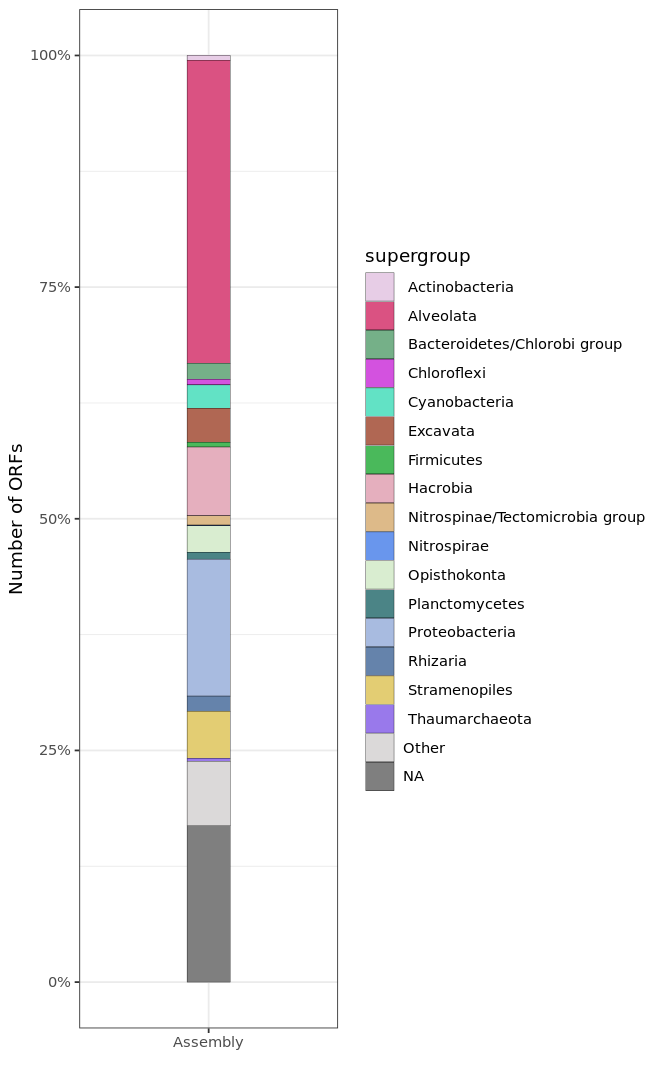

In [21]:
library(stringr)
library(gtools)
library(reshape2)
library(ggplot2)

library(RColorBrewer)


#euks
#myColor<-c("#FFFFEE","#588c5c","#ccccff","#2e436b",'#999966',"#80ff80",'#ffa31a','#47d1d1','#c44dff',"#e6e600","#cc0044",'#0052cc',"#ffd9b3","#fcf1f0","#c98f22",'#669999',"#ffe6ff",'#993d00',"#73e600",'#ffe74a',"#40057a","#d9ffff",'#000000',"#ffffcc",'#ac39ac','#1affff',"#147087","#c95e16",'#408000','#bb80bb',"#ff5521",'#942649','#ff0000',"#bfd119",'#ff9999','#bbffdd','#ff59dd','#807b79','#426A5A','#86BBD8','#FFFFFE','#ff0000','#ff9999','#bbffdd','#ff59dd','#3891A6','#426A5A','#86BBD8','#FFFFFE')
#myColor<-c("#80ff80","#c44dff","#ccccff", "#cc0044", "#0052cc", '#ffd9b3',"#669999","#ffe6ff","#ffe74a","#000000","#9c7b11","#1affff","#fc8123","#942649","#ff9999", "#dbd9d9",'#999966',"#80ff80",'#ffa31a','#47d1d1','#c44dff',"#e6e600","#cc0044",'#0052cc',"#ffd9b3","#fcf1f0","#c98f22",'#669999',"#ffe6ff",'#993d00',"#73e600",'#ffe74a',"#40057a","#d9ffff",'#000000',"#ffffcc",'#ac39ac','#1affff',"#147087","#c95e16",'#408000','#bb80bb',"#ff5521",'#942649','#ff0000',"#bfd119",'#ff9999','#bbffdd','#ff59dd','#3891A6','#426A5A','#86BBD8','#FFFFFE','#ff0000','#ff9999','#bbffdd','#ff59dd','#3891A6','#426A5A','#86BBD8','#FFFFFE','#7AEE3F','#E7CDE6','#DA5282','#EE9475','#AB6C97','#E783A1','#5BBAE9','#B434EB','#E46CCD','#7AEE3F','#E7CDE6','#DA5282','#EE9475','#AB6C97','#E783A1','#5BBAE9','#B434EB','#E46CCD','#E7CDE6','#DA5282','#EE9475','#AB6C97','#E783A1','#5BBAE9','#B434EB','#E46CCD','#E7CDE6','#DA5282','#EE9475','#AB6C97','#E783A1','#5BBAE9','#B434EB','#E46CCD')


#all
#myColor<-c('#c44dff','#7AEE3F','#E7CDE6','#DA5282','#EE9475','#AB6C97','#E783A1','#5BBAE9','#B434EB',"#0052cc",'#E46CCD','#6450DE','#75B088','#FFFFFE','#DDE94A','#73e600',"#ff9999",'#ac39ac','#9C87D5','#40057a','#D19B29','#E0ED81','#60EDA8','#D352DF','#E15840','#000000','#93C03D','#62E2C5','#98EADD','#ECDBBE','#E8CF43','#408000','#bb80bb','#D991DF','#942649','#ff0000',"#bfd119",'#6C418C','#B06753','#86BBD8','#4AB95B','#3891A6','#6BF377','#ABD7E2','#E5AFBE','#A7EB83','#E331A9','#E2E0E4','#426A5A','#86BBD8','#DDBA89','#6996ED','#f9f9f9','#D9EDD0','#4B8486','#A8BBE0','#6583AB','#D5E5A3','#A9ECB5','#E4AB9D','#E3CD73','#E29B55','#93C03D','#9979EB','#BEA7E1','#B3EF45','#6C418C','#c9c9c9','#e4e4e4','#ACA5A1','#b2abc4','#909652','#5DD3DF','#757174')
myColor<-c('#E7CDE6','#DA5282','#75B088','#D352DF','#62E2C5','#B06753','#4AB95B','#E5AFBE','#DDBA89','#6996ED','#D9EDD0','#4B8486','#A8BBE0','#6583AB','#E3CD73','#9979EB','#dbd9d9')

options(repr.plot.width = 5.5, repr.plot.height = 9) # width 7 for euks, 5.5 for others, 12 for all

#division (euks) or supergroup (all)
ggplot(d, aes(x = Fasta, y = n, fill = supergroup))+
  geom_bar(position = "fill",stat = "identity", width=0.2, colour="black", size=0.1) + scale_fill_manual(values=myColor) + scale_y_continuous(labels = scales::percent_format()) + theme_bw()  + xlab("") + ylab("Number of ORFs")

#ggsave(file="eukprot_all_ORFs.eps", dpi = 600, width = 5.5, height = 9)

## Stacked barplots for taxonomic composition across samples

In [107]:
euk<-c('Eukaryota')
o<-merge[merge$domain %in% euk,] 
#c<-o[1:45] #transcripts
c<-o[1:88] #proteins 
c$division<-o$division #euks
#c$class<-o$class #euks eukprot
#c$supergroup<-#o$supergroup #all
rownames(c)<-c$transcript_name
c<-c[,-1]
head(c)

dino<-c(' Dinophyta')
DINO<-merge[merge$division %in% dino,] 
DINO1<-DINO[1:45]
#DINO1<-DINO[1:88]
DINO1$order<-DINO$order
rownames(DINO1)<-DINO$transcript_name
DINO1<-DINO1[,-1]
#head(DINO1)

hapto<-c(' Haptophyta')
HAPTO<-merge[merge$division %in% hapto,] 
HAPTO1<-HAPTO[1:45]
#HAPTO1<-HAPTO[1:88]
HAPTO1$order<-HAPTO$order
rownames(HAPTO1)<-HAPTO$transcript_name
HAPTO1<-HAPTO1[,-1]
#head(HAPTO1)

ochro<-c(' Stramenopiles_X')
OCHRO<-merge[merge$division %in% ochro,] 
OCHRO1<-OCHRO[1:45]
#OCHRO1<-OCHRO[1:88]
OCHRO1$class<-OCHRO$class
rownames(OCHRO1)<-OCHRO$transcript_name
OCHRO1<-OCHRO1[,-1]
#head(OCHRO)

meta<-c(' Metazoa')
META<-merge[merge$division %in% meta,] 
META1<-META[1:45]
#META1<-META[1:88]
META1$class<-META$class
rownames(META1)<-META$transcript_name
META1<-META1[,-1]
#head(UMBA)

cil<-c(' Ciliophora')
CIL<-merge[merge$division %in% cil,] 
CIL1<-CIL[1:45]
#CIL1<-CIL[1:88]
CIL1$class<-CIL$class
rownames(CIL1)<-CIL$transcript_name
CIL1<-CIL1[,-1]
#head(CIL)

,1_30_0.2,1_115_0.2,1_30_3,1_115_3,1_150,1_200,1_300,1_400,1_600,1_800,⋯,8_20,8_40,8_120,8_175,8_400,8_800,8_250,8_600,X,division
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>
megahit_HN001_k141_102362.p1,0,0,0.0000000,0.0000000,0,0,0,0,0,0,⋯,0.000000,0.000000,0,0,0,0,0,0,0,Telonemia
megahit_HN001_k141_103848.p3,0,0,0.0000000,0.2201592,0,0,0,0,0,0,⋯,0.000000,1.531842,0,0,0,0,0,0,0,Haptophyta
megahit_HN001_k141_105757.p1,0,0,0.1666667,0.0000000,0,0,0,0,0,0,⋯,0.000000,0.000000,0,0,0,0,0,0,0,Dinophyta
megahit_HN001_k141_106962.p1,0,0,0.0000000,0.0000000,0,0,0,0,0,0,⋯,0.000000,0.000000,0,0,0,0,0,0,0,Stramenopiles_X
megahit_HN001_k141_113192.p1,0,0,0.0000000,0.0000000,0,0,0,0,0,0,⋯,0.000000,0.000000,0,0,0,0,0,0,0,Choanoflagellida
megahit_HN001_k141_115602.p1,0,0,0.0000000,0.0000000,0,0,0,0,0,0,⋯,1.081442,0.000000,0,0,0,0,0,0,0,Dinophyta


In [ ]:
#For investigating unmapped reads
#unann<-NA
#unannot<-merge[merge$ambiguous %in% unann,]
#unannot$supergroup<-c('unannotated')
#re-merge counts and annotations using all=FALSE to isolate counts with annotations
#then merge annotated and unannotated dfs
new<-rbind(merge, unannot) #join reads from unannotated ORFs in same df as EUKulele-annotated
merge<-new

In [115]:
#Total community (euk + bact)

c<-merge[1:88] #45 for transcripts, 88 including prot samples
c$division<-merge$supergroup
rownames(c)<-c$transcript_name
c<-c[,-1]


library(dplyr)
d <- c %>%
    group_by(division) %>% 
    summarise_each(list(sum))

Warning message:
“`summarise_each()` was deprecated in dplyr 0.7.0.
ℹ Please use `across()` instead.”


In [15]:
sum(d$`2_400`)

[1] 276.9978

In [13]:
library(dplyr)
#euks-only

#all euks
d <- c %>%
    group_by(division) %>% 
    summarise_each(list(sum))

#dinos
#library(dplyr)
#d <- DINO1 %>%
#    group_by(order) %>% 
#    summarise_each(list(sum))

#haptophytes
#d <- HAPTO1 %>%
#    group_by(order) %>% 
#    summarise_each(list(sum))

#stramenopiles
#d <- OCHRO1 %>%
#    group_by(class) %>% 
#    summarise_each(list(sum))

#ciliates
#d <- CIL1 %>%
#    group_by(class) %>% 
# summarise_each(list(sum))

#animals
#d <- META1 %>%
#    group_by(class) %>% 
#    summarise_each(list(sum))

Warning message:
“`summarise_each()` was deprecated in dplyr 0.7.0.
ℹ Please use `across()` instead.”


In [118]:
x<-colSums(d[,-1])
write.csv(x, 'spectralcountsLsum.csv')

division,1_30_0.2,1_115_0.2,1_30_3,1_115_3,1_150,1_200,1_300,1_400,1_600,⋯,7_300,8_20,8_40,8_120,8_175,8_400,8_800,8_250,8_600,X
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
Acidobacteria,0.1517413,0.535809,0.8333333,0.6604775,31.292035,40.3364486,138.1990521,80.3791070,59.2454467,⋯,33.181135,3.244326,0.000000,14.844486,16.6001596,8.948413,12.7189909,2.75862069,13.3294031,0
Actinobacteria,14.2636816,35.899204,2.3333333,1.9814324,102.601770,103.0280374,305.4028436,158.3150800,182.8881180,⋯,40.464798,38.931909,42.891566,98.397738,96.4086193,115.515873,91.8079888,32.89655172,59.8319823,0
Alveolata,92.4104478,211.644562,682.3333333,1281.9867374,349.628319,179.8130841,257.2037915,114.8272957,136.5221162,⋯,26.504443,1469.679573,3241.376936,281.621112,169.5131684,143.174603,99.9018921,38.96551724,66.4465733,0
Amoebozoa,0.1517413,1.875332,0.1666667,1.1007958,0.000000,0.2429907,0.8530806,0.2443134,0.8586297,⋯,0.101162,4.325768,6.127367,0.000000,0.0000000,0.271164,0.0000000,0.06896552,0.1002211,0
Ancyromonadida,0.0000000,0.000000,0.0000000,0.0000000,0.000000,0.0000000,0.0000000,0.0000000,0.0000000,⋯,0.000000,0.000000,0.000000,1.272385,0.6384677,0.000000,0.0000000,0.00000000,0.0000000,0
Aquificae,0.0000000,0.000000,0.0000000,0.0000000,0.300885,0.0000000,1.7061611,0.9772536,0.8586297,⋯,0.101162,0.000000,0.000000,0.000000,0.3192338,0.271164,0.4625088,0.13793103,0.3006632,0


In [11]:
#For transcripts - need to add in empty columns for protein samples with no corresponding transcript data
d$X1_20<-0
d$X1_150<-0
d$X1_175<-0
d$X1_250<-0
d$X1_300<-0
d$X1_350<-0
d$X1_600<-0
d$X2_60<-0
d$X2_90<-0
d$X2_150<-0
d$X2_600<-0
d$X3_10<-0
d$X3_30<-0
d$X3_45<-0
d$X3_60<-0
d$X3_75<-0
d$X3_90<-0
d$X3_105<-0
d$X3_150<-0
d$X3_175<-0
d$X3_1200<-0
d$X5_40<-0
d$X5_70<-0
d$X5_150<-0
d$X5_600<-0
d$X6_40<-0
d$X6_70<-0
d$X6_150<-0
d$X6_600<-0
d$X6_1500<-0
d$X6_2500<-0
d$X6_3500<-0
d$X6_4050<-0
d$X7_40<-0
d$X7_70<-0
d$X7_112<-0
d$X7_117<-0
d$X7_122<-0
d$X7_150<-0
d$X7_300<-0
d$X8_20<-0
d$X8_400<-0
d$X8_800<-0
colnames(d)<-gsub("X", "", colnames(d))

In [12]:
#Key euk taxa subset for transcripts
library(janitor)
groups<-c(' Chlorophyta', ' Ciliophora', ' Collodictyonidae', ' Cryptophyta', ' Dinophyta', ' Discoba',' Foraminifera',' Fungi',' Haptophyta', ' Lobosa',' Marine_stramenopiles_MASTs group',' Metazoa',' Picozoa',' Radiolaria',' Stramenopiles_X')
targets<-d[d$division %in% groups,]
other<-d[!d$division %in% groups,] #Sum all other taxa
other<-other %>%
  adorn_totals("row")
targets<-rbind(targets,other[50,]) #NA is brought over
targets<-rbind(targets,other[51,]) #Other (sum of all other taxa) column is brought over
targets[17,2:88] = targets[17,2:88] - targets[16,2:88] #Subtract out "NA" from "Other"
targets[17, 1] <- "Other"
d<-targets


Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




In [27]:
#Key euk taxa subset for proteins
library(janitor)
groups<-c(' Chlorophyta', ' Ciliophora', ' Collodictyonidae', ' Cryptophyta', ' Dinophyta', ' Discoba',' Foraminifera',' Fungi',' Haptophyta', ' Lobosa',' Marine_stramenopiles_MASTs group',' Metazoa',' Picozoa',' Radiolaria',' Stramenopiles_X')
targets<-d[d$division %in% groups,]
other<-d[!d$division %in% groups,] #Sum all other taxa
other<-other %>%
  adorn_totals("row")
targets<-rbind(targets,other[31,]) #NA is brought over
targets<-rbind(targets,other[32,]) #Other (sum of all other taxa) column is brought over
targets[17,2:88] = targets[17,2:88] - targets[16,2:88] #Subtract out "NA" from "Other"
targets[17, 1] <- "Other"
d<-targets

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”

Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




In [34]:
#Key dataset-wide taxa subset for transcripts
library(janitor)
groups<-c(' Actinobacteria',' Alveolata',' Bacteroidetes/Chlorobi group',' Chloroflexi',' Cyanobacteria',' Excavata',' Firmicutes',' Hacrobia',' Nitrospinae/Tectomicrobia group',' Nitrospirae',' Opisthokonta',' Planctomycetes',' Proteobacteria',' Rhizaria',' Stramenopiles',' Thaumarchaeota')
targets<-d[d$division %in% groups,]
other<-d[!d$division %in% groups,] #Sum all other taxa
other<-other %>%
  adorn_totals("row")
targets<-rbind(targets,other[62,]) #NA is brought over
targets<-rbind(targets,other[63,]) #Other (sum of all other taxa) column is brought over
targets[18,2:88] = targets[18,2:88] - targets[17,2:88] #Subtract out "NA" from "Other"
targets[18, 1] <- "Other"
d<-targets
#targets

In [94]:
#Key dataset-wide taxa subset for proteins
library(janitor)
groups<-c(' Actinobacteria',' Alveolata',' Bacteroidetes/Chlorobi group',' Chloroflexi',' Cyanobacteria',' Excavata',' Firmicutes',' Hacrobia',' Nitrospinae/Tectomicrobia group',' Nitrospirae',' Opisthokonta',' Planctomycetes',' Proteobacteria',' Rhizaria',' Stramenopiles',' Thaumarchaeota')
targets<-d[d$division %in% groups,]
other<-d[!d$division %in% groups,] #Sum all other taxa
other<-other %>%
  adorn_totals("row")
targets<-rbind(targets,other[40,]) #NA is brought over
targets<-rbind(targets,other[41,]) #Other (sum of all other taxa) column is brought over
targets[18,2:88] = targets[18,2:88] - targets[17,2:88] #Subtract out "NA" from "Other"
targets[18, 1] <- "Other"
d<-targets
#targets

In [119]:
#Key dataset-wide taxa subset for proteins - copies/L barplot
d$'7_500'<-0 #For spectral counts/L barplot
d<-d[,-88]

library(janitor)
groups<-c(' Actinobacteria',' Alveolata',' Bacteroidetes/Chlorobi group',' Chloroflexi',' Cyanobacteria',' Excavata',' Firmicutes',' Hacrobia',' Nitrospinae/Tectomicrobia group',' Nitrospirae',' Opisthokonta',' Planctomycetes',' Proteobacteria',' Rhizaria',' Stramenopiles',' Thaumarchaeota')
targets<-d[d$division %in% groups,]
other<-d[!d$division %in% groups,] #Sum all other taxa
other<-other %>%
  adorn_totals("row")
targets<-rbind(targets,other[40,]) #NA is brought over
targets<-rbind(targets,other[41,]) #Other (sum of all other taxa) column is brought over
targets[18,2:88] = targets[18,2:88] - targets[17,2:88] #Subtract out "NA" from "Other"
targets[18, 1] <- "Other"
d<-targets
#targets

Using division as id variables



ERROR: Error in arrangeGrob(gg1, gg2, gg3, ncol = 3): could not find function "arrangeGrob"


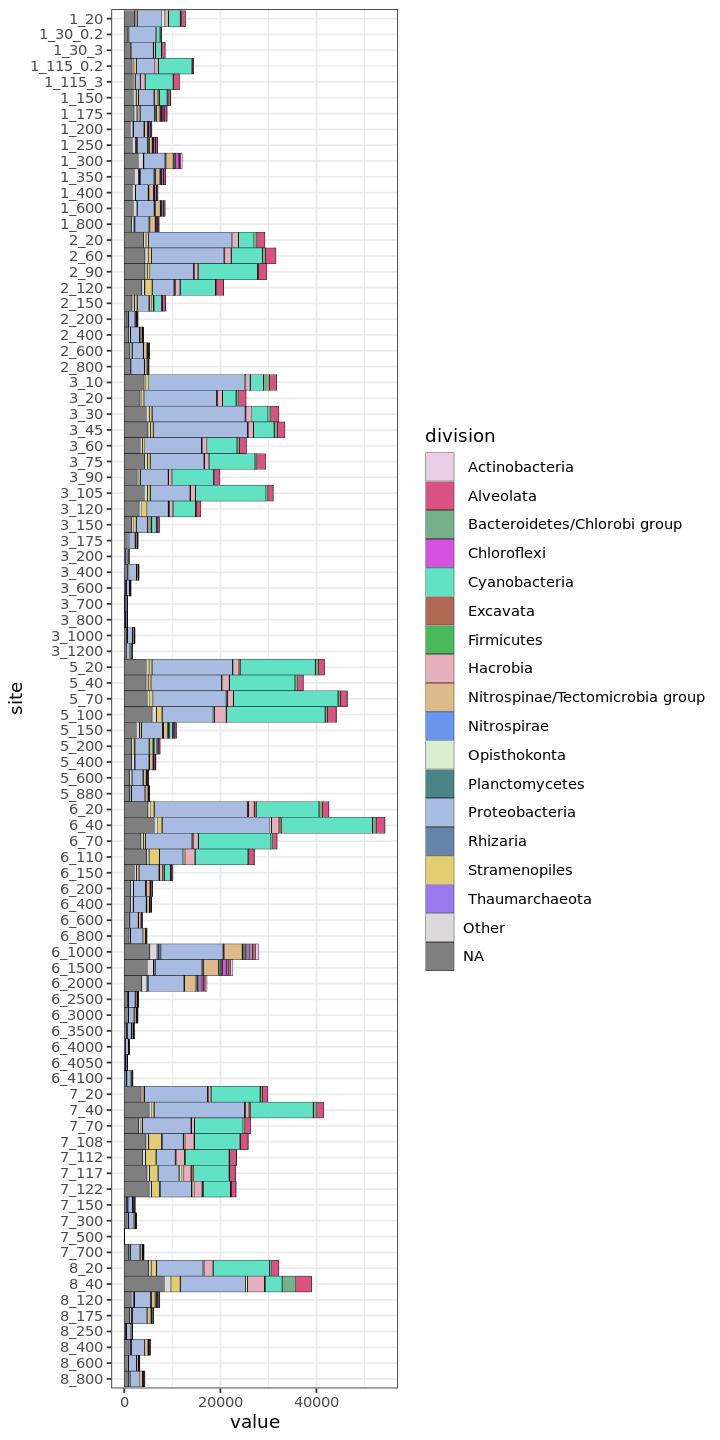

In [121]:
library(stringr)
library(gtools)
library(reshape2)
library(ggplot2)


xx <- melt(d)

colnames(xx)<-c('division','site','value')
xxx<-subset(xx, select = c('site','division','value'))

a<-read.csv('levels.csv', header=T) #Change levels using the desired order
xxx$site <- factor(xxx$site, levels = rev(a$ID))
a$ID <- factor(a$ID, levels = rev(a$ID))

#euks transcripts
#myColor<-c("#FFFFEE","#588c5c","#ccccff","#2e436b",'#999966',"#80ff80",'#ffa31a','#47d1d1','#c44dff',"#e6e600","#cc0044",'#0052cc',"#ffd9b3","#fcf1f0","#c98f22",'#669999',"#ffe6ff",'#993d00',"#73e600",'#ffe74a',"#40057a","#d9ffff",'#000000',"#ffffcc",'#ac39ac','#1affff',"#147087","#c95e16",'#408000','#bb80bb',"#ff5521",'#942649','#ff0000',"#bfd119",'#ff9999','#bbffdd','#ff59dd','#3891A6','#426A5A','#86BBD8','#FFFFFE','#ff0000','#ff9999','#bbffdd','#ff59dd','#3891A6','#426A5A','#86BBD8','#FFFFFE','#7AEE3F','#E7CDE6','#DA5282','#EE9475','#AB6C97','#E783A1','#5BBAE9','#B434EB','#E46CCD','#7AEE3F','#E7CDE6','#DA5282','#EE9475','#AB6C97','#E783A1','#5BBAE9','#B434EB','#E46CCD','#E7CDE6','#DA5282','#EE9475','#AB6C97','#E783A1','#5BBAE9','#B434EB','#E46CCD','#E7CDE6','#DA5282','#EE9475','#AB6C97','#E783A1','#5BBAE9','#B434EB','#E46CCD')

#subset out euk taxa of interest, transcripts & proteins
#myColor<-c("#80ff80","#c44dff","#ccccff", "#cc0044", "#0052cc", '#ffd9b3',"#669999","#ffe6ff","#ffe74a","#000000","#9c7b11","#1affff","#fc8123","#942649","#ff9999", "#dbd9d9",'#999966',"#80ff80",'#ffa31a','#47d1d1','#c44dff',"#e6e600","#cc0044",'#0052cc',"#ffd9b3","#fcf1f0","#c98f22",'#669999',"#ffe6ff",'#993d00',"#73e600",'#ffe74a',"#40057a","#d9ffff",'#000000',"#ffffcc",'#ac39ac','#1affff',"#147087","#c95e16",'#408000','#bb80bb',"#ff5521",'#942649','#ff0000',"#bfd119",'#ff9999','#bbffdd','#ff59dd','#3891A6','#426A5A','#86BBD8','#FFFFFE','#ff0000','#ff9999','#bbffdd','#ff59dd','#3891A6','#426A5A','#86BBD8','#FFFFFE','#7AEE3F','#E7CDE6','#DA5282','#EE9475','#AB6C97','#E783A1','#5BBAE9','#B434EB','#E46CCD','#7AEE3F','#E7CDE6','#DA5282','#EE9475','#AB6C97','#E783A1','#5BBAE9','#B434EB','#E46CCD','#E7CDE6','#DA5282','#EE9475','#AB6C97','#E783A1','#5BBAE9','#B434EB','#E46CCD','#E7CDE6','#DA5282','#EE9475','#AB6C97','#E783A1','#5BBAE9','#B434EB','#E46CCD')

#subset out all taxa of interest, transcripts & proteins
myColor<-c('#E7CDE6','#DA5282','#75B088','#D352DF','#62E2C5','#B06753','#4AB95B','#E5AFBE','#DDBA89','#6996ED','#D9EDD0','#4B8486','#A8BBE0','#6583AB','#E3CD73','#9979EB','#dbd9d9')



#euks-all contigs
#myColor<-c("#FFFFEE","#588c5c","#ccccff","#2e436b",'#999966',"#80ff80",'#ffa31a','#47d1d1','#c44dff',"#EE9475","#e6e600","#cc0044",'#0052cc',"#ffd9b3","#75B088","#fcf1f0","#c98f22",'#669999',"#ffe6ff",'#993d00',"#73e600",'#ffe74a',"#40057a","#d9ffff",'#000000',"#ffffcc",'#ac39ac','#1affff',"#ABD7E2","#147087","#c95e16",'#408000','#bb80bb',"#ff5521",'#942649','#ff0000',"#bfd119",'#ff9999','#bbffdd','#ff59dd','#3891A6','#426A5A','#86BBD8','#FFFFFE','#ff0000','#ff9999','#bbffdd','#ff59dd','#3891A6','#426A5A','#86BBD8','#FFFFFE')

#euks proteins 
#myColor<-c("#FFFFEE","#ccccff","#2e436b",'#999966',"#80ff80",'#ffa31a','#47d1d1','#c44dff',"#e6e600","#cc0044",'#0052cc',"#ffd9b3",'#669999',"#ffe6ff",'#993d00','#73e600','#ffe74a','#40057a','#000000','#1affff','#147087','#408000','#bb80bb','#942649','#ff0000','#ff9999','#bbffdd','#ff59dd','#3891A6','#426A5A','#86BBD8','#FFFFFE')


#all taxa phylodb + refseq transcripts
#myColor<-c('#c44dff','#7AEE3F','#E7CDE6','#DA5282','#EE9475','#AB6C97','#E783A1','#5BBAE9','#B434EB',"#0052cc",'#E46CCD','#6450DE','#75B088','#FFFFFE','#DDE94A','#73e600',"#ff9999",'#ac39ac','#9C87D5','#40057a','#D19B29','#E0ED81','#60EDA8','#D352DF','#E15840','#000000','#93C03D','#62E2C5','#98EADD','#ECDBBE','#E8CF43','#408000','#bb80bb','#D991DF','#942649','#ff0000',"#bfd119",'#6C418C','#B06753','#86BBD8','#4AB95B','#3891A6','#6BF377','#ABD7E2','#E5AFBE','#A7EB83','#E331A9','#E2E0E4','#426A5A','#86BBD8','#DDBA89','#6996ED','#f9f9f9','#D9EDD0','#4B8486','#A8BBE0','#6583AB','#D5E5A3','#A9ECB5','#E4AB9D','#E3CD73','#E29B55','#93C03D','#9979EB','#BEA7E1','#B3EF45','#6C418C','#c9c9c9','#e4e4e4','#ACA5A1','#b2abc4','#909652','#5DD3DF','#EEB5E7')
#myColor<-c('#7AEE3F','#E7CDE6','#DA5282','#EE9475','#AB6C97','#E783A1','#5BBAE9','#B434EB','#E46CCD','#6450DE','#75B088','#DDE94A','#9C87D5','#D19B29','#E0ED81','#60EDA8','#D352DF','#E15840','#93C03D','#62E2C5','#98EADD','#ECDBBE','#E8CF43','#D991DF','#6C418C','#B06753','#4AB95B','#6BF377','#ABD7E2','#E5AFBE','#A7EB83','#E331A9','#E2E0E4','#DDBA89','#6996ED','#D9EDD0','#4B8486','#A8BBE0','#6583AB','#D5E5A3','#A9ECB5','#E4AB9D','#E3CD73','#E29B55','#9979EB','#BEA7E1','#B3EF45','#ACA5A1','#909652','#5DD3DF','#EEB5E7')

#all taxa phylodb proteins
#myColor<-c('#7AEE3F','#E7CDE6','#DA5282','#EE9475','#AB6C97','#E783A1','#5BBAE9','#B434EB','#E46CCD','#6450DE','#75B088','#E0ED81','#9C87D5','#D19B29','#E0ED81','#60EDA8','#D352DF','#E15840','#93C03D','#62E2C5','#98EADD','#ECDBBE','#E8CF43','#D991DF','#6C418C','#B06753','#4AB95B','#6BF377','#ABD7E2','#E5AFBE','#A7EB83','#E331A9','#E2E0E4','#DDBA89','#6996ED','#D9EDD0','#4B8486','#A8BBE0','#6583AB','#D5E5A3','#A9ECB5','#E4AB9D','#E3CD73','#E29B55','#9979EB','#BEA7E1','#B3EF45','#c9c9c9','#ACA5A1','#909652','#5DD3DF','#EEB5E7','#7AEE3F','#E7CDE6','#DA5282','#EE9475','#E783A1','#5BBAE9','#B434EB','#75B088','#E0ED81','#A7EB83','#60EDA8','#D352DF','#E15840','#93C03D','#62E2C5','#98EADD','#ECDBBE','#E8CF43','#000000','#FFFFFE','#6C418C','#B06753','#4AB95B','#6BF377','#ABD7E2','#E5AFBE','#E331A9','#6996ED','#D9EDD0','#4B8486','#A8BBE0','#6583AB','#D5E5A3','#E4AB9D','#20d47a','#cbd420','#E3CD73','#E29B55','#9979EB','#BEA7E1','#B3EF45','#b8165f','#ACA5A1','#909652','#5DD3DF','#EEB5E7')

library('randomcoloR')
#set.seed(1)
#myColor<-distinctColorPalette(k = 150, altCol = FALSE, runTsne = FALSE)


#dinos
library(RColorBrewer)
#myColor <- colorRampPalette(brewer.pal(9, "RdBu"))(15)

#haptos
#myColor <- colorRampPalette(brewer.pal(9, "PuOr"))(6)

#ochro
library('randomcoloR')
#set.seed(1)
#myColor<-distinctColorPalette(k = 48, altCol = FALSE, runTsne = FALSE)
#myColor <- colorRampPalette(brewer.pal(9, "PiYG"))(16)

#ciliates
#library('randomcoloR')
#set.seed(13)
#myColor <- colorRampPalette(rev(brewer.pal(9, "PRGn")))(13)

#Stacked barplots scaled to 100%
#options(repr.plot.width = 6.5, repr.plot.height = 12) # width 7 copies per, 8.5 pigments, 7 taxa fine

options(repr.plot.width = 6, repr.plot.height = 12) # all taxa

#relative 
#g1<-ggplot(xxx, aes(site, value, fill = division))+
#  geom_bar(position = "fill",stat = "identity", width=1, colour="black", size=0.1) + scale_fill_manual(values=myColor) + scale_y_continuous(labels = scales::percent_format()) + theme_bw() + coord_flip()
#g1

#For absolute counts
g1<-ggplot(xxx, aes(site, value, fill = division))+
  geom_bar(stat = "identity", width=1, colour="black", size=0.1) + scale_fill_manual(values=myColor) + theme_bw() + coord_flip()
g1
ggsave(file="eukprot_spectralcountsL.eps", g1, dpi = 600, width = 6, height = 12)

#Depth scale bar

x <- arrangeGrob(gg1, gg2, gg3, ncol=3)

options(repr.plot.width = 18, repr.plot.height = 12)

g2 <- ggplot(a, aes(x = 1, y = ID, fill = depth)) +
  geom_tile() + theme_bw() + coord_fixed() + scale_fill_gradient(low = "white", high = "black") + theme(legend.position = "right")

g3 <- ggplot(a, aes(x = 1, y = ID, shape=a$site)) + geom_point(color='black', size=4, shape = a$site) + 
 scale_shape_manual(name = "legend", values = c(15, 16,17,18,19,8,9)) + theme(legend.position = "top") + theme_bw()

library(gridExtra)

gg1 <- ggplot_gtable(ggplot_build(g1))
gg2 <- ggplot_gtable(ggplot_build(g2))
gg3 <- ggplot_gtable(ggplot_build(g3))

options(repr.plot.width = 21, repr.plot.height = 12)

#grid.arrange(gg1, gg2, gg3, ncol=3)
#prints to screen

x <- arrangeGrob(gg1, gg2, gg3, ncol=3)
#ggsave(file="eukprot_copiesL.eps", x, dpi = 600, width = 21, height = 12)


In [29]:
write.csv(d, 'orfs_unannot_transcripts.csv')

In [29]:
nrow(c)

[1] 18321

In [109]:
#Investigating "NA" ORFs
oli<-NA
euk<-c('Eukaryota')
o<-merge[merge$domain %in% euk,] 
x<-o[o$division %in% oli,]
head(x)
#write.csv(x, 'NA_phylodb_AddRef_RefSeq.csv')

,transcript_name,1_30_0.2,1_115_3,1_200,1_400,1_800,2_20,2_120,2_200,2_400,⋯,division,class,order,family,genus,species,classification,max_pid,ambiguous,counts
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<lgl>
11,megahit_HN001_k141_10006.p1,3.793,0,0,0,0,0,0,0,0,⋯,NA,NA,NA,NA,NA,NA,Eukaryota,271.60,1,NA
12,megahit_HN001_k141_100070.p2,0.000,0,0,0,0,0,0,0,0,⋯,NA,NA,NA,NA,NA,NA,Eukaryota,419.04,1,NA
29,megahit_HN001_k141_10017.p2,8.026,0,0,0,0,0,0,0,0,⋯,NA,NA,NA,NA,NA,NA,Eukaryota,312.34,1,NA
35,megahit_HN001_k141_100211.p2,19.917,0,0,0,0,0,0,0,0,⋯,NA,NA,NA,NA,NA,NA,Eukaryota,117.37,1,NA
46,megahit_HN001_k141_100248.p1,17.000,0,0,0,0,0,0,0,0,⋯,NA,NA,NA,NA,NA,NA,Eukaryota,185.27,1,NA
51,megahit_HN001_k141_100276.p1,23.000,1,0,0,0,1,0,0,0,⋯,NA,NA,NA,NA,NA,NA,Eukaryota,309.43,1,NA


In [18]:
myColor

[1] "#80ff80" "#c44dff" "#ccccff" "#cc0044" "#0052cc" "#ffd9b3" "#669999"
 [8] "#ffe6ff" "#ffe74a" "#000000" "#9c7b11" "#1affff" "#fc8123" "#942649"
[15] "#ff9999" "#dbd9d9" "#999966" "#80ff80" "#ffa31a" "#47d1d1" "#c44dff"
[22] "#e6e600" "#cc0044" "#0052cc" "#ffd9b3" "#fcf1f0" "#c98f22" "#669999"
[29] "#ffe6ff" "#993d00" "#73e600" "#ffe74a" "#40057a" "#d9ffff" "#000000"
[36] "#ffffcc" "#ac39ac" "#1affff" "#147087" "#c95e16" "#408000" "#bb80bb"
[43] "#ff5521" "#942649" "#ff0000" "#bfd119" "#ff9999" "#bbffdd" "#ff59dd"
[50] "#3891A6" "#426A5A" "#86BBD8" "#FFFFFE" "#ff0000" "#ff9999" "#bbffdd"
[57] "#ff59dd" "#3891A6" "#426A5A" "#86BBD8" "#FFFFFE" "#7AEE3F" "#E7CDE6"
[64] "#DA5282" "#EE9475" "#AB6C97" "#E783A1" "#5BBAE9" "#B434EB" "#E46CCD"
[71] "#7AEE3F" "#E7CDE6" "#DA5282" "#EE9475" "#AB6C97" "#E783A1" "#5BBAE9"
[78] "#B434EB" "#E46CCD" "#E7CDE6" "#DA5282" "#EE9475" "#AB6C97" "#E783A1"
[85] "#5BBAE9" "#B434EB" "#E46CCD" "#E7CDE6" "#DA5282" "#EE9475" "#AB6C97"
[92] "#E783A1" "#5BBAE9" "#B434EB" "#E46CCD"

In [27]:
write.csv(d, 'Eukprot_all_prot.csv')


# pigments

In [ ]:
#pig<-read.csv('CLIO_BV55_forcopiesL.csv')
pig<-read.csv('CLIO_BV55_fullpigments_forcopiesL_0.csv',header=TRUE)
#Using CTD data for St. 1 and St. 3
#No DvA or Vix for CTD pigments (St. 1 and St. 3) - not zero, they just weren't measured

In [ ]:
pig<-pig[,-17] #remove chl a for relative plot

In [ ]:
#Barplot code for pigments

library(stringr)
library(gtools)
library(reshape2)
library(ggplot2)

d<-pig
xx <- melt(d)

colnames(xx)<-c('ID','pigment','value')
xxx<-subset(xx, select = c('ID','pigment','value'))

a<-read.csv('levels_pigments.csv', header=T) #Change levels using the desired order
xxx$ID <- factor(xxx$ID, levels = rev(a$ID))
a$ID <- factor(a$ID, levels = rev(a$ID))

#euks
#myColor <- c("#ccccff",'#999966',"#80ff80",'#ffa31a','#c44dff',"#e6e600","#cc0044",'#0052cc',"#ffd9b3","#47d1d1",'#669999',"#ffe6ff",'#993d00',"#73e600",'#ffe74a','#000000',"#ff9999",'#ac39ac',"#408000",'#ff0000','#1affff','#ff704d','#3891A6','#426A5A','#86BBD8','#C4C1B4')

#Palette from https://stackoverflow.com/questions/9563711/r-color-palettes-for-many-data-classes
myColor <- c(
  "dodgerblue2", "#E31A1C", # red
  "darkorange4",
  "#6A3D9A", # purple
  "#FF7F00", # orange
  "black", "gold1",
  "skyblue2", "#FB9A99", # lt pink
  "orchid1",
  "#CAB2D6", # lt purple
  "#FDBF6F", # lt orange
  "gray70", "khaki2",
  "maroon",  "palegreen2"   "deeppink1", "blue1", "steelblue4",
  "darkturquoise", "green1", "yellow4", "yellow3",
  "green4", "brown"
) #"palegreen2"

#Stacked barplots scaled to 100%

options(repr.plot.width = 4.5, repr.plot.height = 8) # width 7 for euks, 5.5 for others

g1 <- ggplot(xxx, aes(ID, value, fill = pigment))+
  geom_bar(position = "fill",stat = "identity", width=1, colour="black") + scale_fill_manual(values=myColor) + scale_y_continuous(labels = scales::percent_format()) + theme_bw() + coord_flip()
#remove palegreen2 for chl a removal in relative plot (otherwise it dominates)

#Stacked barplots absolute counts

#options(repr.plot.width = 4.5, repr.plot.height = 12) # width 7 for euks, 5.5 for others

#g1 <- ggplot(xxx, aes(ID, value, fill = pigment))+
#  geom_bar(stat = "identity", width=1, colour="black") + scale_fill_manual(values=myColor) + theme_bw() + coord_flip()

#Depth scale bar

options(repr.plot.width = 2, repr.plot.height = 12)

g2 <- ggplot(a, aes(x = 1, y = ID, fill = depth)) +
  geom_tile() + theme_bw() + coord_fixed() + scale_fill_gradient(low = "white", high = "black") + theme(legend.position = "none")

library(gridExtra)

gg1 <- ggplot_gtable(ggplot_build(g1))
gg2 <- ggplot_gtable(ggplot_build(g2))

options(repr.plot.width = 10, repr.plot.height = 12)

grid.arrange(gg1, gg2, ncol=2)
#prints to screen

#x <- arrangeGrob(gg1, gg2, ncol=2)
#ggsave(file="pigments_conc.eps", x)


# Total protein

In [ ]:
prot<-read.csv('BATS_metaproteome_sample_progress_forbarplot.csv')
prot[is.na(prot)] <- 0 #I don't have protein concentrations for St. surface McLanes. Set to 0

In [ ]:
library(stringr)
library(gtools)
library(reshape2)
library(ggplot2)

d<-prot
xx <- melt(d)

colnames(xx)<-c('ID','ugL.1','value')
xxx<-subset(xx, select = c('ID','ugL.1','value'))

a<-read.csv('levels.csv', header=F) #Change levels using the desired order
xxx$ID <- factor(xxx$ID, levels = rev(a$V1))

myColor <- c("#ff6666")

options(repr.plot.width = 4.5, repr.plot.height = 12) 

ggplot(xxx, aes(ID, value, fill = ugL.1))+
  geom_bar(stat = "identity", width=1, colour="black") + scale_fill_manual(values=myColor) + theme_bw() + coord_flip()



# Combining with eggNOG annotations and making ordinations

In [13]:
egg<-read.delim('eggnog.emapper.annotations',sep="\t",header=F)
egg<-egg[-1,]
egg<-egg[-1,]
egg<-egg[-1,]
egg<-egg[-1,]
colnames(egg)<-c('transcript_name','seed_ortholog','evalue','score','eggNOG_OG', 'narr_OG_name', 'narrOG_cat','narr_OG_desc','best_OG_names','best_OG_cat','best_OG_desc','Preferred_name','GOs','EC','KEGG_ko','KAGG_pathway','KEGG_Module','KEGG_Reaction','KEGG_rclass','BRITE','KEGG_TC','CAZy','BiGG_Reaction','PFAMs')
egg<-egg[-1,]
#head(egg)
sub<-merge(egg, merge, by='transcript_name')
subset<-subset(sub, select = c('transcript_name','class','KEGG_ko','order','family'))
subset[,6:51]<-sub[,25:70] #transcripts

In [ ]:
#GOI in euk
subset<-subset(sub, select = c('transcript_name','class','KEGG_ko','domain','supergroup'))
subset[,6:51]<-sub[,25:70] #transcripts
EUK<-c('Eukaryota')
euk<-subset[subset$domain %in% EUK,]
ko<-c('ko:K00798')
kos<-euk[euk$KEGG_ko %in% ko,]
write.csv(kos, 'COBA.csv')

In [110]:
#for proteins
sub<-merge(egg, merge, by='transcript_name')
subset<-subset(sub, select = c('transcript_name','class','KEGG_ko','order','family'))
subset[,6:92]<-sub[,25:111] 

In [18]:
#transcripts with eggnog
forsub<-sub[,25:69]
rownames(forsub)<-forsub$X.x
forsub<-forsub[,-45]
head(forsub)
c<-t(forsub)
#d<-as.data.frame(c, header=T)

,1_30_0.2,1_115_3,1_200,1_400,1_800,2_20,2_120,2_200,2_400,2_800,⋯,3_600,3_700,3_1000,5_20,5_200,5_400,5_880,6_20,6_110,6_200
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
megahit_HN001_k141_10.p1,0.360702,0,0,0,0,0.0000,0,0,0,0,⋯,0,0,0,0.000000,0,0,0,0.000000,0,0
megahit_HN001_k141_100008.p1,0.285686,0,0,0,0,0.0000,0,0,0,0,⋯,0,0,0,0.177585,0,0,0,0.000000,0,0
megahit_HN001_k141_100035.p1,0.375023,0,0,0,0,0.0000,0,0,0,0,⋯,0,0,0,0.000000,0,0,0,0.000000,0,0
megahit_HN001_k141_100042.p1,0.068284,0,0,0,0,0.0000,0,0,0,0,⋯,0,0,0,0.000000,0,0,0,0.000000,0,0
megahit_HN001_k141_100044.p2,0.083842,0,0,0,0,0.0000,0,0,0,0,⋯,0,0,0,0.000000,0,0,0,0.000000,0,0
megahit_HN001_k141_100053.p1,0.000000,0,0,0,0,0.0339,0,0,0,0,⋯,0,0,0,0.000000,0,0,0,0.010158,0,0


In [111]:
#proteins with eggnog
forsub<-subset[,6:92]

drops <- c('7_500')
forsub<-forsub[ , !(names(forsub) %in% drops)]

forsub<-forsub[ , colSums(is.na(forsub)) == 0]
rownames(forsub)<-subset$transcript_name
c<-t(forsub)

In [ ]:
#proteins without eggnog (all ORFs)
rownames(cts1)<-cts1$transcript_names
cts1<-cts1[,-66]
c<-t(cts1)

In [112]:
log<-log(c+1)

Run 0 stress 0.09374945 
Run 1 stress 0.09944294 
Run 2 stress 0.09617656 
Run 3 stress 0.09617656 
Run 4 stress 0.0937495 
... Procrustes: rmse 4.401132e-05  max resid 0.0003308104 
... Similar to previous best
Run 5 stress 0.09617656 
Run 6 stress 0.09617656 
Run 7 stress 0.09374948 
... Procrustes: rmse 2.75049e-05  max resid 0.0001978639 
... Similar to previous best
Run 8 stress 0.09617656 
Run 9 stress 0.09617656 
Run 10 stress 0.1100811 
Run 11 stress 0.1013297 
Run 12 stress 0.1013297 
Run 13 stress 0.09375019 
... Procrustes: rmse 0.0002069084  max resid 0.001509582 
... Similar to previous best
Run 14 stress 0.09617656 
Run 15 stress 0.09374945 
... New best solution
... Procrustes: rmse 2.691255e-06  max resid 1.891389e-05 
... Similar to previous best
Run 16 stress 0.09617656 
Run 17 stress 0.09617656 
Run 18 stress 0.09617656 
Run 19 stress 0.1233566 
Run 20 stress 0.09617656 
*** Best solution repeated 1 times


species scores not available



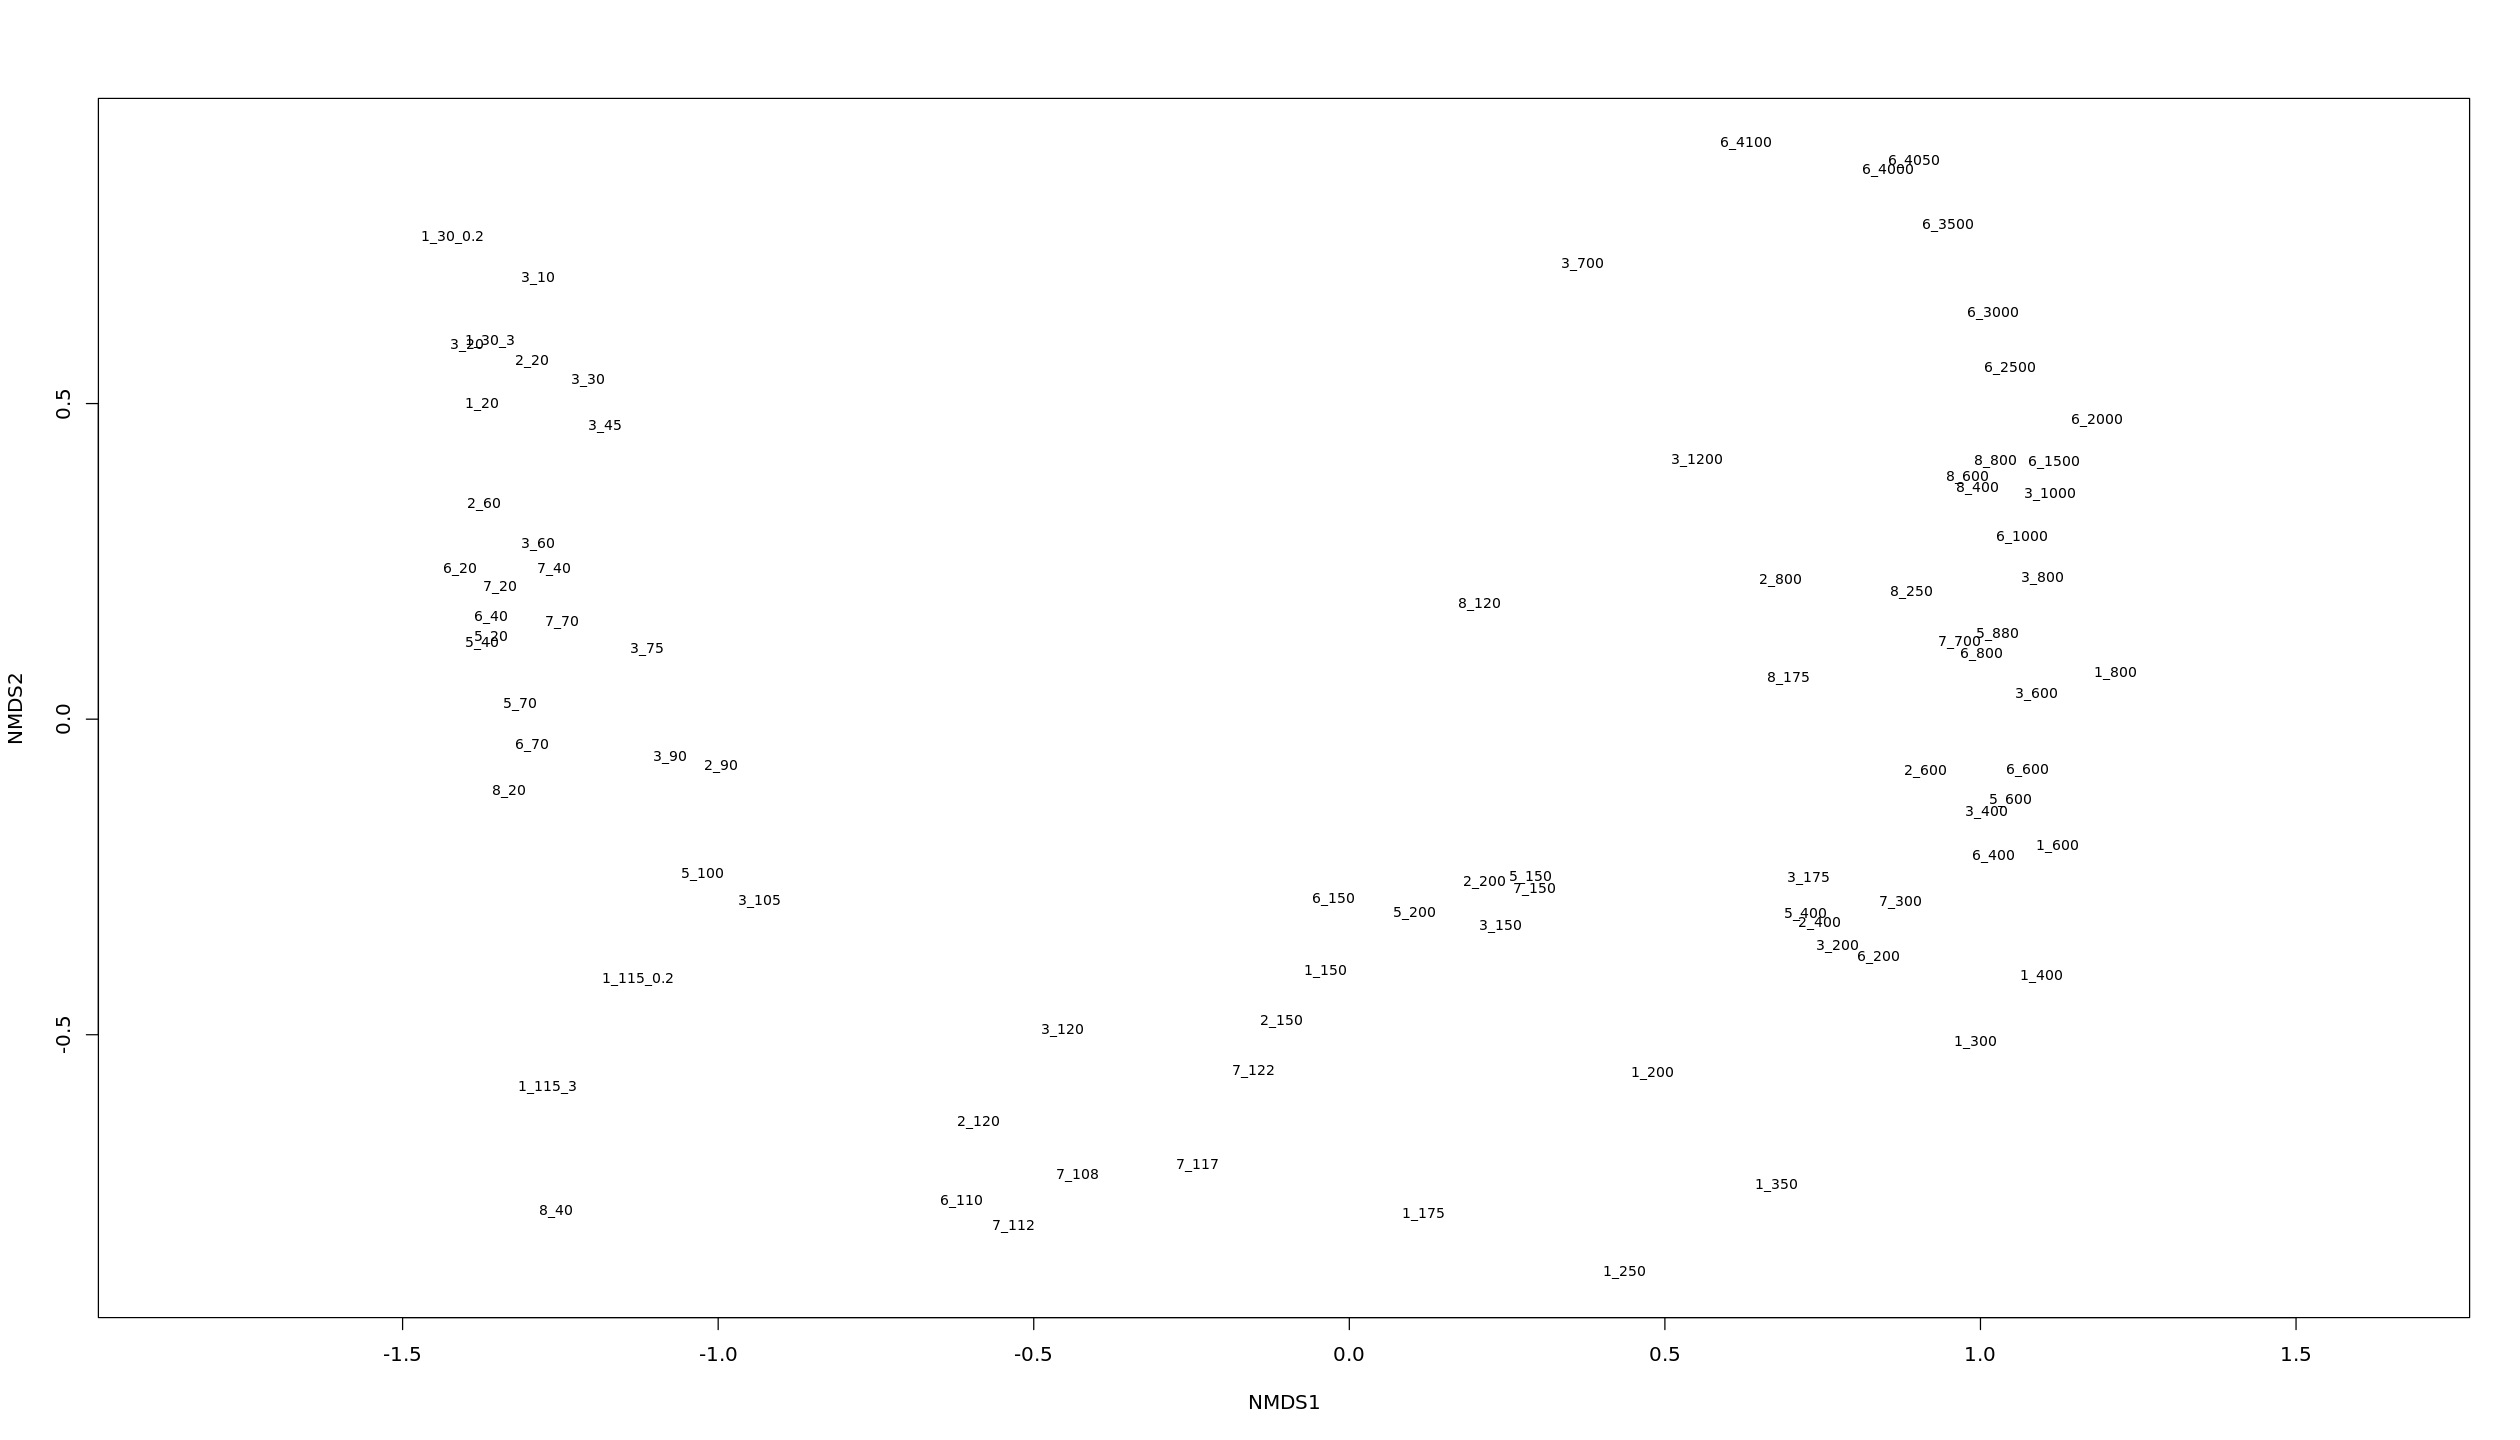

In [113]:
library(ggfortify)
library(vegan)
dist <-  vegdist(log, method = "bray")
nmds <- metaMDS(dist,distance = "bray", k = 2, maxit = 999, trymax = 500, wascores = TRUE)
plot(nmds, type = "t")

In [116]:
ir.pca <- prcomp(log)

In [115]:
install.packages('vegan')

Installing package into ‘/vortexfs1/home/ncohen/R/x86_64-conda-linux-gnu-library/4.1’
(as ‘lib’ is unspecified)



In [23]:
#autoplot(ir.pca, label=TRUE)

In [119]:
data.scores<-as.data.frame(scores(nmds, display="site"))
data.scores$id<-rownames(data.scores)
b$id<-rownames(b)
rownames(b)<-b$label
b$id<-b$label
data.scores<-merge(b, data.scores,by='id',stringsAsFactors=F)
data.scores$Depth <- as.character(data.scores$Depth)
rownames(data.scores)<-data.scores$id
data.scores<-data.scores[,-1]
data.scores<-as.data.frame(data.scores, stringsAsFactors=F)
data.scores$Depth[data.scores$label=="1_115_0.2"] <- c('115')
data.scores$Depth[data.scores$label=="1_115_3"] <- c('115')
data.scores$Depth[data.scores$label=="1_30_0.2"] <- c('30')
data.scores$Depth[data.scores$label=="1_30_3"] <- c('30')
data.scores$Depth <- as.numeric(data.scores$Depth)
data.scores$Station <- as.character(data.scores$Station)

In [128]:
#proteins
data.scores<-as.data.frame(scores(nmds, display="site"))
data.scores$id<-rownames(data.scores)
data.scores$Depth<-str_extract(data.scores$id, "(?<=\\_)\\d+")
data.scores$Depth <- as.numeric(as.character(data.scores$Depth))
data.scores$Station<-str_extract(data.scores$id, "(?=\\_?)\\d+")
label<-rownames(data.scores)
rownames(data.scores)<-data.scores$id
data.scores<-as.data.frame(data.scores, stringsAsFactors=F)
data.scores$Station <- as.character(data.scores$Station)

In [131]:
options(repr.plot.width = 7, repr.plot.height = 7)

g<-ggplot() + 
  geom_point(data=data.scores,aes(x=NMDS1,y=NMDS2,shape=Station,color=Depth), size=7) + # add the point markers
#  geom_polygon(data=hull.data,aes(x=NMDS1,y=NMDS2,fill=Depth,group=grp),alpha=0.30)
  geom_text(data=data.scores,aes(x=NMDS1,y=NMDS2,label=label),size=3,vjust=3,hjust=0.5) +  # add the site labels
  coord_fixed(ratio = 1.4)+ scale_color_gradient2(low = "#b2ffb2", midpoint = 2000, mid = "#f70d1a", high = "#550a8a")+ scale_shape_manual(values = c(15,16,17,18,7,9,4))+
  theme_bw() + 
  theme(axis.title.x = element_text(size=20), # remove x-axis labels
        axis.title.y = element_text(size=20), # remove y-axis labels
        axis.text=element_text(size=12),
        panel.grid.major = element_blank(),  #remove major-grid labels
        panel.grid.minor = element_blank())  #remove minor-grid labels

ggsave(file="nmds_proteins.eps", g, dpi = 600, width = 7, height = 7)


# EdgeR normalization within group of interest - MA plots

In [ ]:
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("edgeR")

In [7]:
egg<-read.delim('eggnog.emapper.annotations',sep="\t",header=F)
egg<-egg[-1,]
egg<-egg[-1,]
egg<-egg[-1,]
egg<-egg[-1,]
colnames(egg)<-c('transcript_name','seed_ortholog','evalue','score','eggNOG_OG', 'narr_OG_name', 'narrOG_cat','narr_OG_desc','best_OG_names','best_OG_cat','best_OG_desc','Preferred_name','GOs','EC','KEGG_ko','KAGG_pathway','KEGG_Module','KEGG_Reaction','KEGG_rclass','BRITE','KEGG_TC','CAZy','BiGG_Reaction','PFAMs')
egg<-egg[-1,]
#head(egg)
sub<-merge(egg, merge, by='transcript_name')
subset<-subset(sub, select = c('transcript_name','division','KEGG_ko','class','family'))
subset[,6:51]<-sub[,25:70]

In [8]:
library(caroline)
key<-read.tab('rest.kegg.jp.txt')
colnames(key)<-c('KEGG_ko','def')
test<-subset #subset=file with taxonomy (class),KEGG_ko, counts, see below heatmap section
test1<-test[!grepl('-',test$KEGG_ko),] #Get rid of rows with KEGG_kos  "-" 
subset<-test1
library(tidyr)
library(dplyr)
subset1<-subset %>% 
    mutate(KEGG_ko = strsplit(as.character(KEGG_ko), ",")) %>% 
    unnest(KEGG_ko) #Send counts to all KOs listed


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Perform the following EdgeR tests for each group individually

In [216]:
dino<-c(' Dinophyta')
DINO<-subset1[subset1$division %in% dino,] 
DINO1<-DINO[1:49]
DINO1<-DINO1[,-1]
#DINO1<-DINO1[,-2]
DINO1<-DINO1[,-1]
DINO1<-DINO1[,-2]
DINO1<-DINO1[,-2]

#Sum by supergroup
sum<- DINO1 %>% 
  group_by(KEGG_ko) %>% 
  summarise_all(funs(sum))

sum<-as.data.frame(sum)

rownames(sum)<-sum$KEGG_ko
sum<-sum[,-1]

In [140]:
DINO$avg<-rowMeans(DINO[,6:49])
DINO_manta<-subset(DINO, select = c('KEGG_ko','order','avg'))

In [171]:
hapto<-c(' Haptophyta')
HAPTO<-subset1[subset1$division %in% hapto,] 
HAPTO1<-HAPTO[1:49]
HAPTO1<-HAPTO1[,-1]
HAPTO1<-HAPTO1[,-1]
HAPTO1<-HAPTO1[,-2]
HAPTO1<-HAPTO1[,-2]

#Sum by supergroup
sum<- HAPTO1 %>% 
  group_by(KEGG_ko) %>% 
  summarise_all(funs(sum))

sum<-as.data.frame(sum)

rownames(sum)<-sum$KEGG_ko
sum<-sum[,-1]

In [188]:
HAPTO$avg<-rowMeans(HAPTO[,6:49])
HAPTO_manta<-subset(HAPTO, select = c('KEGG_ko','family','avg'))

In [219]:
ochro<-c(' Stramenopiles_X')
OCHRO<-subset1[subset1$division %in% ochro,] 
OCHRO1<-OCHRO[1:49]
OCHRO1<-OCHRO1[,-1]
OCHRO1<-OCHRO1[,-1]
OCHRO1<-OCHRO1[,-2]
OCHRO1<-OCHRO1[,-2]

#Sum by supergroup
sum<- OCHRO1 %>% 
  group_by(KEGG_ko) %>% 
  summarise_all(funs(sum))

sum<-as.data.frame(sum)

rownames(sum)<-sum$KEGG_ko
sum<-sum[,-1]

In [131]:
OCHRO$avg<-rowMeans(OCHRO[,6:49])
OCHRO_manta<-subset(OCHRO, select = c('KEGG_ko','class','avg'))

# Surface VS Deep MA plots

In [141]:
names <- c('S','S','D','D','D','S','S','D','D','D','S','S','D','D','S','D','S','D','D','S','S','S','D','D','D','D','D','S','D','D','S','S','D','D','D','D','D','S','D','D','D','S','S','D')

In [142]:
library('edgeR')

In [220]:
group <- factor(names)
y <- DGEList(counts=sum,group=group)
keep <- rowSums(y$counts) > 1
y <- y[keep,,keep.lib.sizes=FALSE]
y <- calcNormFactors(y)
design <- model.matrix(~group)
y <- estimateDisp(y,design)
fit <- glmFit(y,design)
lrt <- glmLRT(fit,coef=2)
ochro.table<-topTags(lrt)
cts<-cpm(y)

In [144]:
library(stringr)

In [221]:
table<-lrt$table
table$FDR <- p.adjust(table$PValue, method="BH")
table$KEGG_ko<-rownames(table)

MA<-merge(key, table, by='KEGG_ko')
MA$ID<-paste(MA$family, MA$def, by='sep')

ochro.table<-table #create a table for each taxa

In [222]:
colnames(dino.table)<-c('dino.logFC','logCPM','LR','PValue','FDR','KEGG_ko')
colnames(hapto.table)<-c('hapto.logFC','logCPM','LR','PValue','FDR','KEGG_ko')
colnames(ochro.table)<-c('ochro.logFC','logCPM','LR','PValue','FDR','KEGG_ko')

#Filter by DE genes
dino.table<-dino.table[dino.table$FDR <= 0.05, ] 
hapto.table<-hapto.table[hapto.table$FDR <= 0.05, ]
ochro.table<-ochro.table[ochro.table$FDR <= 0.05, ]

In [223]:
#join the tables together
merge<-merge(dino.table, hapto.table, by='KEGG_ko',all=T)
merge1<-merge(merge, ochro.table, by='KEGG_ko',all=T)
sub<-subset(merge1, select = c('dino.logFC','hapto.logFC','ochro.logFC'))
rownames(sub)<-merge1$KEGG_ko

In [224]:
sub[is.na(sub)] <- 0

In [225]:
write.csv(sub,'logFC_surfacedeep_hapto_ochro_dino.csv')

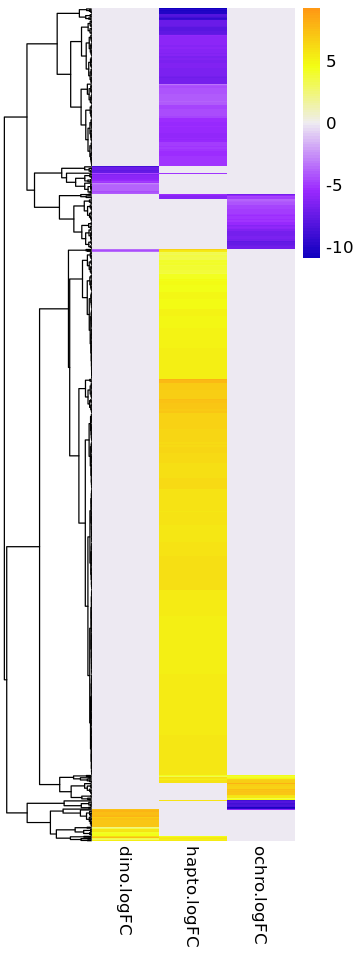

In [226]:
library(pheatmap)
options(repr.plot.width =3, repr.plot.height = 8)
myColor <- colorRampPalette(c("#1000bf","#9c2bff","#efedf2", "#f3ff14","#ff9914"))(100)
myBreaks <- c(seq(min(sub), 0, length.out=ceiling(100/2) + 1), 
              seq(max(sub)/100, max(sub), length.out=floor(100/2)))
pheatmap(sub, color = myColor, annotation_colors = mycolors, show_rownames = F, breaks = myBreaks, cluster_cols=F, border_color = NA)

In [227]:
library(caroline)
def<-read.tab('rest.kegg.jp.txt',header=F,sep='\t')
colnames(def)<-c('KEGG_ko','def')
sub$KEGG_ko<-rownames(sub)
table<-merge(def, sub, by='KEGG_ko')
#write.csv(table, 'logFC_surfacedeep_hapto_ochro_dino_def.csv')

Warning message:
“Using size for a discrete variable is not advised.”


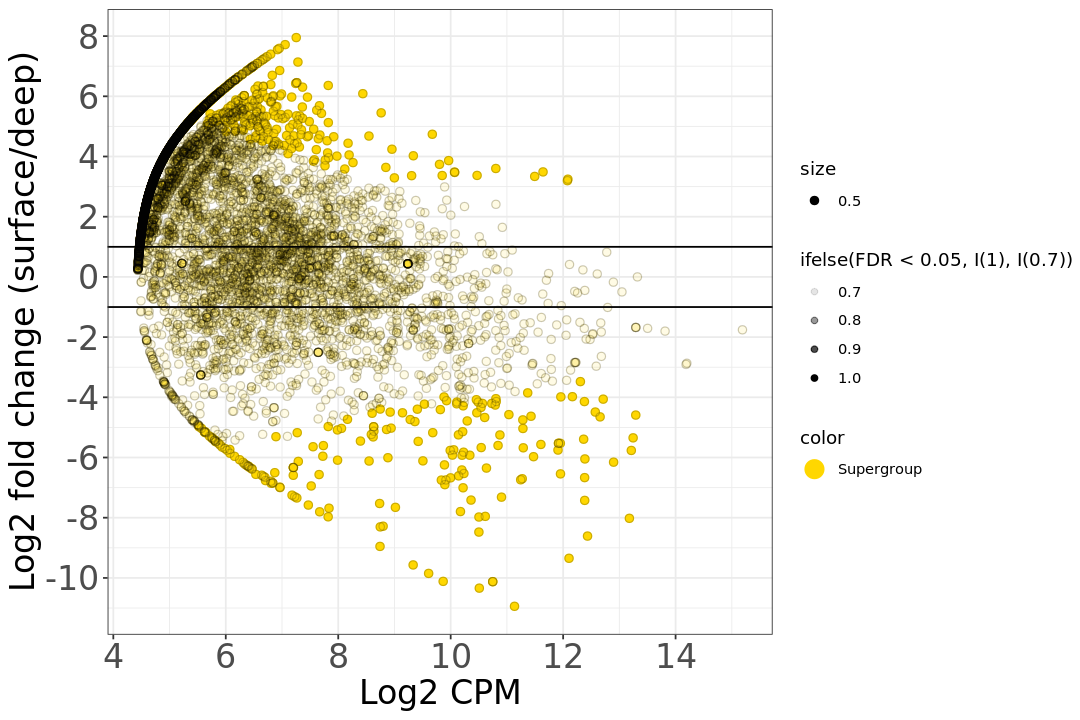

In [176]:
plot<-MA
plot$size <- ('0.5')
plot$color <- c('Supergroup')

options(repr.plot.width = 9, repr.plot.height = 6)

library(ggplot2)

# #0052cc = dino
# #FFD700 = hapto
# #ff9999 = ochro
# #942649= radio
# #ffe6ff = fungi

myplot = qplot(logCPM, logFC, data = plot, size = size, color = color, alpha = ifelse(FDR < 0.05,I(1),I(0.7)),
               xlab = bquote('Log2 CPM'), ylab = bquote('Log2 fold change (surface/deep)'))
g <- myplot + theme_bw() + scale_colour_manual(values = c('#FFD700')) + theme(axis.text=element_text(size=20), axis.title=element_text(size=20)) + scale_x_continuous(breaks = c(-10,-8,-6,-4,-2,0,2,4,6,8,10,12,14,16)) + scale_y_continuous(breaks = c(-14,-12,-10,-8,-6,-4,-2,0,2,4,6,8,10,12,14,16)) + theme(legend.position="right") + guides(colour = guide_legend(override.aes = list(size=5))) + geom_point(pch=21, colour="Black", size=2, alpha=I(0.2)) +  geom_hline(yintercept=c(1,-1), linetype="solid") #+  coord_cartesian(ylim=c(-14,10))
print(g)

In [ ]:
#install.packages('plotly')

In [ ]:
library(plotly)
p <- plot_ly(plot, x = plot$logCPM, y = plot$logFC, type='scatter', text = plot$ID)
embed_notebook(p)

In [148]:
write.csv(MA, 'edgeR.hapto.surfacedeep.csv')

# MANTA plot add-on

In [ ]:
# MA = edgeR output and KO
# HAPTO_manta = taxa, KO, average pseudocounts across samples
# MANTA guide from Rob Lampe = https://alexanderlabwhoi.github.io/2022-metaT-m3-perspective/ma_plots.html

In [149]:
library(readr)
library(methods)
library(scatterpie)
library(RColorBrewer)
#library(ggrastr)

In [191]:
family<-str_sort((unique(HAPTO_manta$family))) 
family<-family[-13]
family
HAPTO_manta[!HAPTO_manta$family %in% family,]$family <- 'NA'

[1] " Calcidiscaceae"          " Chrysochromulinaceae"   
 [3] " Chrysoculteraceae"       " Coccolithaceae"         
 [5] " Isochrysidaceae"         " Noelaerhabdaceae"       
 [7] " Pavlovaceae"             " Phaeocystaceae"         
 [9] " Pleurochrysidaceae"      " Pontosphaeraceae"       
[11] " Prymnesiaceae"           " unclassified Pavlovales"

In [192]:
#Select DE genes
sig_genes <- MA[MA[grep("FDR", names(MA))] < 0.05,]$KEGG_ko
head(sig_genes)

[1] "ko:K00021" "ko:K00024" "ko:K00033" "ko:K00046" "ko:K00078" "ko:K00088"

In [193]:
df <- as.data.frame(matrix(0, nrow=nrow(MA), ncol=(length(family)+1)))
rownames(df) <- MA$KEGG_ko
names(df) <- c(family, "NA")

In [194]:
for (gene in sig_genes) {
  for (x in names(df)) {
    temp <- HAPTO_manta[grep(gene, HAPTO_manta$KEGG_ko),]
    temp <- temp[grep(x, temp$family),]
    df[gene, x] <- sum(temp$avg)
  }
}

df$KEGG_ko <- rownames(df)
MA <- merge(MA, df, by="KEGG_ko")

# Randomize order of genes
set.seed(38)
rows <- sample(nrow(MA))
MA <- MA[rows,]
sig <- MA[MA$FDR < 0.05,]

Coordinate system already present. Adding new coordinate system, which will
replace the existing one.
Coordinate system already present. Adding new coordinate system, which will
replace the existing one.
Coordinate system already present. Adding new coordinate system, which will
replace the existing one.
Coordinate system already present. Adding new coordinate system, which will
replace the existing one.
Coordinate system already present. Adding new coordinate system, which will
replace the existing one.
Coordinate system already present. Adding new coordinate system, which will
replace the existing one.
Coordinate system already present. Adding new coordinate system, which will
replace the existing one.
Coordinate system already present. Adding new coordinate system, which will
replace the existing one.
Coordinate system already present. Adding new coordinate system, which will
replace the existing one.
Coordinate system already present. Adding new coordinate system, which will
replac

Coordinate system already present. Adding new coordinate system, which will
replace the existing one.
Coordinate system already present. Adding new coordinate system, which will
replace the existing one.
Coordinate system already present. Adding new coordinate system, which will
replace the existing one.
Coordinate system already present. Adding new coordinate system, which will
replace the existing one.
Coordinate system already present. Adding new coordinate system, which will
replace the existing one.
Coordinate system already present. Adding new coordinate system, which will
replace the existing one.
Coordinate system already present. Adding new coordinate system, which will
replace the existing one.
Coordinate system already present. Adding new coordinate system, which will
replace the existing one.
Coordinate system already present. Adding new coordinate system, which will
replace the existing one.
Coordinate system already present. Adding new coordinate system, which will
replac

Coordinate system already present. Adding new coordinate system, which will
replace the existing one.
Coordinate system already present. Adding new coordinate system, which will
replace the existing one.
Coordinate system already present. Adding new coordinate system, which will
replace the existing one.
Coordinate system already present. Adding new coordinate system, which will
replace the existing one.
Coordinate system already present. Adding new coordinate system, which will
replace the existing one.
Coordinate system already present. Adding new coordinate system, which will
replace the existing one.
Warning message:
“Removed 13 rows containing non-finite values (`stat_pie()`).”


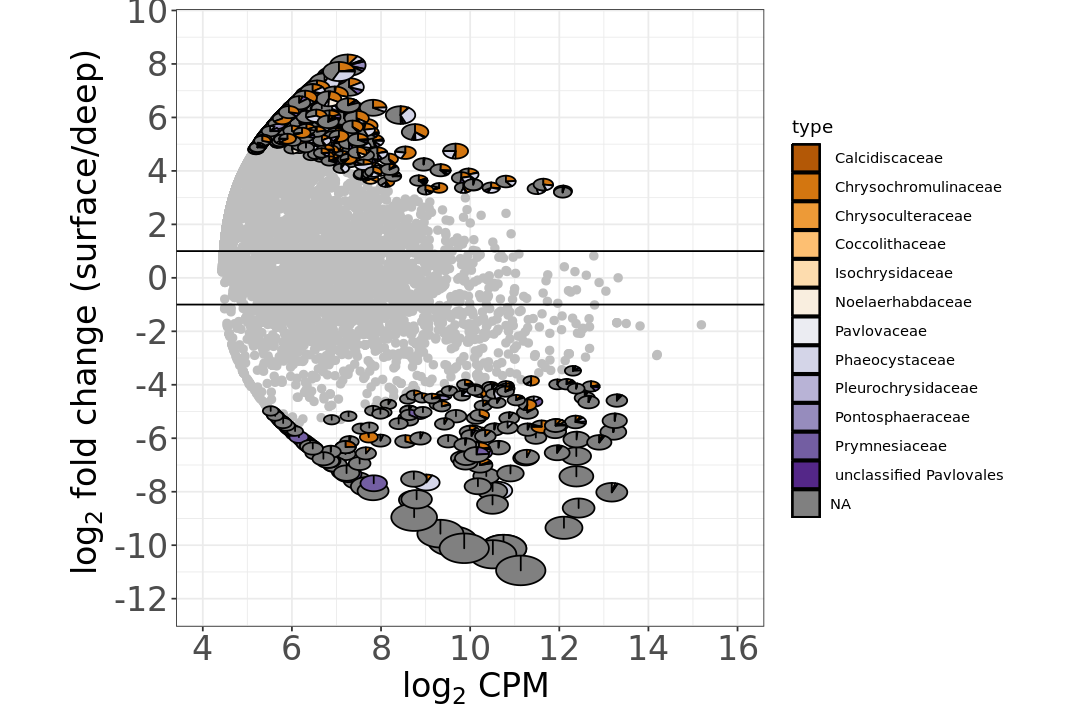

In [214]:
colors <- c(colorRampPalette(brewer.pal(9, "PuOr"))(12)) #hapto
#colors <- colorRampPalette(brewer.pal(9, "PiYG"))(15) #ochro
#colors <- colorRampPalette(brewer.pal(9, "RdBu"))(10)
colors<- append(colors, '#808080')

# Style plot

xlabel <- xlab(bquote(~log[2]~"CPM"))
ylabel <- ylab(bquote(~log[2]~"fold change (surface/deep)"))
hline <- geom_hline(yintercept=c(1,-1), linetype = "solid")
ylimits <- scale_y_continuous(breaks = seq(-14, 16, by = 2), limits = c(-12,9))
xlimits <- scale_x_continuous(breaks = seq(-10, 16, by=2), limits = c(4,16))

#options(repr.plot.width = 9, repr.plot.height = 6)

# Base plot with grey circles for non-significant DE genes 
plot <- ggplot() + geom_point(data = MA[MA$FDR > 0.05,],
             aes(x = logCPM, y = logFC), size = 2, color = 'grey') + theme_bw() + scale_fill_manual(values = colors, na.value='grey') + hline + ylimits + xlimits + xlabel + ylabel + theme(axis.text=element_text(size=20), axis.title=element_text(size=20)) + theme(legend.position="right") + guides(colour = guide_legend(override.aes = list(size=5))) +  geom_point(pch=21, colour="Black", size=2, alpha=I(0.2))
             
# Iterate over significant genes to generate pies
for (i in seq(1, nrow(sig), by=5)) {
plot <- plot + geom_scatterpie(data = sig[i:(i+4),],
                                   aes(x = logCPM, y = logFC,r = -log10(FDR)/7.5), pie_scale = 10,
                                   cols = c(family,"NA")) + coord_fixed(ratio=9/15)
}

plot

# Coastal vs offshore surface

In [ ]:
#Remove columns deeper than 200m.

In [ ]:
dt<-subset(sum, select = c('1_30_0.2','1_30_3','1_115_0.2','1_115_3','2_20','2_120','3_20','3_120','6_20','7_20','6_110','7_108','8_40','8_120','8_175'))

In [ ]:
names <- c('offshore','offshore','offshore','offshore','offshore','offshore','offshore','offshore','coastal','coastal','coastal','coastal','coastal','coastal','coastal')

In [ ]:
library(edgeR)

In [ ]:
group <- factor(names)
y <- DGEList(counts=dt,group=group)
#keep <- filterByExpr(y)
keep <- rowSums(y$counts) > 1
y <- y[keep,,keep.lib.sizes=FALSE]
y <- calcNormFactors(y)
design <- model.matrix(~group)
y <- estimateDisp(y,design)
fit <- glmFit(y,design)
lrt <- glmLRT(fit,coef=2)
dino.table<-topTags(lrt)
cts<-cpm(y)

In [ ]:
table<-lrt$table
table$FDR <- p.adjust(table$PValue, method="BH")
table$KEGG_ko<-rownames(table)

MA<-merge(key, table, by='KEGG_ko')
MA$ID<-paste(MA$family, MA$def, by='sep')


In [ ]:

library(ggplot2)

plot<-MA
plot$size <- ('0.5')
plot$color <- c('Supergroup')

options(repr.plot.width = 8, repr.plot.height = 6)

# #0052cc = dino
# #FFD700 = hapto
# #ff9999 = ochro
# #942649= radio
# #ffe6ff = fungi

myplot = qplot(logCPM, logFC, data = plot, size = size, color = color, alpha = I(0.7),
               xlab = bquote('Log2 CPM'), ylab = bquote('Log2 fold change (offshore/coastal)'))
g <- myplot + theme_bw() + scale_colour_manual(values = c('#0052cc')) + theme(axis.text=element_text(size=20), axis.title=element_text(size=20)) + scale_x_continuous(breaks = c(-10,-8,-6,-4,-2,0,2,4,6,8,10,12,14,16)) + scale_y_continuous(breaks = c(-14,-12,-10,-8,-6,-4,-2,0,2,4,6,8,10,12,14,16)) + theme(legend.position="right") + guides(colour = guide_legend(override.aes = list(size=5))) + geom_point(pch=21, colour="Black", size=2, alpha=I(0.2)) +  geom_hline(yintercept=c(1,-1), linetype="solid") #+  coord_cartesian(ylim=c(-14,10))
print(g)

In [ ]:
#write.csv(MA, 'edgeR.strameno.coastaloffshore.csv')

In [ ]:
plot<-MA
library(plotly)
p <- plot_ly(plot, x = plot$logCPM, y = plot$logFC, type='scatter', text = plot$ID)
embed_notebook(p)

# PLS regression transcripts

In [11]:
#To be run with TPM-normalized counts

egg<-read.delim('eggnog.emapper.annotations',sep="\t",header=F)
egg<-egg[-1,]
egg<-egg[-1,]
egg<-egg[-1,]
egg<-egg[-1,]
colnames(egg)<-c('transcript_name','seed_ortholog','evalue','score','eggNOG_OG', 'narr_OG_name', 'narrOG_cat','narr_OG_desc','best_OG_names','best_OG_cat','best_OG_desc','Preferred_name','GOs','EC','KEGG_ko','KAGG_pathway','KEGG_Module','KEGG_Reaction','KEGG_rclass','BRITE','KEGG_TC','CAZy','BiGG_Reaction','PFAMs')
egg<-egg[-1,]
#head(egg)
sub<-merge(egg, merge, by='transcript_name')
subset<-subset(sub, select = c('transcript_name','class','KEGG_ko','domain','division'))
subset[,6:51]<-sub[,25:70]

library(caroline)
key<-read.tab('rest.kegg.jp.txt')
colnames(key)<-c('KEGG_ko','def')
test<-subset #subset=file with taxonomy (class),KEGG_ko, counts, see below heatmap section
test1<-test[!grepl('-',test$KEGG_ko),] #Get rid of rows with KEGG_kos  "-" 
subset<-test1
library(tidyr)
library(dplyr)
subset1<-subset %>% 
    mutate(KEGG_ko = strsplit(as.character(KEGG_ko), ",")) %>% 
    unnest(KEGG_ko) #Send counts to all KOs listed!!


ERROR: Error in as.data.frame.default(y): cannot coerce class ‘"function"’ to a data.frame


In [90]:
#SPLIT counts with same KO!!

split_and_divide <- function(df) {
  df %>%
    mutate(KEGG_ko=str_split(KEGG_ko, ",")) %>%
    rowwise() %>% 
    mutate_at((6:49), funs(. / length(unlist(KEGG_ko)))) %>%
    unnest(KEGG_ko)  
}

subset1 <- split_and_divide(subset)

Warning message:
“`funs()` was deprecated in dplyr 0.8.0.
ℹ Please use a list of either functions or lambdas:

# Simple named list: list(mean = mean, median = median)

# Auto named with `tibble::lst()`: tibble::lst(mean, median)

# Using lambdas list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))”


In [179]:
#write.csv(subset1, 'TPM_KEGG_split.csv')
subset1<-read.csv('TPM_KEGG_split.csv')

In [185]:
#Subset euks
x<-subset1
euk<-c('Eukaryota')
x<-x[x$domain %in% euk,]


x<-x[,-1]
x<-x[,-1]
x<-x[,-1]
x<-x[,-2]
x<-x[,-2]
x<-x[,-47]
x<-x[,-46]
head(x)


,KEGG_ko,X1_30_0.2,X1_115_3,X1_200,X1_400,X1_800,X2_20,X2_120,X2_200,X2_400,⋯,X3_600,X3_700,X3_1000,X5_20,X5_200,X5_400,X5_880,X6_20,X6_110,X6_200
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3,ko:K00485,0.3750230,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,ko:K10408,0.0838420,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
8,ko:K05692,0.2332330,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
9,ko:K03283,0.0000000,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
10,ko:K09490,0.0000000,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
12,ko:K04300,0.1417923,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [186]:
# Sum by euk division and separate by KO
library(dplyr)
d <- x %>%
    group_by(KEGG_ko) %>% summarise_all(funs(sum))

Warning message:
“`funs()` was deprecated in dplyr 0.8.0.
ℹ Please use a list of either functions or lambdas:

# Simple named list: list(mean = mean, median = median)

# Auto named with `tibble::lst()`: tibble::lst(mean, median)

# Using lambdas list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))”


In [187]:
gois<-read.csv('Sun2021ISME.csv')
gois$KO_def<-paste(gois$KO, gois$def,sep='_')
colnames(gois)<-c('KEGG_ko','def','id','KO_def')

In [132]:
#Separate out by groups of genes
#select<-c('iron','copper','nickel','zinc','divalent metal','siderophore','manganese')
#select<-c('nitrogen', 'phosphorus','carbon','transcription factor')
#goi<-new[new$id %in% select,]

In [188]:
d<-as.data.frame(d)
rownames(d)<-d$KEGG_ko

e<-merge(d, gois, by='KEGG_ko')
rownames(e)<-e$KO_def
e<-e[,-48]
e<-e[,-47]
e<-e[,-46]
e<-e[,-1]

In [189]:
head(e)

,X1_30_0.2,X1_115_3,X1_200,X1_400,X1_800,X2_20,X2_120,X2_200,X2_400,X2_800,⋯,X3_600,X3_700,X3_1000,X5_20,X5_200,X5_400,X5_880,X6_20,X6_110,X6_200
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
"ko:K00124_fdoH, fdsB; formate dehydrogenase iron-sulfur subunit",0.097972,0.00000,0.000000,0.000000,0.000000,0.000000,0.0000000,0.000000,0.000000,0.00000,⋯,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
"ko:K00184_K00184; prokaryotic molybdopterin-containing oxidoreductase family, iron-sulfur binding subunit",0.000000,0.00000,16.641300,9.884056,0.000000,0.000000,3.9487750,2.654105,0.487489,0.00000,⋯,0.000000,0.000000,0.000000,1.736431,2.376842,9.285606,0.850393,0.000000,0.00000,1.083429
"ko:K00205_fwdF, fmdF; 4Fe-4S ferredoxin",0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0000000,0.000000,0.000000,0.00000,⋯,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
"ko:K00216_entA; 2,3-dihydro-2,3-dihydroxybenzoate dehydrogenase [EC:1.3.1.28]",0.000000,0.00000,0.000000,0.896500,0.796376,0.000000,0.0222555,0.000000,0.000000,0.00000,⋯,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
"ko:K00235_SDHB, SDH2; succinate dehydrogenase (ubiquinone) iron-sulfur subunit [EC:1.3.5.1]",31.238807,25.95839,0.836569,2.287436,9.552476,55.229144,8.1595880,18.228368,0.580815,87.12072,⋯,1.244352,8.454187,8.443942,20.336907,8.997508,10.344579,4.659019,48.377340,10.95797,8.632918
"ko:K00240_sdhB, frdB; succinate dehydrogenase / fumarate reductase, iron-sulfur subunit [EC:1.3.5.1 1.3.5.4]",1.426817,0.00000,0.036649,0.000000,0.000000,1.301691,0.0000000,0.000000,0.000000,0.00000,⋯,0.000000,0.000000,0.000000,1.654865,0.000000,0.000000,0.000000,0.668273,0.00000,0.000000


In [190]:
e<-e[apply(e[,-1], 1, function(x) !all(x==0)),] #get rid of rows with all 0

In [191]:
nrow(e)

[1] 148

In [192]:
e<-e[apply(e[,-1], 1, function(x) !all(x<5)),] #get rid of rows with aggregated KO sum (across divisions) less than 5 TPM

In [193]:
nrow(e)

[1] 77

In [194]:
write.csv(e, 'transcripts.goi.pls_split.csv')

In [103]:
t.e<-as.data.frame(t(e))
cor<-read.csv('correlations.csv')
rownames(cor)<-cor$ID
cor<-cor[,-1]
cor<-cor[,-2]
#cor<-clr(cor)
#cor<-as.data.frame(cor)
head(cor)

,depth,Fe,Zn,Cd,Ni,Cu,Mn,PO4,NO2.NO3,Si,NO2,NH4,temperature,oxygen
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1_30_0.2,30,0.53,0.73,0.0035,1.96,0.89,1.93,0.18,0.2,0.3,0.02,0.09,22.7522,218.696
1_30_3,30,0.53,0.73,0.0035,1.96,0.89,1.93,0.18,0.2,0.3,0.02,0.09,22.7522,218.696
1_115_0.2,115,0.19,1.03,0.0072,2.00,0.91,0.94,0.23,1.4,0.4,0.10,0.00,19.8370,216.766
1_115_3,115,0.19,1.03,0.0072,2.00,0.91,0.94,0.23,1.4,0.4,0.10,0.00,19.8370,216.766
1_200,200,0.23,1.46,0.0103,2.04,1.00,0.68,0.20,1.4,0.3,0.02,0.14,19.2741,209.082
1_400,400,0.25,1.56,0.0240,2.17,0.82,0.32,0.40,4.2,1.2,0.02,0.04,18.3555,196.454


In [104]:
library('mixOmics')

Loading required package: MASS


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select


Loading required package: lattice

Loading required package: ggplot2


Loaded mixOmics 6.13.114
Thank you for using mixOmics!
Tutorials: http://mixomics.org
Bookdown vignette: https://mixomicsteam.github.io/Bookdown
Questions, issues: Follow the prompts at http://mixomics.org/contact-us
Cite us:  citation('mixOmics')




In [105]:
t.e$ID<-rownames(t.e)
cor$ID<-rownames(cor)
merge<-merge(t.e, cor, by='ID')


In [111]:
head(t.e)

,"ko:K00261_GLUD1_2, gdhA; glutamate dehydrogenase (NAD(P)+) [EC:1.4.1.3]","ko:K00262_E1.4.1.4, gdhA; glutamate dehydrogenase (NADP+) [EC:1.4.1.4]",ko:K00264_GLT1; glutamate synthase (NADH) [EC:1.4.1.14],ko:K00266_gltD; glutamate synthase (NADPH) small chain [EC:1.4.1.13],"ko:K00284_GLU, gltS; glutamate synthase (ferredoxin) [EC:1.4.7.1]",ko:K00366_nirA; ferredoxin-nitrite reductase [EC:1.7.7.1],"ko:K00459_ncd2, npd; nitronate monooxygenase [EC:1.13.12.16]",ko:K00926_arcC; carbamate kinase [EC:2.7.2.2],ko:K01113_alkaline phosphatase D,ko:K01455_E3.5.1.49; formamidase [EC:3.5.1.49],⋯,ko:K01948_CPS1; carbamoyl-phosphate synthase (ammonia) [EC:6.3.4.16],ko:K02040_pstS; phosphate transport system substrate-binding protein,"ko:K02575_NRT, narK, nrtP, nasA; MFS transporter, NNP family, nitrate/nitrite transporter",ko:K03306_ inorganic phosphate transporter,ko:K04561_norB; nitric oxide reductase subunit B [EC:1.7.2.5],ko:K08176_ inorganic phosphate transporter,ko:K10534_NR; nitrate reductase (NAD(P)H) [EC:1.7.1.1 1.7.1.2 1.7.1.3],ko:K15371_GDH2; glutamate dehydrogenase [EC:1.4.1.2],ko:K18246_CA4; carbonic anhydrase 4 [EC:4.2.1.1],ID
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1_30_0.2,3.276785,1.8060117,11.72601733,7.52905533,4.4434893,1.13091875,9.733034,0.930317,2.567289,1.157560,⋯,6.940523,0.02778654,5.219635,4.9545437,0.000000,24.032947,4.072385,18.909281,1.06593967,1_30_0.2
1_115_3,8.370354,5.6522697,6.17974242,1.65883442,2.8218913,6.71028650,2.638946,0.000000,4.595881,5.336497,⋯,4.821311,0.44800654,52.996641,9.8309187,0.000000,13.372304,5.342824,14.214184,0.01138067,1_115_3
1_200,3.082723,0.0745025,0.01439233,0.07906233,0.0075550,0.00000000,7.338549,0.000000,0.897782,6.291835,⋯,0.000000,0.49944700,2.751006,0.2123267,0.000000,0.130776,1.919528,6.739683,0.00000000,1_200
1_400,9.863875,7.3878575,3.82427833,0.15052933,0.0163465,4.56394000,1.770521,0.000000,18.379229,1.451330,⋯,2.361517,0.00000000,3.071734,6.8498753,0.000000,4.472844,5.995470,0.725257,1.03879833,1_400
1_800,12.980732,11.1995582,6.83627592,11.33021492,1.4640639,0.09624625,3.110753,0.000000,20.644019,1.602879,⋯,7.090104,0.46019600,1.429908,23.1999760,7.683605,15.968287,6.596820,15.424981,0.00000000,1_800
2_20,6.592558,8.2489632,12.80224175,10.73638925,12.7698159,6.80764200,10.238414,0.000000,11.947079,6.569986,⋯,3.521638,28.73646328,37.599390,1.8976802,1.399218,50.750577,9.046160,25.328592,1.46689833,2_20


In [106]:
rownames(merge)<-merge$ID

In [110]:
head(merge)

,ID,"ko:K00261_GLUD1_2, gdhA; glutamate dehydrogenase (NAD(P)+) [EC:1.4.1.3]","ko:K00262_E1.4.1.4, gdhA; glutamate dehydrogenase (NADP+) [EC:1.4.1.4]",ko:K00264_GLT1; glutamate synthase (NADH) [EC:1.4.1.14],ko:K00266_gltD; glutamate synthase (NADPH) small chain [EC:1.4.1.13],"ko:K00284_GLU, gltS; glutamate synthase (ferredoxin) [EC:1.4.7.1]",ko:K00366_nirA; ferredoxin-nitrite reductase [EC:1.7.7.1],"ko:K00459_ncd2, npd; nitronate monooxygenase [EC:1.13.12.16]",ko:K00926_arcC; carbamate kinase [EC:2.7.2.2],ko:K01113_alkaline phosphatase D,⋯,Ni,Cu,Mn,PO4,NO2.NO3,Si,NO2,NH4,temperature,oxygen
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1_115_0.2,1_115_0.2,16.740308,0.7195800,7.06676083,1.89627333,8.2589318,6.9572875,0.000000,0.000000,3.478140,⋯,2.00,0.91,0.94,0.23,1.4,0.4,0.10,0.00,19.8370,216.766
1_115_3,1_115_3,8.370354,5.6522697,6.17974242,1.65883442,2.8218913,6.7102865,2.638946,0.000000,4.595881,⋯,2.00,0.91,0.94,0.23,1.4,0.4,0.10,0.00,19.8370,216.766
1_200,1_200,3.082723,0.0745025,0.01439233,0.07906233,0.0075550,0.0000000,7.338549,0.000000,0.897782,⋯,2.04,1.00,0.68,0.20,1.4,0.3,0.02,0.14,19.2741,209.082
1_30_0.2,1_30_0.2,3.276785,1.8060117,11.72601733,7.52905533,4.4434893,1.1309187,9.733034,0.930317,2.567289,⋯,1.96,0.89,1.93,0.18,0.2,0.3,0.02,0.09,22.7522,218.696
1_30_3,1_30_3,4.991015,4.0758848,13.67186950,3.00750500,6.8280355,0.1722405,3.782428,0.000000,8.764482,⋯,1.96,0.89,1.93,0.18,0.2,0.3,0.02,0.09,22.7522,218.696
1_400,1_400,9.863875,7.3878575,3.82427833,0.15052933,0.0163465,4.5639400,1.770521,0.000000,18.379229,⋯,2.17,0.82,0.32,0.40,4.2,1.2,0.02,0.04,18.3555,196.454


In [108]:
#all
t.e<-merge[1:86]
t.e<-t.e[,-1]
cor<-merge[87:100]
t.e<-t.e[, colSums(t.e != 0) > 0] #remove columns that sum to 0
t.e<-t.e[apply(t.e[,-1], 1, function(x) !all(x==0)),] #remove rows that sum to 0
               
#metals
#t.e<-merge[1:58]
#t.e<-t.e[,-1]
#cor<-merge[59:72]
#t.e<-t.e[, colSums(t.e != 0) > 0] #remove columns that sum to 0
#t.e<-t.e[apply(t.e[,-1], 1, function(x) !all(x==0)),] #remove rows that sum to 0
               
#macronutrients
#t.e<-merge[1:29]
#t.e<-t.e[,-1]
#cor<-merge[30:43]
#t.e<-t.e[, colSums(t.e != 0) > 0] #remove columns that sum to 0
#t.e<-t.e[apply(t.e[,-1], 1, function(x) !all(x==0)),] #remove rows that sum to 0

ERROR: Error in `[.data.frame`(merge, 1:86): undefined columns selected


In [ ]:
X = t.e #Get rid of columns with values close to 0 so perf can run on proteins
Y = cor

In [ ]:
options(repr.matrix.max.cols=150, repr.matrix.max.rows=200)
head(X)

In [143]:
#all
options(repr.matrix.max.cols=150, repr.matrix.max.rows=200)
#X<-X[,-28] #remove KO2014
#X<-X[,-31] #remove PSTS
#head(X)

#metals
#X<-X[,-10] #remove KO2014

#macronutrients
X<-X[,-19] #remove PSTS

In [144]:
result <- pls(X, Y, ncomp =2, mode = "regression")

In [145]:
result


Call:
 pls(X = X, Y = Y, ncomp = 2, mode = "regression") 

 PLS with a 'regression' mode with 2 PLS components. 
 You entered data X of dimensions: 38 27 
 You entered data Y of dimensions: 38 14 

 No variable selection. 

 Main numerical outputs: 
 -------------------- 
 loading vectors: see object$loadings 
 variates: see object$variates 
 variable names: see object$names 

 Functions to visualise samples: 
 -------------------- 
 plotIndiv, plotArrow 

 Functions to visualise variables: 
 -------------------- 
 plotVar, plotLoadings, network, cim 

In [146]:
result.val <- perf(result, validation = "loo")

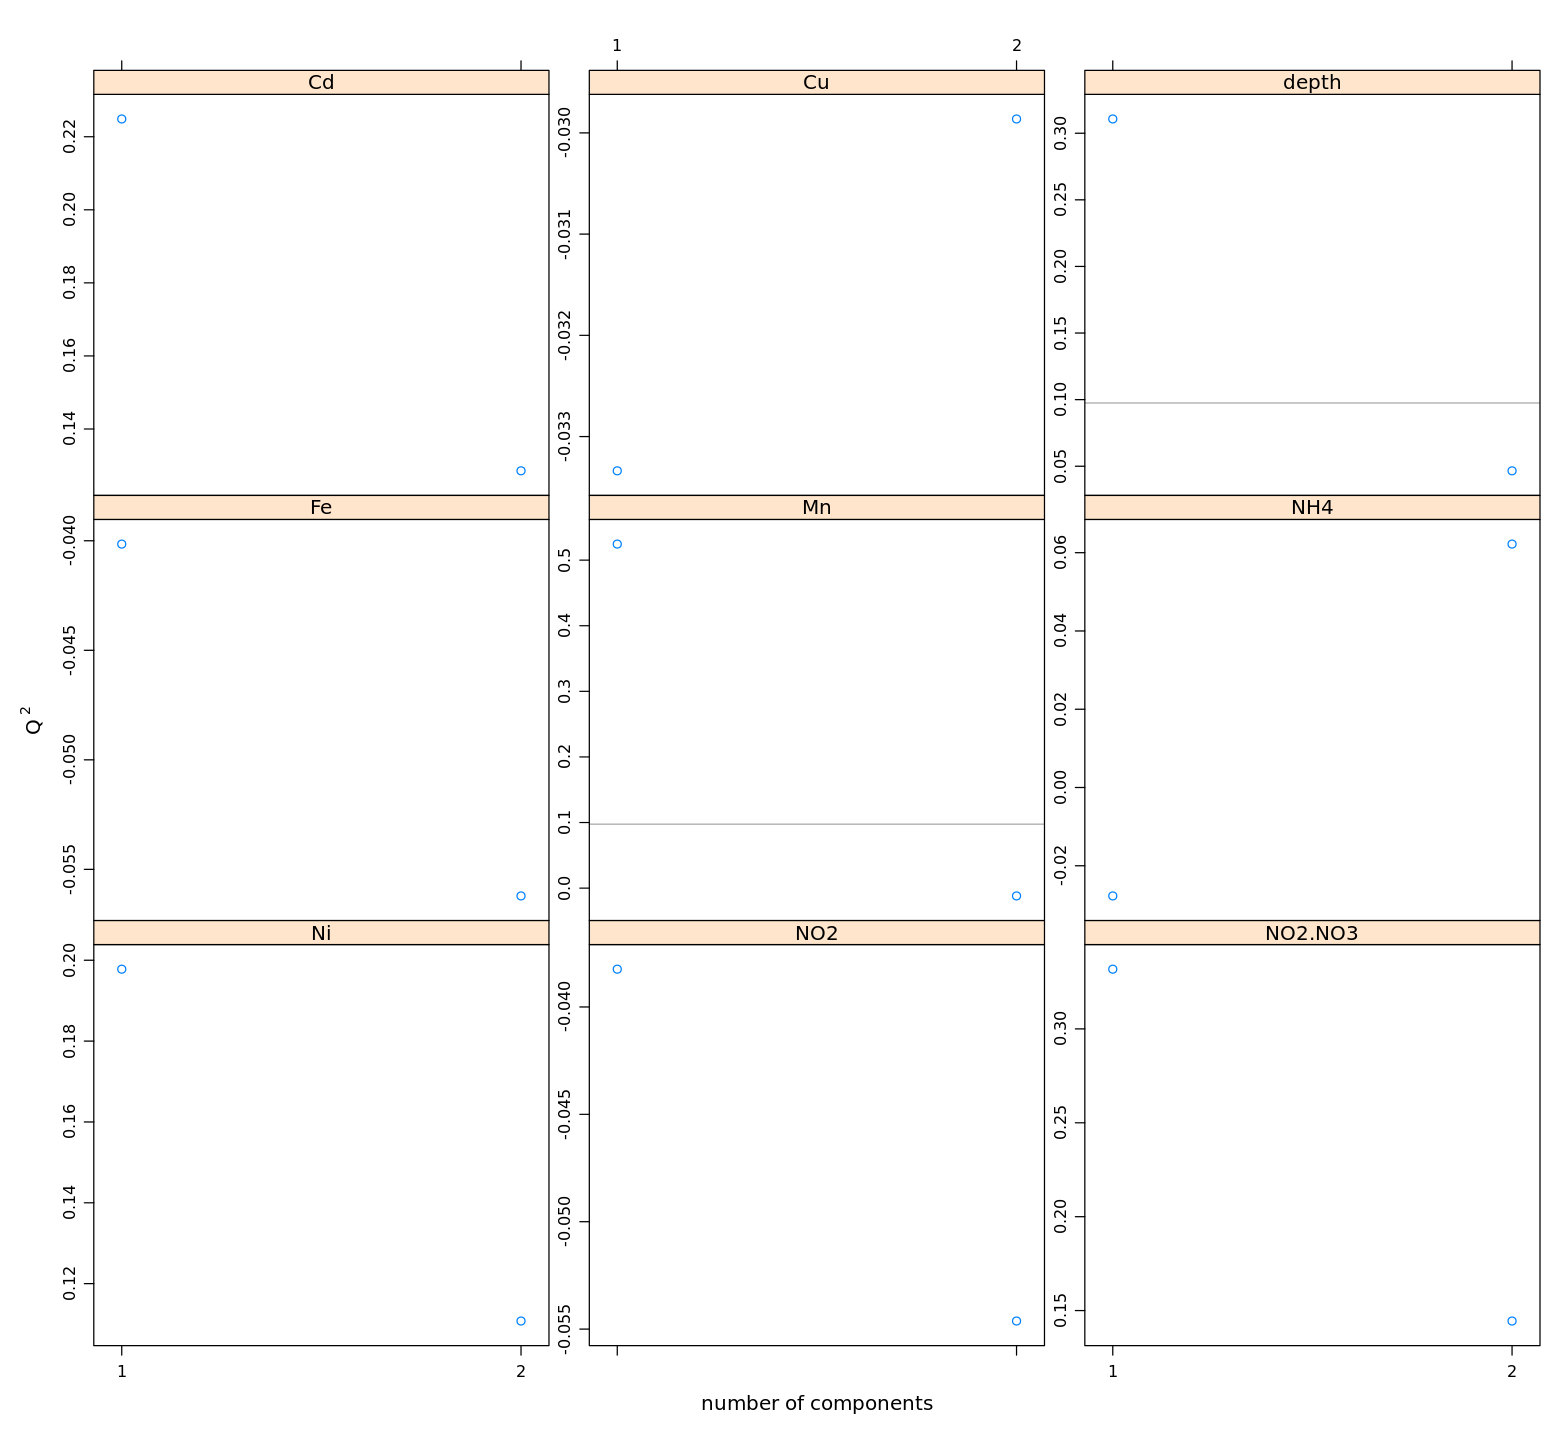

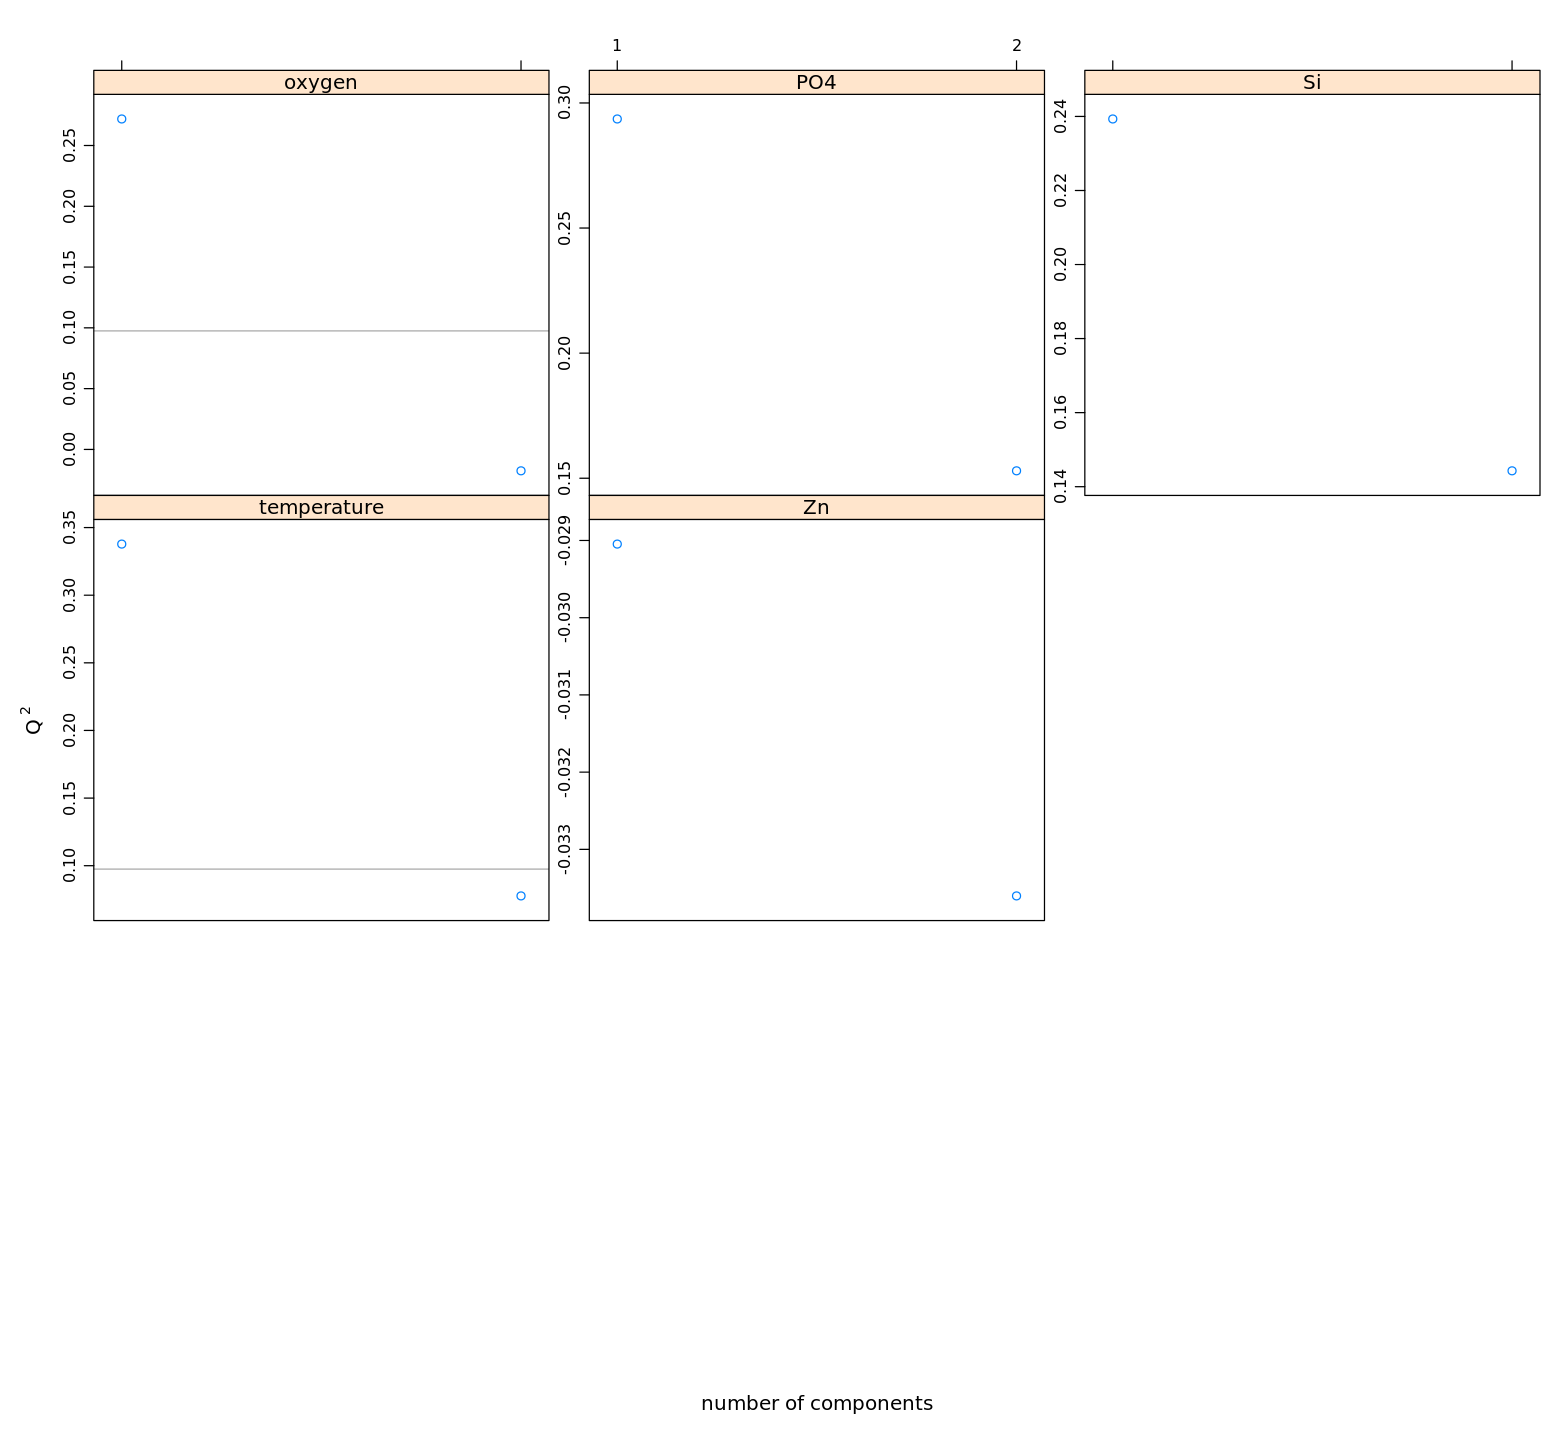

In [147]:
# ncomp = 2 is enough
plot(result.val, criterion  = 'Q2')

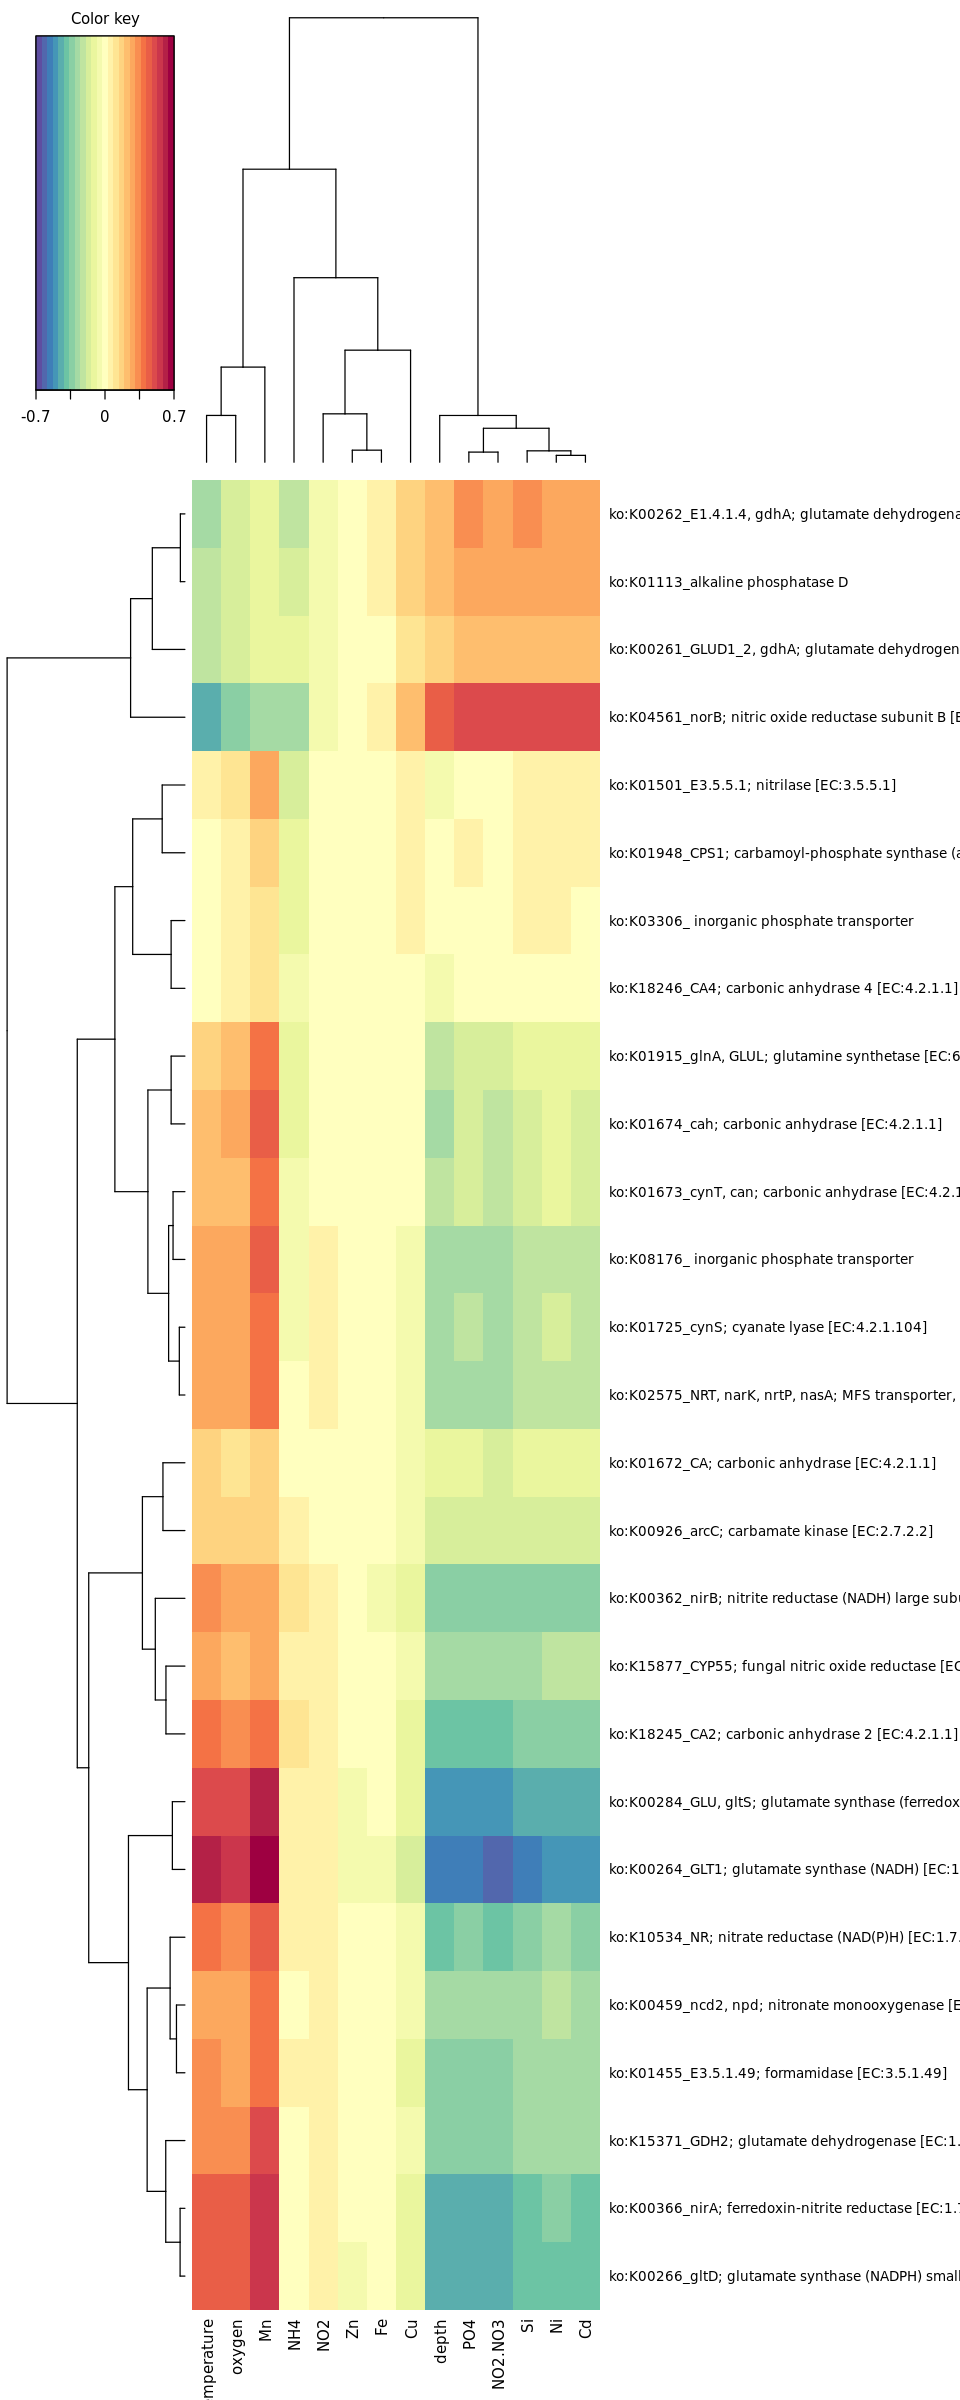

In [148]:
options(repr.plot.width = 8, repr.plot.height = 20)
cim(result, margins = c(5,20))

,temperature,oxygen,Mn,NH4,NO2,Zn,Fe,Cu,depth,PO4,NO2.NO3,Si,Ni,Cd
ko:K00266_gltD; glutamate synthase (NADPH) small chain [EC:1.4.1.13],0.46985429,0.44454857,0.57919767,0.02717470,0.0592489013,-0.028339159,-0.0207656469,-0.099186858,-0.46090717,-0.44441027,-0.469209578,-0.405399637,-0.37468298,-0.390439830
ko:K00366_nirA; ferredoxin-nitrite reductase [EC:1.7.7.1],0.44612478,0.42248999,0.55114535,0.02482980,0.0562151224,-0.026927476,-0.0195951784,-0.093698703,-0.43775107,-0.42163453,-0.445302950,-0.384499603,-0.35527442,-0.370321029
ko:K15371_GDH2; glutamate dehydrogenase [EC:1.4.1.2],0.36034585,0.35791729,0.49604154,-0.02118589,0.0436474429,-0.022579385,-0.0106654347,-0.055376207,-0.35873701,-0.32651640,-0.350789614,-0.292514307,-0.26637071,-0.282151977
ko:K01455_E3.5.1.49; formamidase [EC:3.5.1.49],0.33699058,0.30806284,0.38250971,0.04616786,0.0436324607,-0.019789003,-0.0182327514,-0.084274644,-0.32723905,-0.32782868,-0.342280339,-0.302441505,-0.28205233,-0.291006869
"ko:K00459_ncd2, npd; nitronate monooxygenase [EC:1.13.12.16]",0.30178580,0.28374002,0.36654574,0.02188980,0.0382445364,-0.018112941,-0.0138928922,-0.065891376,-0.29548468,-0.28695408,-0.302328096,-0.262328681,-0.24287241,-0.252602812
ko:K10534_NR; nitrate reductase (NAD(P)H) [EC:1.7.1.1 1.7.1.2 1.7.1.3],0.37461032,0.35067055,0.45029809,0.03098224,0.0476358973,-0.022407184,-0.0177223189,-0.083667802,-0.36631244,-0.35749739,-0.376105022,-0.327299804,-0.30338295,-0.315126260
ko:K00264_GLT1; glutamate synthase (NADH) [EC:1.4.1.14],0.60216808,0.55610553,0.70068948,0.06856581,0.0773726394,-0.035641122,-0.0308363240,-0.143730677,-0.58648438,-0.58105122,-0.608616459,-0.534333224,-0.49704260,-0.514268906
"ko:K00284_GLU, gltS; glutamate synthase (ferredoxin) [EC:1.4.7.1]",0.52967212,0.49827208,0.64416615,0.03774469,0.0670952090,-0.031804063,-0.0242993301,-0.115315474,-0.51869720,-0.50341078,-0.530478451,-0.460124535,-0.42593481,-0.443072241
ko:K18245_CA2; carbonic anhydrase 2 [EC:4.2.1.1],0.38744661,0.33961689,0.39529706,0.08914604,0.0517034856,-0.022026603,-0.0254768816,-0.114650731,-0.37172715,-0.38919798,-0.401304798,-0.363514086,-0.34229136,-0.349414148
ko:K15877_CYP55; fungal nitric oxide reductase [EC:1.7.1.14],0.27680728,0.24378141,0.28591339,0.06085392,0.0368180967,-0.015793708,-0.0178467802,-0.080514871,-0.26593110,-0.27709266,-0.286096726,-0.258467536,-0.24313070,-0.248468926


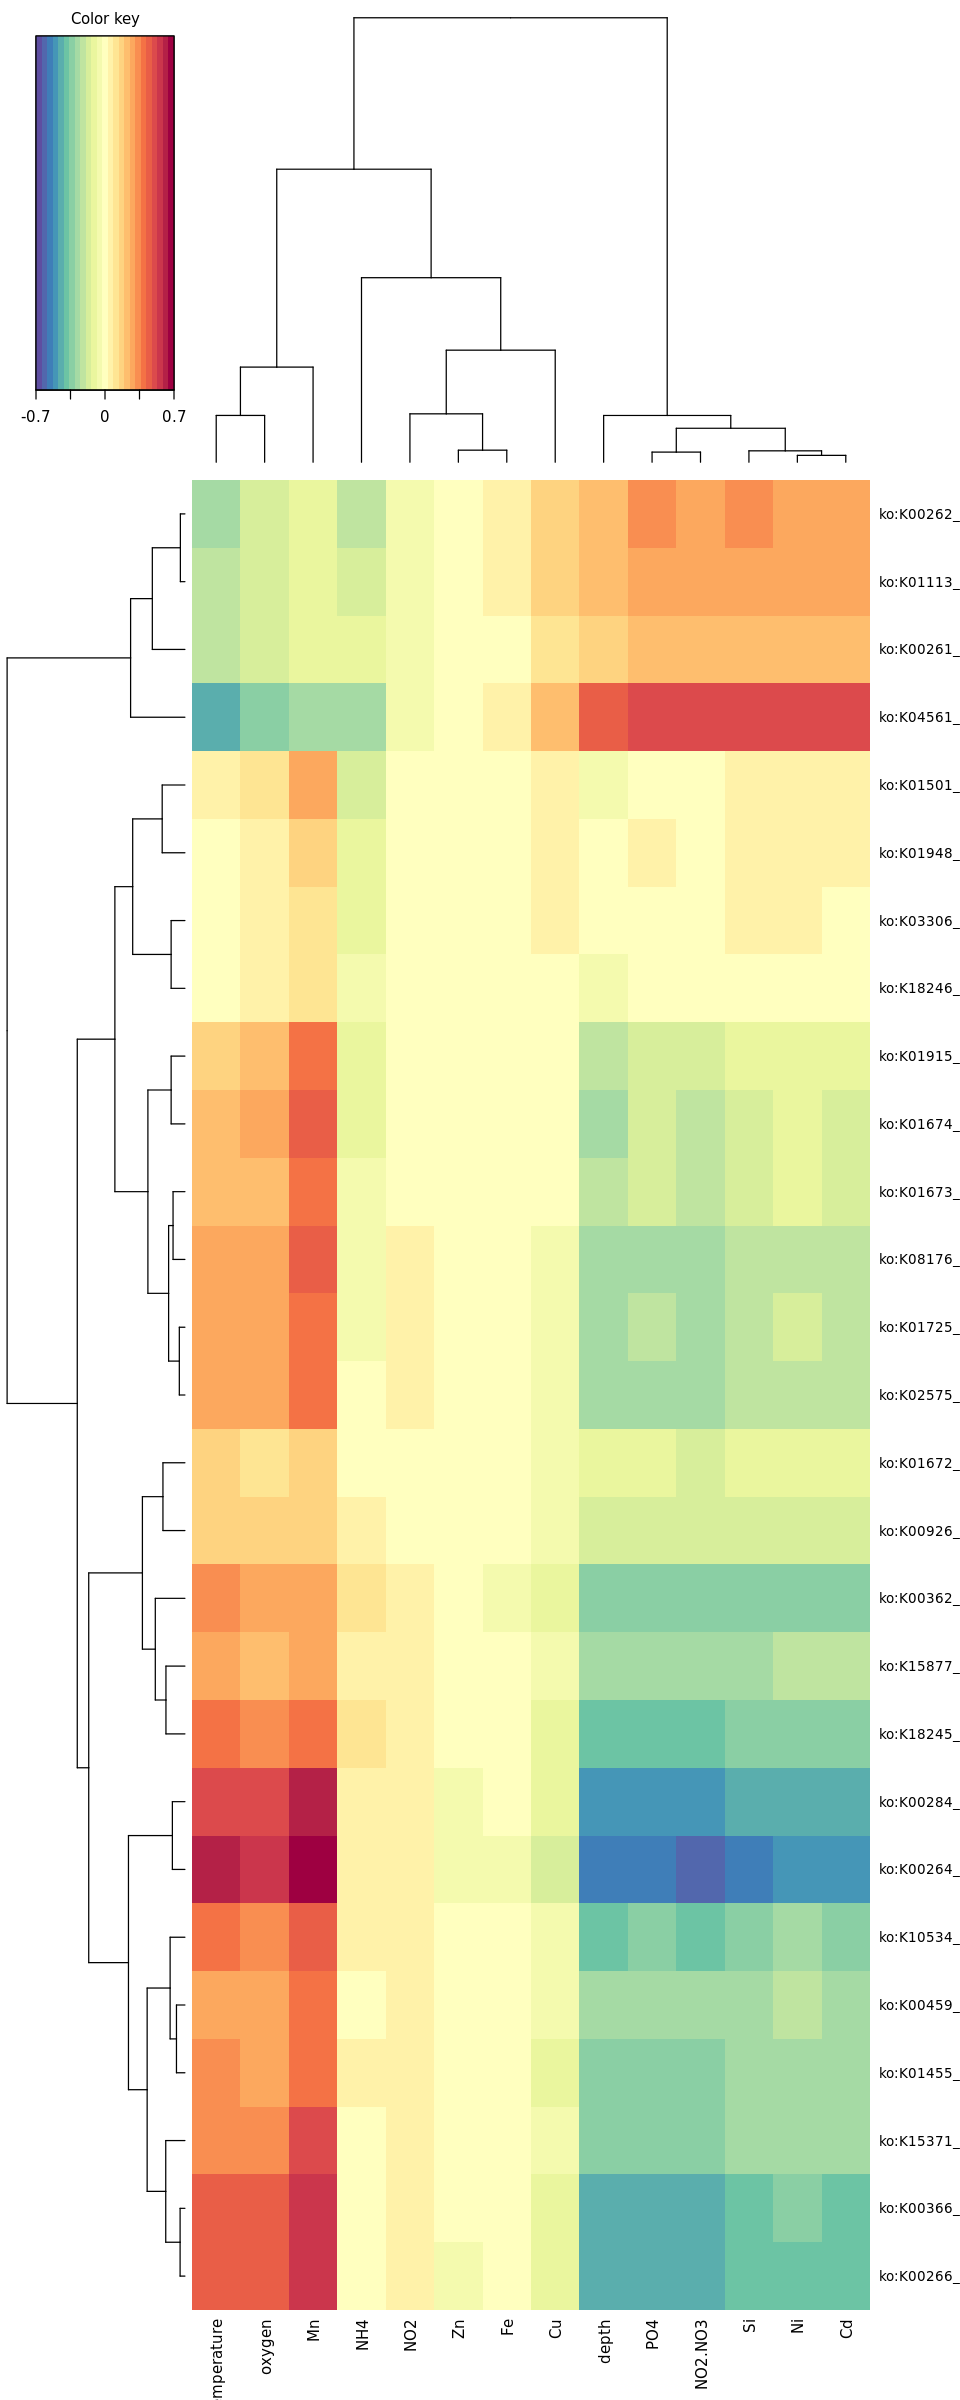

In [149]:
cim<-cim(result)
cim$mat #correlation matrix

In [150]:
cim<-as.data.frame(as.matrix(cim$mat))
#head(cim)

In [151]:
cim$KO_def<-rownames(cim)
g<-merge(cim, gois, by='KO_def')
head(g)

,KO_def,temperature,oxygen,Mn,NH4,NO2,Zn,Fe,Cu,depth,PO4,NO2.NO3,Si,Ni,Cd,KEGG_ko,def,id
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1,"ko:K00261_GLUD1_2, gdhA; glutamate dehydrogenase (NAD(P)+) [EC:1.4.1.3]",-0.2131160,-0.1556850,-0.12241943,-0.12606871,-0.03172499,0.01056657,0.02365568,0.10099381,0.1948410,0.2403193,0.2373486,0.2336769,0.2267434,0.2238851,ko:K00261,"GLUD1_2, gdhA; glutamate dehydrogenase (NAD(P)+) [EC:1.4.1.3]",nitrogen
2,"ko:K00262_E1.4.1.4, gdhA; glutamate dehydrogenase (NADP+) [EC:1.4.1.4]",-0.2643828,-0.1721315,-0.08774121,-0.20838705,-0.04157404,0.01206284,0.03585386,0.15088828,0.2352131,0.3158399,0.3056550,0.3126515,0.3072492,0.2991300,ko:K00262,"E1.4.1.4, gdhA; glutamate dehydrogenase (NADP+) [EC:1.4.1.4]",nitrogen
3,ko:K00264_GLT1; glutamate synthase (NADH) [EC:1.4.1.14],0.6021681,0.5561055,0.70068948,0.06856581,0.07737264,-0.03564112,-0.03083632,-0.14373068,-0.5864844,-0.5810512,-0.6086165,-0.5343332,-0.4970426,-0.5142689,ko:K00264,GLT1; glutamate synthase (NADH) [EC:1.4.1.14],nitrogen
4,ko:K00266_gltD; glutamate synthase (NADPH) small chain [EC:1.4.1.13],0.4698543,0.4445486,0.57919767,0.02717470,0.05924890,-0.02833916,-0.02076565,-0.09918686,-0.4609072,-0.4444103,-0.4692096,-0.4053996,-0.3746830,-0.3904398,ko:K00266,gltD; glutamate synthase (NADPH) small chain [EC:1.4.1.13],nitrogen
5,"ko:K00284_GLU, gltS; glutamate synthase (ferredoxin) [EC:1.4.7.1]",0.5296721,0.4982721,0.64416615,0.03774469,0.06709521,-0.03180406,-0.02429933,-0.11531547,-0.5186972,-0.5034108,-0.5304785,-0.4601245,-0.4259348,-0.4430722,ko:K00284,"GLU, gltS; glutamate synthase (ferredoxin) [EC:1.4.7.1]",nitrogen
6,ko:K00362_nirB; nitrite reductase (NADH) large subunit [EC:1.7.1.15],0.3284145,0.2669569,0.27121517,0.12733328,0.04603373,-0.01762945,-0.02807502,-0.12267271,-0.3086193,-0.3475333,-0.3513237,-0.3307930,-0.3159893,-0.3174730,ko:K00362,nirB; nitrite reductase (NADH) large subunit [EC:1.7.1.15],nitrogen


In [152]:
rownames(g)<-g$KO_def

In [153]:
g<-g[,-1]
g<-g[,-16]

In [154]:
g<-g[,-15]

In [167]:
options(repr.plot.width = 12, repr.plot.height = 7)

In [156]:
library(viridis)
library(pheatmap)

In [157]:
annotation <- data.frame(Class = g$id)
rownames(annotation)<-rownames(g)
newCols <- colorRampPalette(grDevices::rainbow(length(unique(annotation$Class))))
mycolors <- newCols(length(unique(annotation$Class)))
names(mycolors) <- unique(annotation$Class)
mycolors <- list(Class = mycolors)
mycolors = list("Class"=c('iron'='#ff855c','nitrogen'='#d199ff','nickel'='#7dfffd','phosphorus'='#a7ff78','carbon'='#ff6bd3','siderophore'='#6b70ff','divalent metal'='#ffe4b5','manganese'='#ff6395','zinc'='#45b8ff','transcription factor'='#92b3a0','copper'='#fff266'))

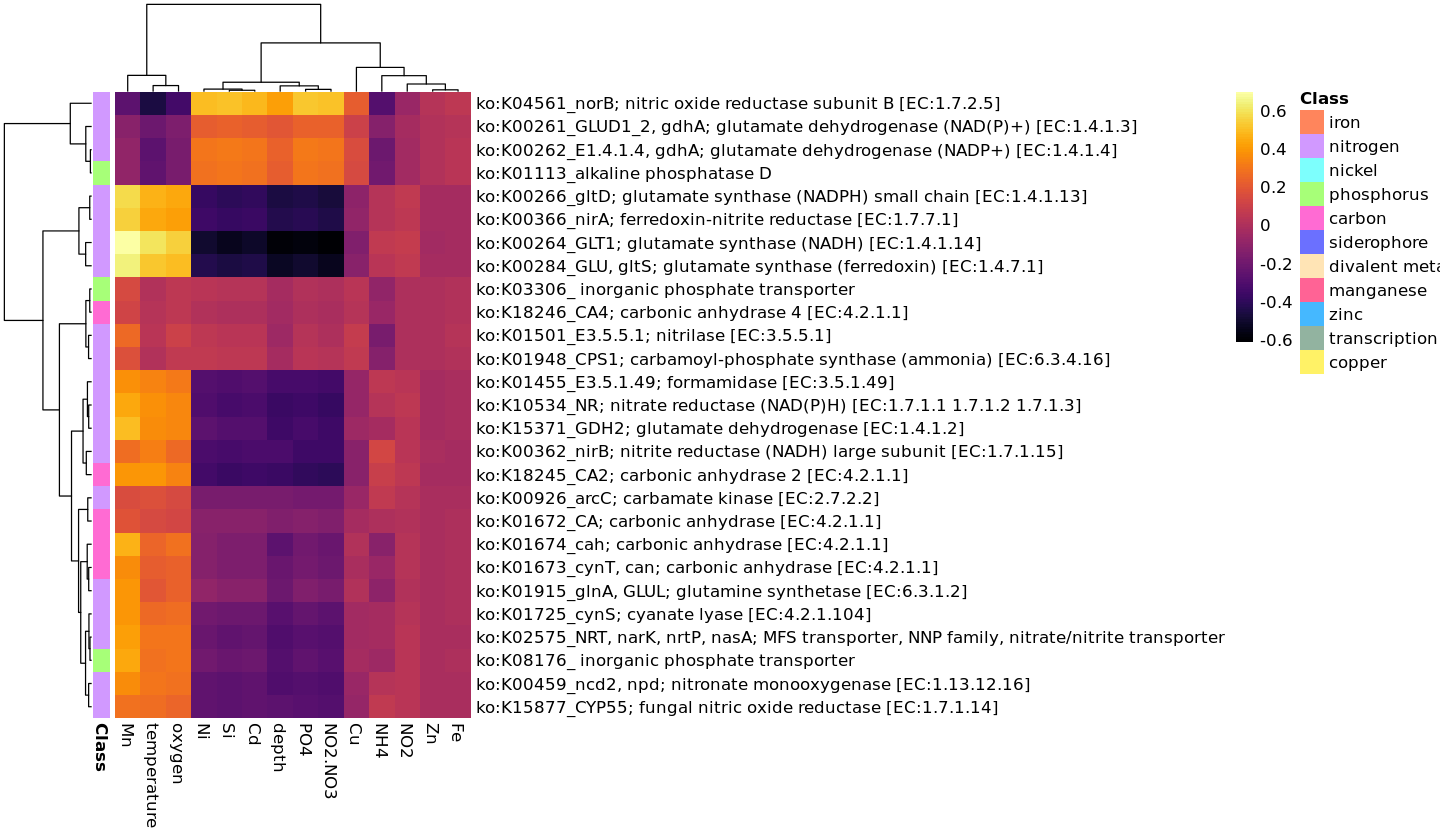

In [168]:
annotation <- data.frame(Class = g$id)
rownames(annotation)<-rownames(g)
myColor <- viridis_pal(option = "inferno")(100)
plot<-pheatmap(mat = g[,-15], annotation_row = annotation, color = myColor, cluster_rows=T, annotation_colors = mycolors)

In [169]:
ggsave(file="eukprot_pls_cds_nutrients.eps", plot, dpi = 600, width = 13, height = 12)

In [52]:
write.csv(e, 'transcripts.goi.pls.csv')

# Transcripts/L & proteins/L ODV

In [8]:
#Normalize counts per L
#Read in taxa table

egg<-read.delim('eggnog.emapper.annotations',sep="\t",header=F)
egg<-egg[-1,]
egg<-egg[-1,]
egg<-egg[-1,]
egg<-egg[-1,]
colnames(egg)<-c('transcript_name','seed_ortholog','evalue','score','eggNOG_OG', 'narr_OG_name', 'narrOG_cat','narr_OG_desc','best_OG_names','best_OG_cat','best_OG_desc','Preferred_name','GOs','EC','KEGG_ko','KAGG_pathway','KEGG_Module','KEGG_Reaction','KEGG_rclass','BRITE','KEGG_TC','CAZy','BiGG_Reaction','PFAMs')
egg<-egg[-1,]
#head(egg)


In [9]:
#transcripts
sub<-merge(egg, merge, by='transcript_name')
subset<-subset(sub, select = c('transcript_name','division','KEGG_ko','class','domain'))
subset[,6:51]<-sub[,25:70] #transcripts

In [10]:
options(repr.matrix.max.cols=50, repr.matrix.max.rows=100)
#head(cts1)

In [56]:
#proteins
sub<-merge(egg, merge, by='transcript_name')
subset<-subset(sub, select = c('transcript_name','division','KEGG_ko','class','domain'))
subset[,6:92]<-sub[,25:111] #proteins

In [57]:
library(caroline)
key<-read.tab('rest.kegg.jp.txt')
colnames(key)<-c('KEGG_ko','def')
test<-subset #subset=file with taxonomy (class),KEGG_ko, counts, see below heatmap section
test1<-test[!grepl('-',test$KEGG_ko),] #Get rid of rows with KEGG_kos  "-" 
subset<-test1
library(tidyr)
library(dplyr)

In [58]:
subset1<-subset %>% 
    mutate(KEGG_ko = strsplit(as.character(KEGG_ko), ",")) %>% 
    unnest(KEGG_ko) #Send counts to all KOs listed

In [215]:
#SPLIT counts with same KO!!

split_and_divide <- function(df) {
  df %>%
    mutate(KEGG_ko=str_split(KEGG_ko, ",")) %>%
    rowwise() %>% 
    mutate_at((6:49), funs(. / length(unlist(KEGG_ko)))) %>%
    unnest(KEGG_ko)  
}

subset1 <- split_and_divide(subset)

Warning message:
“`funs()` was deprecated in dplyr 0.8.0.
ℹ Please use a list of either functions or lambdas:

# Simple named list: list(mean = mean, median = median)

# Auto named with `tibble::lst()`: tibble::lst(mean, median)

# Using lambdas list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))”


In [59]:
euk<-c('Eukaryota')
d<-subset1[subset1$domain %in% euk,]
head(d)

transcript_name,division,KEGG_ko,class,domain,1_30_0.2,1_115_0.2,1_30_3,1_115_3,1_150,1_200,1_300,1_400,1_600,1_800,1_20,1_175,1_250,1_350,2_20,2_60,2_90,2_120,2_150,2_800,⋯,6_400,6_600,6_800,6_1000,6_1500,6_2000,7_20,7_40,7_70,7_700,7_108,7_112,7_117,7_122,7_150,7_300,7_500,8_20,8_40,8_120,8_175,8_400,8_800,8_250,8_600
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
megahit_HN001_k141_102362.p1,Telonemia,ko:K02875,SG_Telonemia_Indeterminate,Eukaryota,0.00000000,0,0.00000000,0,0,0,0,0,0,0,0.0000000,0,0,0,0.00000000,0.00000000,0,0,0,0,⋯,0,0,0,0,0,0,0.00000000,0.00000000,0.00000000,0,0,0,0,0,0,0,NaN,0.0000000,0,0,0,0,0,0,0
megahit_HN001_k141_106962.p1,Stramenopiles_X,ko:K01412,Dictyochophyceae,Eukaryota,0.00000000,0,0.00000000,0,0,0,0,0,0,0,0.0000000,0,0,0,0.00000000,0.00000000,0,0,0,0,⋯,0,0,0,0,0,0,0.00000000,0.00000000,0.00000000,0,0,0,0,0,0,0,NaN,0.0000000,0,0,0,0,0,0,0
megahit_HN001_k141_113192.p1,Choanoflagellida,ko:K13811,SG_Opisthokonta_Indeterminate,Eukaryota,0.00000000,0,0.00000000,0,0,0,0,0,0,0,0.0000000,0,0,0,0.00000000,0.00000000,0,0,0,0,⋯,0,0,0,0,0,0,0.00000000,0.00000000,0.00000000,0,0,0,0,0,0,0,NaN,0.0000000,0,0,0,0,0,0,0
megahit_HN001_k141_116190.p1,Haptophyta,ko:K00860,Prymnesiophyceae,Eukaryota,0.01670825,0,0.04458142,0,0,0,0,0,0,0,0.1138073,0,0,0,0.03585421,0.06400963,0,0,0,0,⋯,0,0,0,0,0,0,0.02541849,0.01264397,0.01294105,0,0,0,0,0,0,0,NaN,0.0273209,0,0,0,0,0,0,0
megahit_HN001_k141_116190.p1,Haptophyta,ko:K00958,Prymnesiophyceae,Eukaryota,0.01670825,0,0.04458142,0,0,0,0,0,0,0,0.1138073,0,0,0,0.03585421,0.06400963,0,0,0,0,⋯,0,0,0,0,0,0,0.02541849,0.01264397,0.01294105,0,0,0,0,0,0,0,NaN,0.0273209,0,0,0,0,0,0,0
megahit_HN001_k141_116190.p1,Haptophyta,ko:K01507,Prymnesiophyceae,Eukaryota,0.01670825,0,0.04458142,0,0,0,0,0,0,0,0.1138073,0,0,0,0.03585421,0.06400963,0,0,0,0,⋯,0,0,0,0,0,0,0.02541849,0.01264397,0.01294105,0,0,0,0,0,0,0,NaN,0.0273209,0,0,0,0,0,0,0


In [60]:
#GOI
KO<-c('ko:K00522','ko:K02575','ko:K03306','ko:K08176','ko:K04564','ko:K04565','ko:K07375','ko:K03839','ko:K02217','ko:K01601','ko:K01113')

In [63]:
#proteins
d<-d[,-1]
d<-d[,-1]
d<-d[,-2]
d<-d[,-2]

In [15]:
#transcripts
d<-d[,-1]
d<-d[,-1]
d<-d[,-2]
d<-d[,-2]
d<-d[,-46]
d<-d[,-46]

In [64]:
dd <- d %>%
    group_by(KEGG_ko) %>% summarise_all(funs(sum))

Warning message:
“`funs()` was deprecated in dplyr 0.8.0.
ℹ Please use a list of either functions or lambdas:

# Simple named list: list(mean = mean, median = median)

# Auto named with `tibble::lst()`: tibble::lst(mean, median)

# Using lambdas list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))”


In [65]:
kos<-dd[dd$KEGG_ko %in% KO,]
kos

KEGG_ko,1_30_0.2,1_115_0.2,1_30_3,1_115_3,1_150,1_200,1_300,1_400,1_600,1_800,1_20,1_175,1_250,1_350,2_20,2_60,2_90,2_120,2_150,2_800,2_200,2_400,2_600,3_200,⋯,6_400,6_600,6_800,6_1000,6_1500,6_2000,7_20,7_40,7_70,7_700,7_108,7_112,7_117,7_122,7_150,7_300,7_500,8_20,8_40,8_120,8_175,8_400,8_800,8_250,8_600
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ko:K00522,0.000000,0.00000000,0.0000000,0.00000000,0.000000,0.000000,0.00000000,0.000000,0.00000000,0.36617126,0.000000,0.00000,0.00000000,0.00000,0.00000000,0.00000000,0.00000000,0.00000000,0.000000,0.00000,0.0000000,0.00000,0.00000,0.0000000,⋯,0.000000,0.0000000,0.00000000,0.0000000,0.0000000,0.00000,0.00000000,0.000000,0.000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.000000,0.00000,NaN,0.00000000,0.00000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.00000000
ko:K01601,0.605419,1.44363575,0.5407417,1.43793557,2.405799,0.775901,0.01810115,0.000000,0.05112302,0.08427023,4.827128,1.25388,0.01997617,0.00000,4.12167538,4.14116551,2.37811552,3.81609106,3.279176,0.00000,0.7600041,0.00000,0.00000,0.8181903,⋯,0.000000,0.0152148,0.03057321,0.1930678,0.1073814,0.00000,2.27287018,1.521983,1.193823,0.03038517,7.80982702,5.41827306,6.20016706,5.37286849,1.065375,0.00000,NaN,10.14261993,13.01545264,0.7577377,0.6899258,0.3023906,0.1636144,0.3103416,0.07838938
ko:K02575,0.000000,0.06636335,0.0000000,0.01156986,0.000000,0.000000,0.00000000,0.000000,0.00000000,0.00000000,0.000000,0.00000,0.00000000,0.00000,0.00000000,0.00000000,0.00000000,0.08524430,0.000000,0.00000,0.0000000,0.00000,0.00000,0.0000000,⋯,0.000000,0.0000000,0.00000000,0.0000000,0.0000000,0.00000,0.00000000,0.000000,0.000000,0.00000000,0.10402205,0.17217738,0.02276674,0.02054505,0.000000,0.00000,NaN,0.00000000,0.03999123,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.00000000
ko:K03306,0.000000,0.01505958,0.0000000,0.01329828,0.000000,0.000000,0.00000000,0.000000,0.00000000,0.00000000,0.000000,0.00000,0.00000000,0.00000,0.00000000,0.00000000,0.00000000,0.41709208,0.000000,0.00000,0.0000000,0.00000,0.00000,0.0000000,⋯,0.000000,0.0000000,0.00000000,0.0000000,0.0000000,0.00000,0.00000000,0.000000,0.000000,0.00000000,0.08920060,0.23805552,0.00000000,0.00000000,0.000000,0.00000,NaN,0.00000000,0.00000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.00000000
ko:K03839,0.000000,0.00000000,0.0000000,0.00000000,0.000000,0.000000,0.00000000,0.000000,0.00000000,0.00000000,0.000000,0.00000,0.00000000,0.00000,0.00000000,0.00000000,0.00000000,0.00000000,0.000000,0.00000,0.0000000,0.00000,0.00000,0.0000000,⋯,0.000000,0.0000000,0.00000000,0.0000000,0.0000000,0.00000,0.00000000,0.000000,0.000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.000000,0.00000,NaN,0.00000000,0.00000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.00000000
ko:K04564,0.000000,0.00000000,0.0000000,0.00000000,0.000000,0.000000,0.00000000,0.000000,0.00000000,0.00000000,0.000000,0.00000,0.00000000,0.00000,0.00000000,0.00000000,0.00000000,0.00000000,0.000000,0.00000,0.0000000,0.00000,0.00000,0.0000000,⋯,0.000000,0.0000000,0.00000000,0.0000000,0.0000000,0.00000,0.00000000,0.000000,0.000000,0.00000000,0.00000000,0.24339041,0.00000000,0.13568008,0.000000,0.00000,NaN,0.00000000,0.00000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.00000000
ko:K04565,0.000000,0.00000000,0.0000000,0.00000000,0.000000,0.000000,0.00000000,0.000000,0.00000000,0.00000000,0.000000,0.00000,0.00000000,0.00000,0.03233909,0.01732025,0.01556026,0.00000000,0.000000,0.00000,0.0000000,0.00000,0.00000,0.0000000,⋯,0.000000,0.0000000,0.00000000,0.0000000,0.0000000,0.00000,0.01590444,0.000000,0.000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.000000,0.00000,NaN,0.01848179,0.00000000,0.000

In [66]:
write.csv(kos,'transcript_GOI_kos_NSAF.csv')

#Plot in ODV

In [55]:
#NXR - including bacteria
KO<-c('ko:K00370','ko:K00368','ko:K10944','ko:K02314','ko:K00605')

In [52]:
head(subset1)

transcript_name,division,KEGG_ko,class,domain,1_30_0.2,1_115_0.2,1_30_3,1_115_3,1_150,⋯,7_150,7_300,8_20,8_40,8_120,8_175,8_400,8_800,8_250,8_600
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
megahit_HN001_k141_100230.p1,NA,ko:K03405,NA,Bacteria,0.0000000,0.0000000,0.0000000,0,0,⋯,0,0,0,0,0,0,0,0,0,0
megahit_HN001_k141_10061.p1,Alphaproteobacteria,ko:K03624,Pelagibacterales,Bacteria,0.3034826,0.0000000,0.0000000,0,0,⋯,0,0,0,0,0,0,0,0,0,0
megahit_HN001_k141_101601.p1,Gammaproteobacteria,ko:K01938,SAR86,Bacteria,0.0000000,0.0000000,0.0000000,0,0,⋯,0,0,0,0,0,0,0,0,0,0
megahit_HN001_k141_101938.p1,Alphaproteobacteria,ko:K02044,Hyphomicrobiales,Bacteria,0.3034826,0.0000000,0.3333333,0,0,⋯,0,0,0,0,0,0,0,0,0,0
megahit_HN001_k141_102111.p1,Alphaproteobacteria,ko:K00605,NA,Bacteria,0.6069652,0.2679045,0.0000000,0,0,⋯,0,0,0,0,0,0,0,0,0,0
megahit_HN001_k141_102362.p1,Telonemia,ko:K02875,SG_Telonemia_Indeterminate,Eukaryota,0.0000000,0.0000000,0.0000000,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [57]:
subset1<-subset1[,-1]
subset1<-subset1[,-1]
subset1<-subset1[,-2]
subset1<-subset1[,-2]
head(subset1)

KEGG_ko,1_30_0.2,1_115_0.2,1_30_3,1_115_3,1_150,1_200,1_300,1_400,1_600,⋯,7_150,7_300,8_20,8_40,8_120,8_175,8_400,8_800,8_250,8_600
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ko:K03405,0.0000000,0.0000000,0.0000000,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ko:K03624,0.3034826,0.0000000,0.0000000,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ko:K01938,0.0000000,0.0000000,0.0000000,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ko:K02044,0.3034826,0.0000000,0.3333333,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ko:K00605,0.6069652,0.2679045,0.0000000,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ko:K02875,0.0000000,0.0000000,0.0000000,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [58]:
kos<-subset1[subset1$KEGG_ko %in% KO,]
dd <- kos %>%
    group_by(KEGG_ko) %>% summarise_all(funs(sum))
dd
write.csv(dd,'summed_nitrification_proteinsL_taxa.csv')

KEGG_ko,1_30_0.2,1_115_0.2,1_30_3,1_115_3,1_150,1_200,1_300,1_400,1_600,⋯,7_150,7_300,8_20,8_40,8_120,8_175,8_400,8_800,8_250,8_600
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ko:K00368,0.0000000,1.0716180,0.0000000,0.0000000,11.132743,5.5887850,1.706161,2.4431340,6.2966175,⋯,1.46125461,1.922078,0.000000,0.000000,12.299717,13.0885874,11.3888889,2.081289,6.068966,3.0066323
ko:K00370,1.5174129,3.4827586,0.1666667,0.0000000,223.858407,168.6355140,279.810427,185.9224937,298.2307025,⋯,51.87453875,71.926179,1.081442,0.000000,254.052780,288.9066241,211.7791005,119.558514,83.862069,117.4591010
ko:K00605,10.4701493,5.8938992,0.3333333,0.2201592,1.203540,0.4859813,0.000000,0.0000000,0.0000000,⋯,0.08118081,0.000000,15.140187,13.786575,1.272385,0.6384677,0.8134921,1.156272,0.137931,0.3006632
ko:K02314,0.9104478,2.9469496,0.6666667,0.4403183,0.300885,0.0000000,0.000000,0.0000000,0.0000000,⋯,0.00000000,0.000000,1.081442,1.531842,0.000000,0.0000000,0.2711640,0.000000,0.000000,0.0000000
ko:K10944,0.0000000,0.8037135,0.0000000,0.0000000,1.504425,0.4859813,0.000000,0.4886268,0.5724198,⋯,0.40590406,0.404648,0.000000,0.000000,3.817154,3.8308061,4.3386243,1.156272,1.379310,1.6035372


# Investigating "NA" taxonomic conflicts in proteins and transcripts

In [23]:
#Read in raw transcripts or proteins and annotations from beginning of notebook
euk<-c('Eukaryota')
o<-merge[merge$domain %in% euk,] 

In [41]:
NAP<-c('Eukaryota')

#test<-o[o$classification %in% NAP,] #Select unclassified ORFs that were only annotated to Eukaryota level ("NA")

'%!in%' <- function(x,y)!('%in%'(x,y))
test<-o[o$classification %!in% NAP,] #Select classified non-NA Euk ORFs

In [42]:
nrow(test)

[1] 14261

In [33]:
egg<-read.delim('eggnog.emapper.annotations',sep="\t",header=F)
egg<-egg[-1,]
egg<-egg[-1,]
egg<-egg[-1,]
egg<-egg[-1,]
colnames(egg)<-c('transcript_name','seed_ortholog','evalue','score','eggNOG_OG', 'narr_OG_name', 'narrOG_cat','narr_OG_desc','best_OG_names','best_OG_cat','best_OG_desc','Preferred_name','GOs','EC','KEGG_ko','KAGG_pathway','KEGG_Module','KEGG_Reaction','KEGG_rclass','BRITE','KEGG_TC','CAZy','BiGG_Reaction','PFAMs')
egg<-egg[-1,]
#head(egg)


In [43]:
sub<-merge(egg, test, by='transcript_name')

In [44]:
subset<-subset(sub, select = c('transcript_name','KEGG_ko'))
subset[,3:89]<-sub[,25:111] # proteins
#subset[,3:46]<-sub[,25:70] #transcripts
head(subset)

,transcript_name,KEGG_ko,1_30_0.2,1_115_0.2,1_30_3,1_115_3,1_150,1_200,1_300,1_400,⋯,7_300,8_20,8_40,8_120,8_175,8_400,8_800,8_250,8_600,X
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,megahit_HN001_k141_102362.p1,ko:K02875,0.0000000,0,0,0.0000000,0,0,0,0,⋯,0,0.000000,0.000000,0,0,0,0,0,0,0
2,megahit_HN001_k141_103848.p3,-,0.0000000,0,0,0.2201592,0,0,0,0,⋯,0,0.000000,1.531842,0,0,0,0,0,0,0
3,megahit_HN001_k141_106962.p1,ko:K01412,0.0000000,0,0,0.0000000,0,0,0,0,⋯,0,0.000000,0.000000,0,0,0,0,0,0,0
4,megahit_HN001_k141_113192.p1,ko:K13811,0.0000000,0,0,0.0000000,0,0,0,0,⋯,0,0.000000,0.000000,0,0,0,0,0,0,0
5,megahit_HN001_k141_116190.p1,"ko:K00860,ko:K00958,ko:K01507,ko:K03103,ko:K13811",0.3034826,0,1,0.0000000,0,0,0,0,⋯,0,2.162884,0.000000,0,0,0,0,0,0,0
6,megahit_HN001_k141_116274.p1,-,0.1517413,0,0,0.0000000,0,0,0,0,⋯,0,0.000000,0.000000,0,0,0,0,0,0,0


In [45]:
nrow(subset)

[1] 10235

In [ ]:
#Send counts to all KOs listed
subset<-subset %>% 
    mutate(KEGG_ko = strsplit(as.character(KEGG_ko), ",")) %>% 
    unnest(KEGG_ko) 

In [46]:
#SPLIT counts with same KO!!

split_and_divide <- function(df) {
  df %>%
    mutate(KEGG_ko=str_split(KEGG_ko, ",")) %>%
    rowwise() %>% 
    mutate_at((3:88), funs(. / length(unlist(KEGG_ko)))) %>%
    unnest(KEGG_ko)  
}

subset <- split_and_divide(subset)

Warning message:
“`funs()` was deprecated in dplyr 0.8.0.
ℹ Please use a list of either functions or lambdas:

# Simple named list: list(mean = mean, median = median)

# Auto named with `tibble::lst()`: tibble::lst(mean, median)

# Using lambdas list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))”


In [47]:
subset<-subset[,-1]

In [48]:
library(dplyr)
d <- subset %>%
    group_by(KEGG_ko) %>% 
    summarise_each(funs(sum))

colnames(d)[1] <-c('ko')
#head(d)

Warning message:
“`summarise_each()` was deprecated in dplyr 0.7.0.
ℹ Please use `across()` instead.”
Warning message:
“`funs()` was deprecated in dplyr 0.8.0.
ℹ Please use a list of either functions or lambdas:

# Simple named list: list(mean = mean, median = median)

# Auto named with `tibble::lst()`: tibble::lst(mean, median)

# Using lambdas list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))”


In [49]:
ko2brite<-read.csv('ko2brite.csv',header=TRUE, stringsAsFactors=FALSE, fileEncoding="latin1") #"Enzyme" category not included - too broad
colnames(ko2brite)<-c('BRITE','ko','x','x1','x2')
merge2<-merge(ko2brite, d, by='ko',all=T) #If KO has two BRITE categories, each BRITE gets 1 KO count
test1<-merge2[!is.na(merge2$`1_30_0.2`), ] #Remove KO/BRITE rows without matches to dataset
merge2<-test1

In [50]:
KO<-c('ko01007 Amino acid related enzymes','ko01009 Protein phosphatases and associated proteins','ko01002 Peptidases and inhibitors','ko01001 Protein kinases','ko04031 GTP-binding proteins','ko03012 Translation factors','ko03011 Ribosome','ko03009 Ribosome biogenesis','ko03019 Messenger RNA biogenesis','ko03036 Chromosome and associated proteins','ko03021 Transcription machinery','ko03016 Transfer RNA biogenesisæ','ko03400 DNA repair and recombination proteins','ko03032 DNA replication proteins','ko03000 Transcription factors','ko00194 Photosynthesis proteinsæ','ko03029 Mitochondrial biogenesis','ko04040 Ion channels','ko02000 Transporters','ko04090 CD molecules','ko04131 Membrane trafficking','ko02044 Secretion system','ko04030 G protein-coupled receptors','ko01003 Glycosyltransferases','ko00536 Glycosaminoglycan binding proteins','ko01004 Lipid biosynthesis proteins','ko04091 Lectins','ko00537 Glycosylphosphatidylinositol (GPI)-anchored proteins','ko01008 Polyketide biosynthesis proteins','ko03051 Proteasome','ko04121 Ubiquitin system','ko03041 Spliceosome','ko03110 Chaperones and folding catalysts','ko04147 Exosome','ko04515 Cell adhesion molecules','ko02035 Bacterial motility proteinsæ','ko04054 Pattern recognition receptors','ko00199 Cytochrome P450','ko04990 Domain-containing proteins not elsewhere classified','ko04812 Cytoskeleton proteins','Other')

In [51]:
merge2<-merge2[,-1]
merge2<-merge2[,-2]
merge2<-merge2[,-2]
merge2<-merge2[,-2]

In [66]:
#transcripts
d<-merge2
d$X1_20<-0
d$X1_150<-0
d$X1_175<-0
d$X1_250<-0
d$X1_300<-0
d$X1_350<-0
d$X1_600<-0
d$X2_60<-0
d$X2_90<-0
d$X2_150<-0
d$X2_600<-0
d$X3_10<-0
d$X3_30<-0
d$X3_45<-0
d$X3_60<-0
d$X3_75<-0
d$X3_90<-0
d$X3_105<-0
d$X3_150<-0
d$X3_175<-0
d$X3_1200<-0
d$X5_40<-0
d$X5_70<-0
d$X5_150<-0
d$X5_600<-0
d$X6_40<-0
d$X6_70<-0
d$X6_150<-0
d$X6_600<-0
d$X6_1500<-0
d$X6_2500<-0
d$X6_3500<-0
d$X6_4050<-0
d$X7_40<-0
d$X7_70<-0
d$X7_112<-0
d$X7_117<-0
d$X7_122<-0
d$X7_150<-0
d$X7_300<-0
d$X8_20<-0
d$X8_400<-0
d$X8_800<-0
colnames(d)<-gsub("X", "", colnames(d))
merge2<-d
#tail(d)
#write.csv(d,'eukzoo_LCA.csv')

In [52]:
library(stringr)
library(gtools)
library(reshape2)
library(ggplot2)

#x <- t(d)

x <- melt(merge2)
colnames(x)<-c('BRITE','site','value')
xx<-subset(x, select = c('site','BRITE','value'))

Using BRITE as id variables



In [53]:
kegg<-c('ko01007 Amino acid related enzymes'='#FA0404','ko01009 Protein phosphatases and associated proteins'='#FB5F5F','ko01002 Peptidases and inhibitors'='#FB9F9F','ko01001 Protein kinases'='#BD4646','ko04031 GTP-binding proteins'='#F2670D','ko03012 Translation factors'='#D67637','ko03011 Ribosome'='#B85A1C','ko03009 Ribosome biogenesis'='#984610','ko03019 Messenger RNA biogenesis'='#F6BA0E','ko03036 Chromosome and associated proteins'='#DBB340','ko03021 Transcription machinery'='#AFA619','ko03016 Transfer RNA biogenesisæ'='#E6DA1E','ko03400 DNA repair and recombination proteins'='#FBEC06','ko03032 DNA replication proteins'='#CEFB06','ko03000 Transcription factors'='#BFE125','ko00194 Photosynthesis proteinsæ'='#3CFA04','ko03029 Mitochondrial biogenesis'='#4EC62A','ko04040 Ion channels'='#37D782','ko02000 Transporters'='#1DB062','ko04090 CD molecules'='#2DF7BD','ko04131 Membrane trafficking'='#16B98A','ko02044 Secretion system'='#16E6E3','ko04030 G protein-coupled receptors'='#19BBB9','ko01003 Glycosyltransferases'='#19A0BB','ko00536 Glycosaminoglycan binding proteins'='#0B6D81','ko01004 Lipid biosynthesis proteins'='#0c1a63','ko04091 Lectins'='#1F8ACB','ko00537 Glycosylphosphatidylinositol (GPI)-anchored proteins'='#0A6FF7','ko01008 Polyketide biosynthesis proteins'='#043BF7','ko03051 Proteasome'='#2E08C8','ko04121 Ubiquitin system'='#5643A5','ko03041 Spliceosome'='#9084C4','ko03110 Chaperones and folding catalysts'='#9D24EB','ko04147 Exosome'='#B96BEB','ko04515 Cell adhesion molecules'='#F028E3','ko02035 Bacterial motility proteinsæ'='#D87AD2','ko04054 Pattern recognition receptors'='#F93875','ko00199 Cytochrome P450'='#f296b9','ko04990 Domain-containing proteins not elsewhere classified'='#f0dfe7','ko04812 Cytoskeleton proteins'='#FFFFFE','Other'='#000000')

In [54]:
options(repr.plot.width = 4, repr.plot.height = 17)

Warning message:
“Removed 1903 rows containing missing values (`geom_bar()`).”


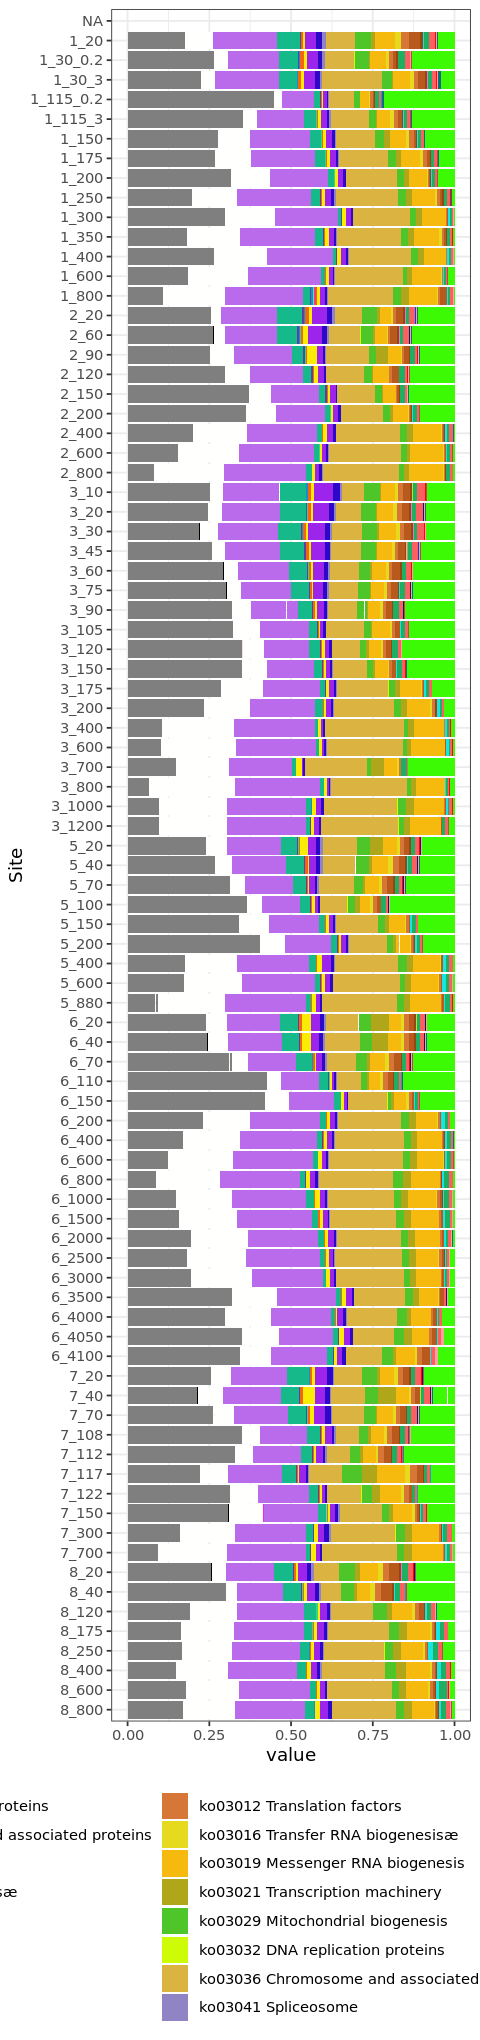

In [55]:
a<-read.csv('levels.csv', header=F) #Change levels using the desired order
xx$site <- factor(xx$site, levels = rev(a$V1))

ggplot(xx, aes(fill=BRITE, y=site, x=value)) + 
    geom_bar(position="fill", stat="identity", colour="NA") + theme_bw() + ylab("Site") + theme(legend.position = "bottom") + scale_fill_manual("legend",values=kegg)

# Transcripts vs protein ORF scatterplots

In [44]:
euk<-c('Eukaryota')
subset1<-subset[subset$domain %in% euk,]
head(subset1)

,transcript_name,class,KEGG_ko,domain,division,1_30_0.2,1_115_3,1_200,1_400,1_800,⋯,3_1000,5_20,5_200,5_400,5_880,6_20,6_110,6_200,X.x,X.y
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>
3,megahit_HN001_k141_100035.p1,Prymnesiophyceae,ko:K00485,Eukaryota,Haptophyta,0.375023,0,0,0,0,⋯,0,0,0,0,0,0,0,0,megahit_HN001_k141_100035.p1,0
5,megahit_HN001_k141_100044.p2,Prymnesiophyceae,ko:K10408,Eukaryota,Haptophyta,0.083842,0,0,0,0,⋯,0,0,0,0,0,0,0,0,megahit_HN001_k141_100044.p2,0
8,megahit_HN001_k141_10006.p1,NA,ko:K05692,Eukaryota,NA,0.233233,0,0,0,0,⋯,0,0,0,0,0,0,0,0,megahit_HN001_k141_10006.p1,0
9,megahit_HN001_k141_100070.p2,NA,"ko:K03283,ko:K09490",Eukaryota,NA,0.000000,0,0,0,0,⋯,0,0,0,0,0,0,0,0,megahit_HN001_k141_100070.p2,0
12,megahit_HN001_k141_100089.p1,Dinophyceae,"ko:K04300,ko:K07189,ko:K17453",Eukaryota,Dinophyta,0.425377,0,0,0,0,⋯,0,0,0,0,0,0,0,0,megahit_HN001_k141_100089.p1,0
14,megahit_HN001_k141_100111.p2,SG_Archaeplastida_Indeterminate,"ko:K01135,ko:K12375",Eukaryota,Picozoa,0.464658,0,0,0,0,⋯,0,0,0,0,0,0,0,0,megahit_HN001_k141_100111.p2,0


In [45]:
write.csv(subset1, 'euk_ORFs_TPM_KEGG.csv')

In [46]:
a<-read.csv('euk_ORFs_NSAF_KEGG.csv')
head(a)

,X,transcript_name,division,KEGG_ko,class,domain,X1_30_0.2,X1_115_0.2,X1_30_3,X1_115_3,⋯,X7_300,X7_500,X8_20,X8_40,X8_120,X8_175,X8_400,X8_800,X8_250,X8_600
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,9,megahit_HN001_k141_102362.p1,Telonemia,ko:K02875,SG_Telonemia_Indeterminate,Eukaryota,0.00000000,0,0.00000000,0,⋯,0,NA,0.0000000,0,0,0,0,0,0,0
2,22,megahit_HN001_k141_106962.p1,Stramenopiles_X,ko:K01412,Dictyochophyceae,Eukaryota,0.00000000,0,0.00000000,0,⋯,0,NA,0.0000000,0,0,0,0,0,0,0
3,33,megahit_HN001_k141_113192.p1,Choanoflagellida,ko:K13811,SG_Opisthokonta_Indeterminate,Eukaryota,0.00000000,0,0.00000000,0,⋯,0,NA,0.0000000,0,0,0,0,0,0,0
4,48,megahit_HN001_k141_116190.p1,Haptophyta,"ko:K00860,ko:K00958,ko:K01507,ko:K03103,ko:K13811",Prymnesiophyceae,Eukaryota,0.01670825,0,0.04458142,0,⋯,0,NA,0.0273209,0,0,0,0,0,0,0
5,52,megahit_HN001_k141_117055.p2,Ciliophora,ko:K09496,Spirotrichea,Eukaryota,0.00000000,0,0.00000000,0,⋯,0,NA,0.0000000,0,0,0,0,0,0,0
6,54,megahit_HN001_k141_119311.p1,Haptophyta,ko:K21700,Prymnesiophyceae,Eukaryota,0.00000000,0,0.00000000,0,⋯,0,NA,0.0000000,0,0,0,0,0,0,0


In [ ]:
prot<-a
prot<-prot[,-85]
head(prot)

In [51]:
prot$sum_NSAF<-rowSums(prot[,7:92]) #for row sums
#prot$mean_NSAF<-rowMeans(prot[,6:91]) #for row means
head(prot)

,X,transcript_name,division,KEGG_ko,class,domain,X1_30_0.2,X1_115_0.2,X1_30_3,X1_115_3,⋯,X7_300,X8_20,X8_40,X8_120,X8_175,X8_400,X8_800,X8_250,X8_600,sum_NSAF
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,9,megahit_HN001_k141_102362.p1,Telonemia,ko:K02875,SG_Telonemia_Indeterminate,Eukaryota,0.00000000,0,0.00000000,0,⋯,0,0.0000000,0,0,0,0,0,0,0,0.00000000
2,22,megahit_HN001_k141_106962.p1,Stramenopiles_X,ko:K01412,Dictyochophyceae,Eukaryota,0.00000000,0,0.00000000,0,⋯,0,0.0000000,0,0,0,0,0,0,0,0.01811990
3,33,megahit_HN001_k141_113192.p1,Choanoflagellida,ko:K13811,SG_Opisthokonta_Indeterminate,Eukaryota,0.00000000,0,0.00000000,0,⋯,0,0.0000000,0,0,0,0,0,0,0,0.00000000
4,48,megahit_HN001_k141_116190.p1,Haptophyta,"ko:K00860,ko:K00958,ko:K01507,ko:K03103,ko:K13811",Prymnesiophyceae,Eukaryota,0.01670825,0,0.04458142,0,⋯,0,0.0273209,0,0,0,0,0,0,0,0.63262345
5,52,megahit_HN001_k141_117055.p2,Ciliophora,ko:K09496,Spirotrichea,Eukaryota,0.00000000,0,0.00000000,0,⋯,0,0.0000000,0,0,0,0,0,0,0,0.59895049
6,54,megahit_HN001_k141_119311.p1,Haptophyta,ko:K21700,Prymnesiophyceae,Eukaryota,0.00000000,0,0.00000000,0,⋯,0,0.0000000,0,0,0,0,0,0,0,0.04858121


In [52]:
trans<-read.csv('euk_ORFs_TPM_KEGG.csv') 

In [54]:
trans$sum_TPM<-rowSums(trans[,7:50]) #sum rows 
#trans$sum_TPM<-rowMeans(trans[,4:47])
head(trans)

,X,transcript_name,class,KEGG_ko,domain,division,X1_30_0.2,X1_115_3,X1_200,X1_400,⋯,X5_20,X5_200,X5_400,X5_880,X6_20,X6_110,X6_200,X.x,X.y,sum_TPM
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<dbl>
1,3,megahit_HN001_k141_100035.p1,Prymnesiophyceae,ko:K00485,Eukaryota,Haptophyta,0.375023,0,0,0,⋯,0,0,0,0,0,0,0,megahit_HN001_k141_100035.p1,0,0.375023
2,5,megahit_HN001_k141_100044.p2,Prymnesiophyceae,ko:K10408,Eukaryota,Haptophyta,0.083842,0,0,0,⋯,0,0,0,0,0,0,0,megahit_HN001_k141_100044.p2,0,0.083842
3,8,megahit_HN001_k141_10006.p1,NA,ko:K05692,Eukaryota,NA,0.233233,0,0,0,⋯,0,0,0,0,0,0,0,megahit_HN001_k141_10006.p1,0,0.233233
4,9,megahit_HN001_k141_100070.p2,NA,"ko:K03283,ko:K09490",Eukaryota,NA,0.000000,0,0,0,⋯,0,0,0,0,0,0,0,megahit_HN001_k141_100070.p2,0,0.000000
5,12,megahit_HN001_k141_100089.p1,Dinophyceae,"ko:K04300,ko:K07189,ko:K17453",Eukaryota,Dinophyta,0.425377,0,0,0,⋯,0,0,0,0,0,0,0,megahit_HN001_k141_100089.p1,0,0.444862
6,14,megahit_HN001_k141_100111.p2,SG_Archaeplastida_Indeterminate,"ko:K01135,ko:K12375",Eukaryota,Picozoa,0.464658,0,0,0,⋯,0,0,0,0,0,0,0,megahit_HN001_k141_100111.p2,0,0.464658


In [55]:
merge<-merge(prot, trans, by='transcript_name')

Warning message in merge.data.frame(prot, trans, by = "transcript_name"):
“column names ‘X.x’, ‘X.y’ are duplicated in the result”


In [64]:
nrow(prot)
nrow(merge)

[1] 10544

[1] 10101

In [58]:
merge<-subset(merge, select = c('transcript_name','KEGG_ko.x','class.x','domain.x','division.x','sum_TPM','sum_NSAF'))
head(merge)

,transcript_name,KEGG_ko.x,class.x,domain.x,division.x,sum_TPM,sum_NSAF
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,megahit_HN001_k141_102362.p1,ko:K02875,SG_Telonemia_Indeterminate,Eukaryota,Telonemia,0.790146,0.00000000
2,megahit_HN001_k141_106962.p1,ko:K01412,Dictyochophyceae,Eukaryota,Stramenopiles_X,0.528042,0.01811990
3,megahit_HN001_k141_113192.p1,ko:K13811,SG_Opisthokonta_Indeterminate,Eukaryota,Choanoflagellida,0.000000,0.00000000
4,megahit_HN001_k141_116190.p1,"ko:K00860,ko:K00958,ko:K01507,ko:K03103,ko:K13811",Prymnesiophyceae,Eukaryota,Haptophyta,0.247870,0.63262345
5,megahit_HN001_k141_117055.p2,ko:K09496,Spirotrichea,Eukaryota,Ciliophora,0.681918,0.59895049
6,megahit_HN001_k141_119311.p1,ko:K21700,Prymnesiophyceae,Eukaryota,Haptophyta,0.534195,0.04858121


In [157]:
#write.csv(merge,'TPM_NSAF_ORF.csv') #summed across samples
a<-read.csv('TPM_NSAF_ORF.csv')
#Note: Did not split strings for these in ko:KXXXXX annotations, so may have lost lowly expressed/abundant KOs returned by eggnog, with multiple KOs per ORF 

In [158]:
a$logNSAF<-log(a$sum_NSAF+1)
a$logTPM<-log(a$sum_TPM+1)
#a$logNSAF<-log(a$mean_NSAF+1)
#a$logTPM<-log(a$mean_TPM+1)

In [159]:
library(ggplot2)
g<-ggplot(a, aes(x=logTPM, y=logNSAF)) + theme_light() + geom_point() + geom_smooth(method = "lm", color="#FF69B4",se = TRUE) +
 theme(axis.text=element_text(size=14),axis.title=element_text(size=16))  

In [160]:
lm_eqn <- function(df){
    m <- lm(logNSAF ~ logTPM, df);
    eq <- substitute(italic(y) == a + b %.% italic(x)*","~~italic(r)^2~"="~r2, 
         list(a = format(unname(coef(m)[1]), digits = 2),
              b = format(unname(coef(m)[2]), digits = 2),
             r2 = format(summary(m)$r.squared, digits = 3)))
    as.character(as.expression(eq));
}

In [161]:
one<-g +  labs(tags = "a") + theme(plot.tag = element_text(size = 30)) + geom_text(x = 3, y = 4.5, label = lm_eqn(a), parse = TRUE, size = 4) + ggtitle('ORFs') + theme(plot.title = element_text(hjust = 0.5,size=20))

In [162]:
nrow(a)

[1] 10101

`geom_smooth()` using formula = 'y ~ x'


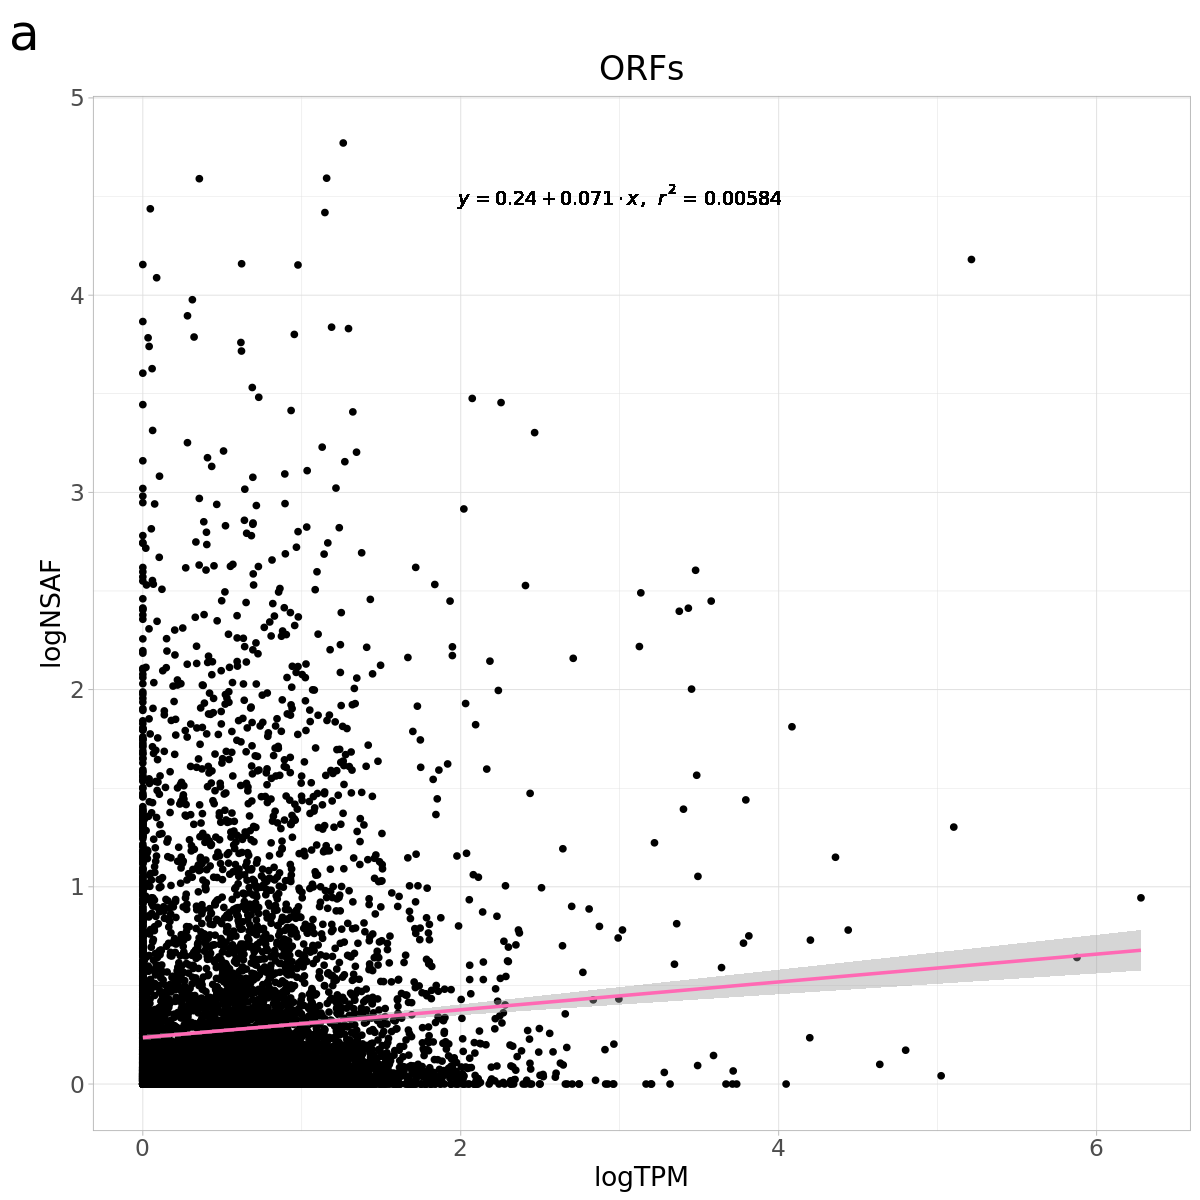

In [139]:
one

In [163]:
model <- lm(logNSAF~logTPM, data=a)
#summary(model)
library('lmtest')
bptest(model, ~ logTPM + I(logTPM^2), data = a)


	studentized Breusch-Pagan test

data:  model
BP = 37.822, df = 2, p-value = 6.123e-09


In [164]:
GOI<-c('ko:K01601','ko:K01601,ko:K01963','ko:K01601,ko:K08965')
y<-a[a$KEGG_ko %in% GOI,]

In [165]:
nrow(y)

[1] 170

`geom_smooth()` using formula = 'y ~ x'


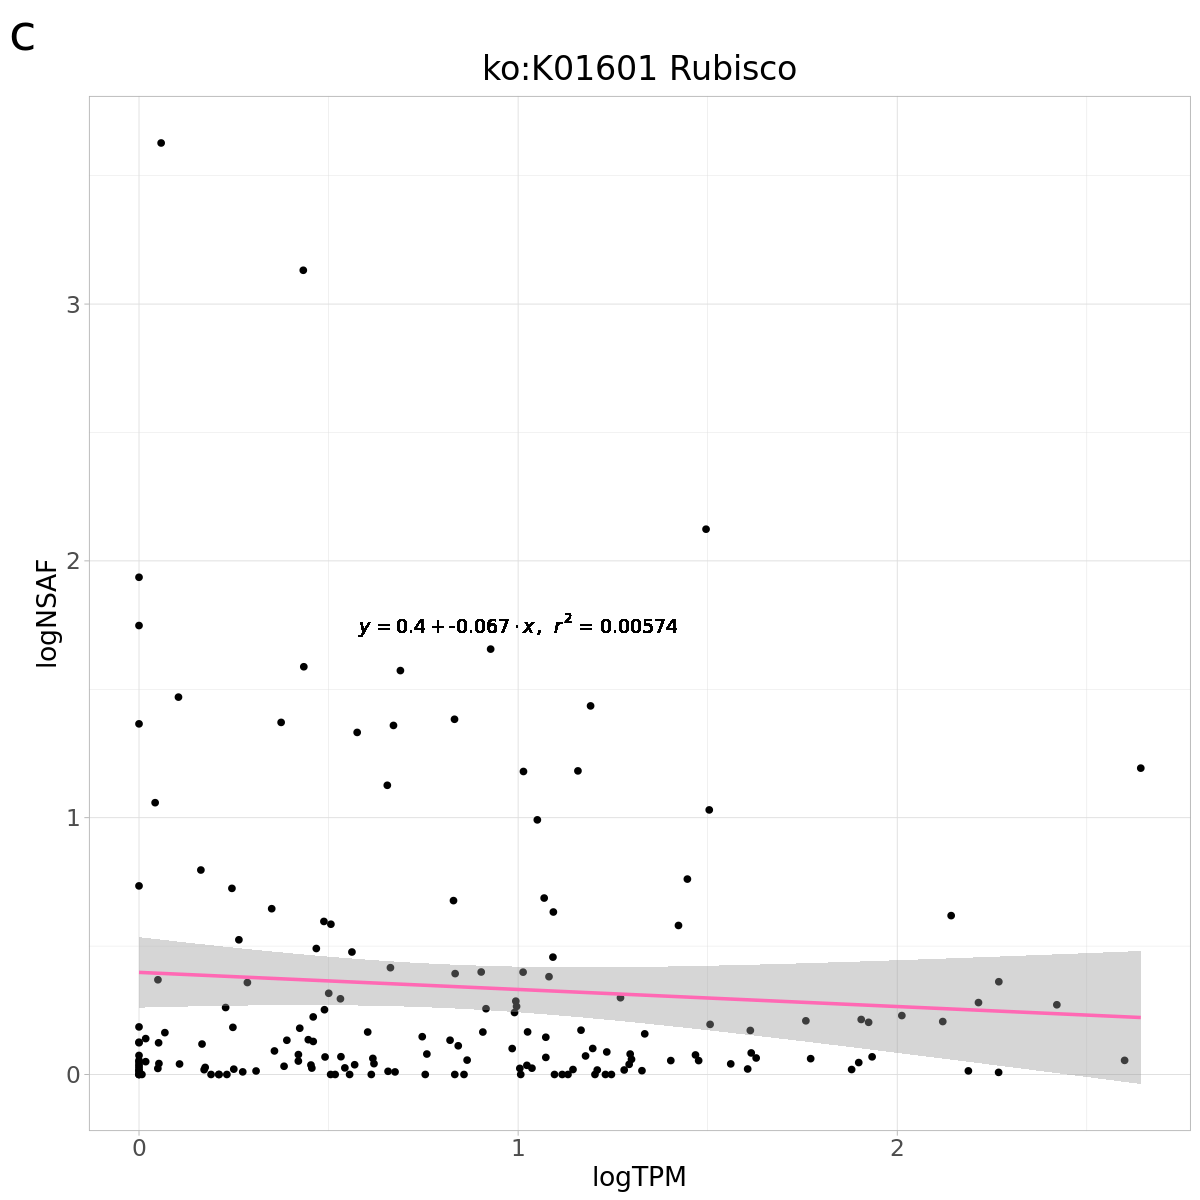

In [166]:
g<-ggplot(y, aes(x=logTPM, y=logNSAF)) + geom_point() + theme_light() + geom_smooth(method = "lm", color="#FF69B4",se = TRUE) 
two<-g +  theme(axis.text=element_text(size=14),axis.title=element_text(size=16))  +
  labs(tags = "c") + theme(plot.tag = element_text(size = 30))  +
geom_text(x = 1, y = 1.75, label = lm_eqn(y), parse = TRUE, size=4) +  ggtitle('ko:K01601 Rubisco') + theme(plot.title = element_text(hjust = 0.5,size=20))
two

In [167]:
library(caroline)
sum<-groupBy(a, by='KEGG_ko.x',clmns=c('sum_NSAF','sum_TPM'),aggregation='mean') # or aggregate by sum
sum$logNSAF<-log(sum$sum_NSAF+1)
sum$logTPM<-log(sum$sum_TPM+1)
head(sum)

Warning message in groupBy(a, by = "KEGG_ko.x", clmns = c("sum_NSAF", "sum_TPM"), :
“automatically extending your only specified aggregation to all  2  clmns”


,sum_NSAF,sum_TPM,logNSAF,logTPM
,<dbl>,<dbl>,<dbl>,<dbl>
"ko:K00001,ko:K00344",0.05848059,0.3857340,0.05683447,0.3262300
ko:K00006,0.21693786,0.3430916,0.19633775,0.2949741
ko:K00012,0.29266144,0.7813657,0.25670322,0.5773803
"ko:K00015,ko:K00474,ko:K02880,ko:K06479,ko:K08267",0.15400012,0.4492990,0.14323427,0.3710800
ko:K00016,1.32236004,1.9852275,0.84258393,1.0936760
ko:K00024,0.16149189,0.9928435,0.14970529,0.6895625


In [168]:
sum$KO<-rownames(sum)
RBC<-subset(sum, KO == "ko:K01601")
RBC2<-subset(sum, KO == "ko:K01601,ko:K01963")
RBC3<-subset(sum, KO == "ko:K01601,ko:K08965")
NRT<-subset(sum, KO == "ko:K02575")

In [177]:
write.csv(sum, 'concordance.csv')

In [171]:
model <- lm(logNSAF~logTPM, data=sum)
#summary(model)
#library('lmtest')
bptest(model, ~ logTPM + I(logTPM^2), data = sum)


	studentized Breusch-Pagan test

data:  model
BP = 21.23, df = 2, p-value = 2.454e-05


In [172]:
nrow(sum)

[1] 1428

`geom_smooth()` using formula = 'y ~ x'


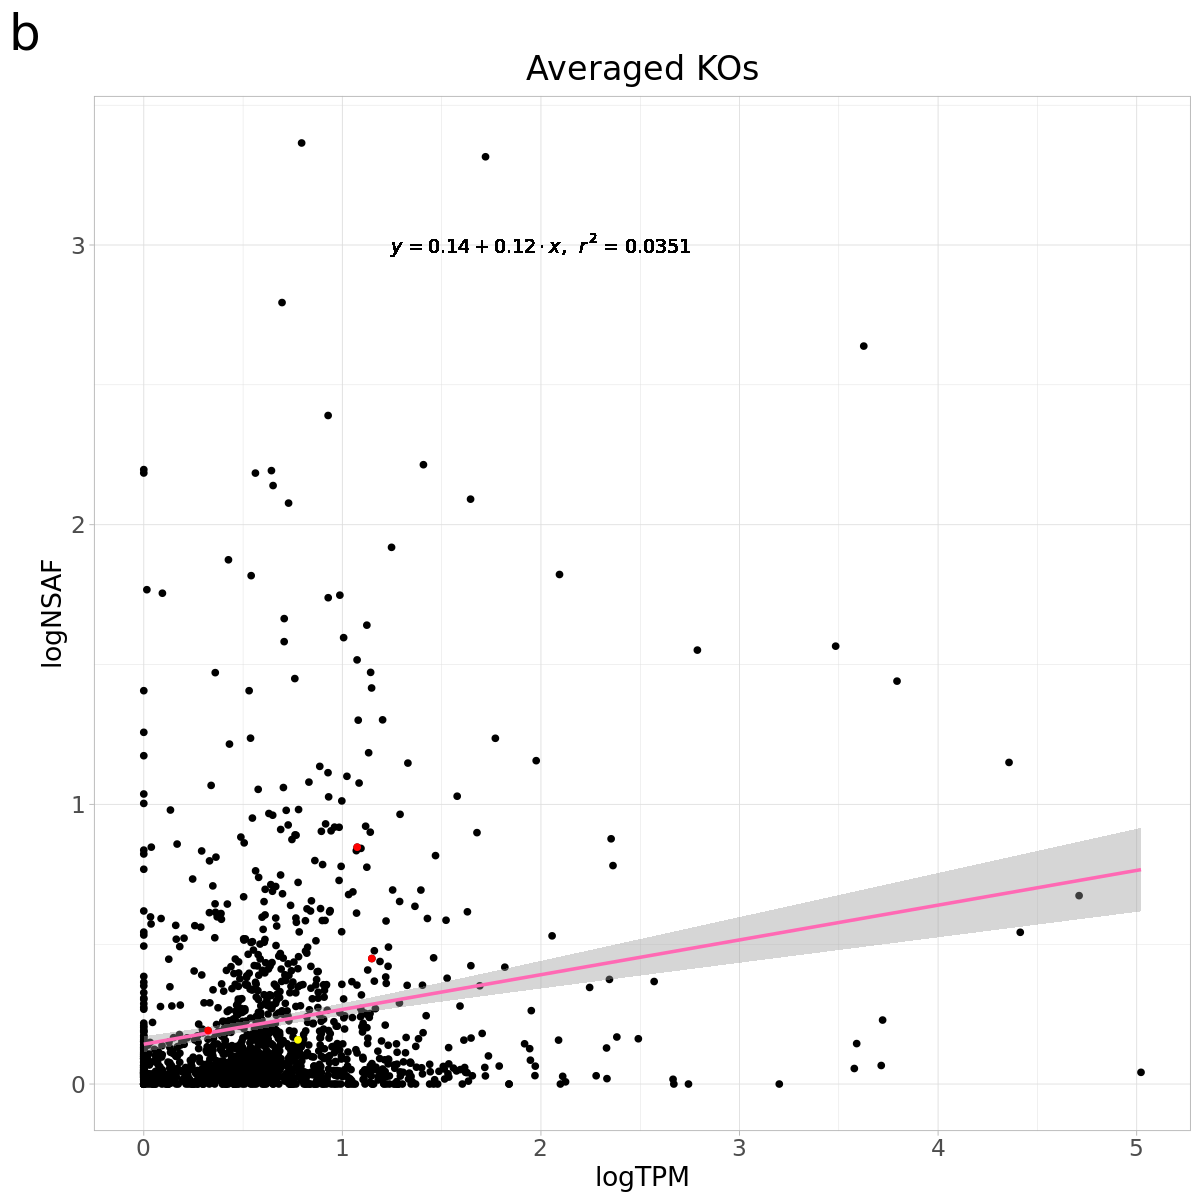

In [173]:
g<-ggplot(sum, aes(x=logTPM, y=logNSAF)) + geom_point() + theme_light() + geom_smooth(method = "lm", color="#FF69B4",se = TRUE)
three<-g +  theme(axis.text=element_text(size=14),axis.title=element_text(size=16))  + geom_point(data=RBC, colour="red") +geom_point(data=RBC2, colour="red") +geom_point(data=RBC3, colour="red") + geom_point(data=NRT, colour="yellow") +
geom_text(x = 2, y = 3, label = lm_eqn(sum), parse = TRUE,size=4) +
  labs(tags = "b") + theme(plot.tag = element_text(size = 30))  + ggtitle('Averaged KOs') + theme(plot.title = element_text(hjust = 0.5,size=20))
three

In [150]:
#zoom<-sum[sum$logTPM < 0.5, ] #25 for sum, 1.5 for mean
#zoom1<-zoom[zoom$logNSAF < 0.25, ] #25 for sum, 0.25 for mean

Warning message in groupBy(a, by = "KEGG_ko.x", clmns = c("sum_NSAF", "sum_TPM"), :
“automatically extending your only specified aggregation to all  2  clmns”
`geom_smooth()` using formula = 'y ~ x'


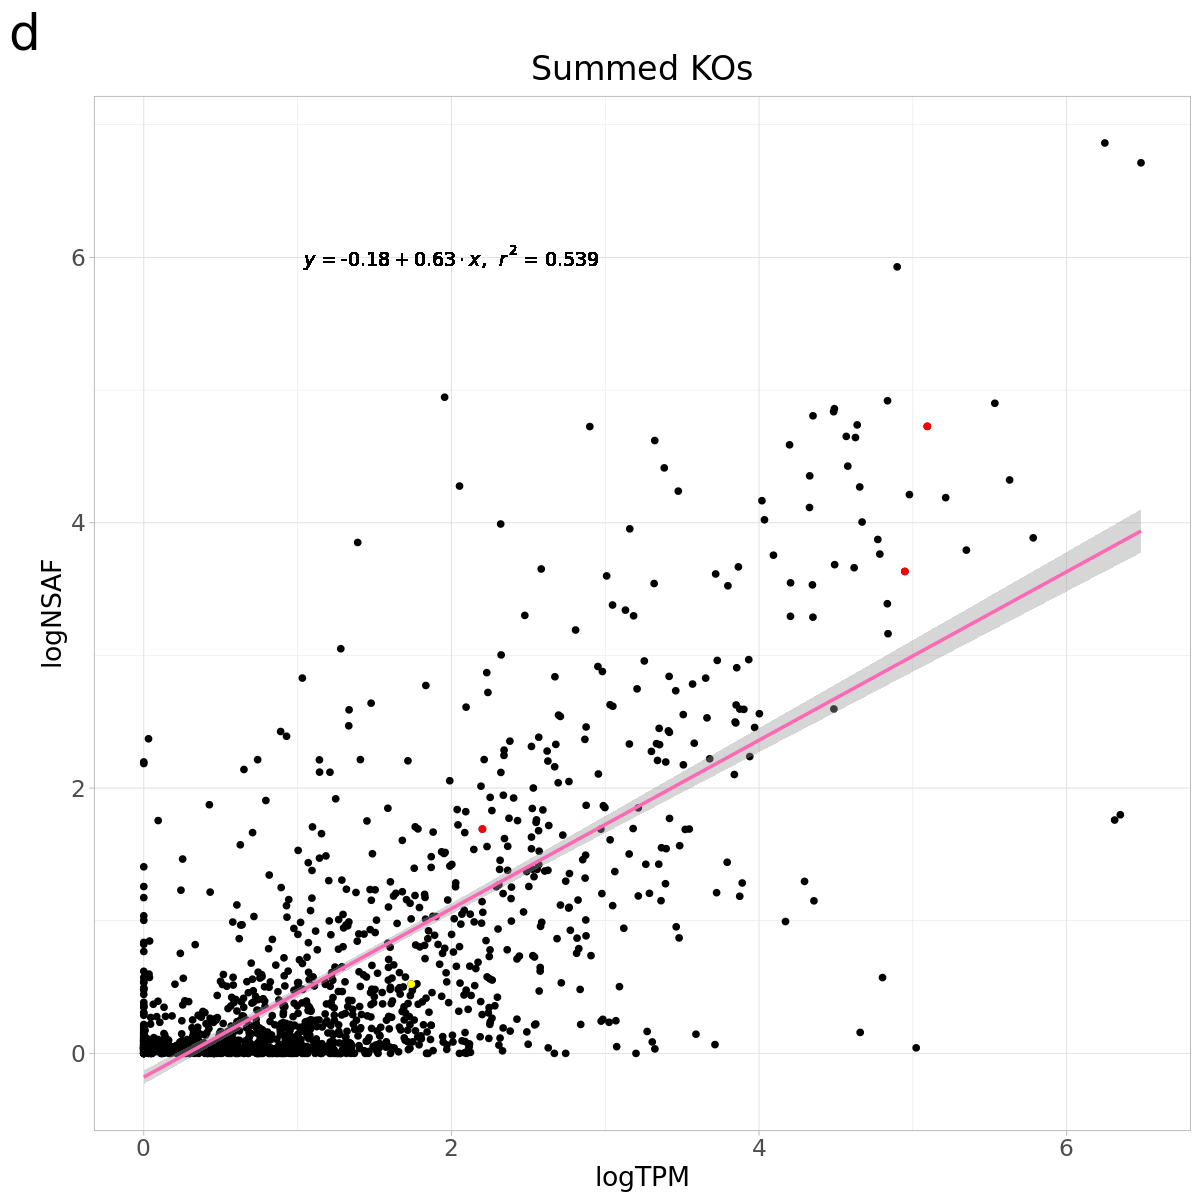

In [174]:
library(caroline)
sum<-groupBy(a, by='KEGG_ko.x',clmns=c('sum_NSAF','sum_TPM'),aggregation='sum')
sum$logNSAF<-log(sum$sum_NSAF+1)
sum$logTPM<-log(sum$sum_TPM+1)
sum$KO<-rownames(sum)

RBC<-subset(sum, KO == "ko:K01601")
RBC2<-subset(sum, KO == "ko:K01601,ko:K01963")
RBC3<-subset(sum, KO == "ko:K01601,ko:K08965")
NRT<-subset(sum, KO == "ko:K02575")

g<-ggplot(sum, aes(x=logTPM, y=logNSAF)) + geom_point() + theme_light() + geom_smooth(method = "lm", color="#FF69B4",se = TRUE)
four<-g +  theme(axis.text=element_text(size=14),axis.title=element_text(size=16))  + geom_point(data=RBC, colour="red") +geom_point(data=RBC2, colour="red") +geom_point(data=RBC3, colour="red") +geom_point(data=NRT, colour="yellow") +
geom_text(x = 2, y = 6, label = lm_eqn(sum), parse = TRUE,size=4) +  
 labs(tags = "d") + theme(plot.tag = element_text(size = 30))+ 
ggtitle('Summed KOs') + theme(plot.title = element_text(hjust = 0.5,size=20))
four

#g<-ggplot(zoom1, aes(x=logTPM, y=logNSAF)) + geom_point() + theme_light() + geom_smooth(method = "lm", color="#FF69B4",se = TRUE)
#four<-g +  theme(axis.text=element_text(size=14),axis.title=element_text(size=16))  + geom_point(data=NRT, colour="yellow") +
#geom_text(x = 0.1, y = 0.235, label = lm_eqn(zoom1), parse = TRUE,size=4) +  ggtitle('Zoomed-in Averaged KOs') + theme(plot.title = element_text(hjust = 0.5,size=20))
#four

In [175]:
library('gridExtra')

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


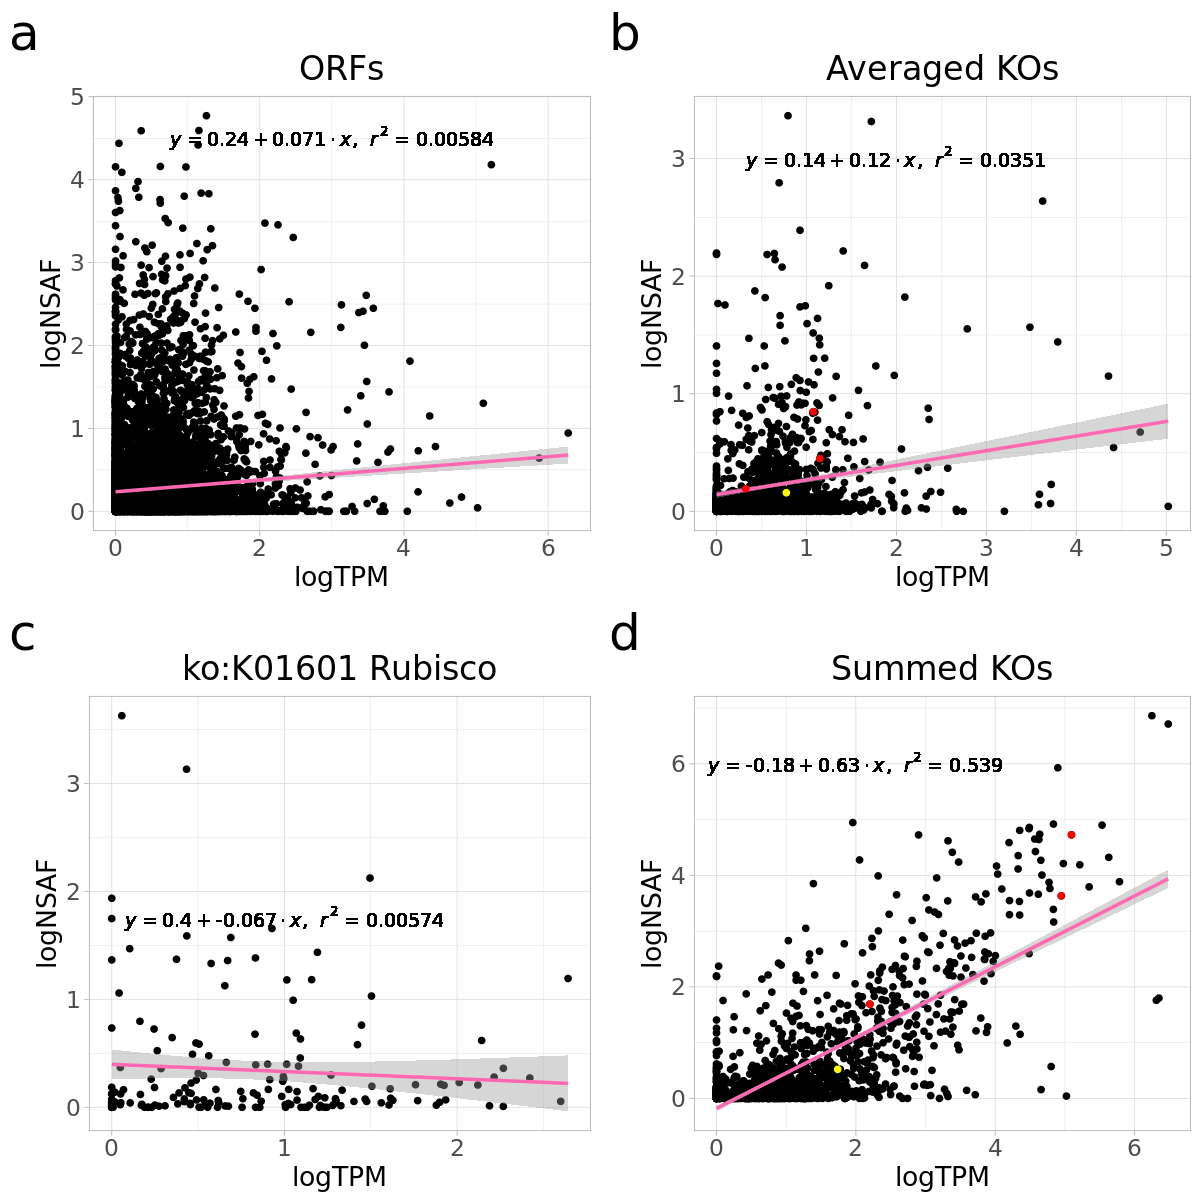

In [176]:
options(repr.plot.width = 10, repr.plot.height = 10)
fin<-grid.arrange(one, three, two, four, nrow=2)

In [156]:
ggsave(file="ORFS_NSAF_TPM_mean.eps", fin, dpi = 600, width = 10, height = 10)
ggsave(file="ORFS_NSAF_TPM_mean.png", fin, dpi = 600, width = 10, height = 10)

Warning message in grid.Call.graphics(C_polygon, x$x, x$y, index):
“semi-transparency is not supported on this device: reported only once per page”


# Radiolarian profiles

In [6]:
a<-read.csv('euk_ORFs_NSAF_KEGG.csv')
tpm<-read.csv('euk_ORFs_TPM_KEGG.csv')
head(a)

,X,transcript_name,KEGG_ko,X1_30_0.2,X1_115_0.2,X1_30_3,X1_115_3,X1_150,X1_200,X1_300,⋯,X7_500,X8_20,X8_40,X8_120,X8_175,X8_400,X8_800,X8_250,Class,Division
,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,1,megahit_HN001_k141_102362.p1,ko:K02875,0.00000000,0,0.00000000,0.00000000,0,0,0,⋯,NA,0.0000000,0.0000000,0,0,0,0,0,SG_Telonemia_Indeterminate,Telonemia
2,2,megahit_HN001_k141_103848.p3,-,0.00000000,0,0.00000000,0.03230989,0,0,0,⋯,NA,0.0000000,0.0765758,0,0,0,0,0,Prymnesiophyceae,Haptophyta
3,3,megahit_HN001_k141_106962.p1,ko:K01412,0.00000000,0,0.00000000,0.00000000,0,0,0,⋯,NA,0.0000000,0.0000000,0,0,0,0,0,Dictyochophyceae,Stramenopiles_X
4,4,megahit_HN001_k141_113192.p1,ko:K13811,0.00000000,0,0.00000000,0.00000000,0,0,0,⋯,NA,0.0000000,0.0000000,0,0,0,0,0,SG_Opisthokonta_Indeterminate,Choanoflagellida
5,5,megahit_HN001_k141_116190.p1,"ko:K00860,ko:K00958,ko:K01507,ko:K03103,ko:K13811",0.01670825,0,0.04458142,0.00000000,0,0,0,⋯,NA,0.0273209,0.0000000,0,0,0,0,0,Prymnesiophyceae,Haptophyta
6,6,megahit_HN001_k141_116274.p1,-,0.03665922,0,0.00000000,0.00000000,0,0,0,⋯,NA,0.0000000,0.0000000,0,0,0,0,0,Cnidaria,Metazoa


In [72]:
goi<-c('ko:K03839')

In [10]:
options(repr.matrix.max.rows=3000, repr.matrix.max.cols=200)

In [76]:
b<-tpm[tpm$KEGG_ko %in% goi,]

In [77]:
b<-b[,-1]
b<-b[,-1]
b<-b[,-1]
b<-b[,-45]
library(dplyr)
c<-b %>%
    group_by(Division) %>% 
    summarise_each(list(sum))

Warning message:
“`summarise_each()` was deprecated in dplyr 0.7.0.
ℹ Please use `across()` instead.”


In [67]:
rhi<-c(' Radiolaria')
test<-merge[merge$division %in% rhi,]
head(test)

,transcript_name,1_30_0.2,1_115_0.2,1_30_3,1_115_3,1_150,1_200,1_300,1_400,1_600,⋯,division,class,order,family,genus,species,classification,max_pid,ambiguous,counts
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<lgl>
megahit_HN001_k141_132268.p1,megahit_HN001_k141_132268.p1,0,0,0,0,0,0,0,0,0,⋯,Radiolaria,Polycystinea,SG_Rhizaria_Indeterminate,NA,NA,NA,SG_Rhizaria_Indeterminate,240.56,1,NA
megahit_HN001_k141_245622.p1,megahit_HN001_k141_245622.p1,0,0,0,0,0,0,0,0,0,⋯,Radiolaria,Symphyacanthida,SG_Rhizaria_Indeterminate,SG_Rhizaria_Indeterminate,NA,NA,SG_Rhizaria_Indeterminate,609.16,0,NA
megahit_HN002_k141_129785.p1,megahit_HN002_k141_129785.p1,0,0,0,2,0,1,0,0,0,⋯,Radiolaria,Polycystinea,NA,NA,NA,NA,Polycystinea,231.83,0,NA
megahit_HN002_k141_133446.p2,megahit_HN002_k141_133446.p2,0,0,0,0,0,0,0,0,0,⋯,Radiolaria,Polycystinea,SG_Rhizaria_Indeterminate,SG_Rhizaria_Indeterminate,NA,NA,SG_Rhizaria_Indeterminate,591.70,1,NA
megahit_HN002_k141_240288.p2,megahit_HN002_k141_240288.p2,0,0,0,0,1,0,0,0,0,⋯,Radiolaria,Polycystinea,SG_Rhizaria_Indeterminate,SG_Rhizaria_Indeterminate,NA,NA,SG_Rhizaria_Indeterminate,541.26,1,NA
megahit_HN002_k141_288275.p1,megahit_HN002_k141_288275.p1,0,0,0,0,0,0,0,0,0,⋯,Radiolaria,Arthracanthida,SG_Rhizaria_Indeterminate,SG_Rhizaria_Indeterminate,Phyllostaurus,NA,Phyllostaurus,224.07,0,NA


In [85]:
test<-test[,-88]

In [86]:
write.csv(test, 'radio_proteins.csv')

# OPP processing

In [7]:
#a<-read.csv('SamplesViewReportCLIO_AE1913merged_trans210506_updated220606exclusive.csv',header=T, stringsAsFactors=F) 
a<-read.csv('Samples View Report for CLIO all AE1913 merged trans210506 updated 220606 total spectrum count.csv', header=T, stringsAsFactors=F)

In [17]:
#read in egg (from above -eggnog output), taxa (from above - eukulele output), a (formatted spectral counts)
egg<-subset(egg, select = c('transcript_name','KEGG_ko','EC','Preferred_name','PFAMs'))
colnames(egg)<-c('Name','kegg_id', 'enzyme_comm_id','protein_name','pfams_id')
head(egg)

,Name,kegg_id,enzyme_comm_id,protein_name,pfams_id
,<chr>,<chr>,<chr>,<chr>,<chr>
6,megahit_HN001_k141_10.p1,ko:K02343,2.7.7.7,dnaX,"DNA_pol3_delta2,DNA_pol3_gamma3,DNA_pol3_tau_4,DNA_pol3_tau_5,Trypan_PARP"
7,megahit_HN001_k141_100008.p1,ko:K03798,-,ftsH,"AAA,FtsH_ext,Peptidase_M41"
8,megahit_HN001_k141_100035.p1,ko:K00485,1.14.13.8,-,"FMO-like,K_oxygenase"
9,megahit_HN001_k141_100042.p1,ko:K02400,-,flhA,FHIPEP
10,megahit_HN001_k141_100044.p2,ko:K10408,-,-,"AAA_5,AAA_6,AAA_7,AAA_8,AAA_9,DHC_N1,DHC_N2,Dynein_heavy,MT"
11,megahit_HN001_k141_100053.p1,-,-,-,"Plug,TonB_dep_Rec"


In [18]:
nrow(egg)

[1] 5417298

In [19]:
nrow(tax)

[1] 7329870

In [20]:
nrow(a)

[1] 78356

In [21]:
b<-merge(a, egg, by='Name',all=T)
head(b)

,Name,X1_30_0.2,X1_115_0.2,X1_30_3,X1_115_3,X1_150,X1_200,X1_300,X1_400,X1_600,⋯,X8_120,X8_175,X8_400,X8_800,X8_250,X8_600,kegg_id,enzyme_comm_id,protein_name,pfams_id
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>
1,## 5417303 queries scanned,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,,,,
2,## Rate: 193.59 q/s,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,,,,
3,## Total time (seconds): 27983.91349506378,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,,,,
4,megahit_HN001_k141_10.p1,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,ko:K02343,2.7.7.7,dnaX,"DNA_pol3_delta2,DNA_pol3_gamma3,DNA_pol3_tau_4,DNA_pol3_tau_5,Trypan_PARP"
5,megahit_HN001_k141_100008.p1,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,ko:K03798,-,ftsH,"AAA,FtsH_ext,Peptidase_M41"
6,megahit_HN001_k141_100035.p1,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,ko:K00485,1.14.13.8,-,"FMO-like,K_oxygenase"


In [22]:
c <- b %>%
  drop_na(X1_30_0.2)
head(c)

,Name,X1_30_0.2,X1_115_0.2,X1_30_3,X1_115_3,X1_150,X1_200,X1_300,X1_400,X1_600,⋯,X8_120,X8_175,X8_400,X8_800,X8_250,X8_600,kegg_id,enzyme_comm_id,protein_name,pfams_id
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>
1,megahit_HN001_k141_100053.p1,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,-,-,-,"Plug,TonB_dep_Rec"
2,megahit_HN001_k141_100230.p1,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,ko:K03405,6.6.1.1,chlI,Mg_chelatase
3,megahit_HN001_k141_10061.p1,1,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,ko:K03624,-,greA,"GreA_GreB,GreA_GreB_N"
4,megahit_HN001_k141_100671.p1,1,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,NA,NA,NA,NA
5,megahit_HN001_k141_101601.p1,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,ko:K01938,6.3.4.3,fhs,FTHFS
6,megahit_HN001_k141_101642.p1,5,2,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,-,-,-,"SBP_bac_1,SBP_bac_8"


In [26]:
tax$Name<-tax$transcript_name
tax<-subset(tax, select = c('Name','supergroup','classification'))

In [27]:
head(tax)

,Name,supergroup,classification
,<chr>,<chr>,<chr>
megahit_HN001_k141_10.p1,megahit_HN001_k141_10.p1,Proteobacteria,SAR86_XX
megahit_HN001_k141_100004.p1,megahit_HN001_k141_100004.p1,Alveolata,Gymnodiniales
megahit_HN001_k141_100008.p1,megahit_HN001_k141_100008.p1,Proteobacteria,No species
megahit_HN001_k141_100021.p1,megahit_HN001_k141_100021.p1,Alveolata,Dinophyceae
megahit_HN001_k141_100035.p1,megahit_HN001_k141_100035.p1,Hacrobia,Isochrysidales
megahit_HN001_k141_100042.p1,megahit_HN001_k141_100042.p1,Proteobacteria,Alphaproteobacteria


In [28]:
d<-merge(c, tax, by='Name',all=T)
head(d)

,Name,X1_30_0.2,X1_115_0.2,X1_30_3,X1_115_3,X1_150,X1_200,X1_300,X1_400,X1_600,⋯,X8_400,X8_800,X8_250,X8_600,kegg_id,enzyme_comm_id,protein_name,pfams_id,supergroup,classification
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,megahit_HN001_k141_10.p1,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,Proteobacteria,SAR86_XX
2,megahit_HN001_k141_100004.p1,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,Alveolata,Gymnodiniales
3,megahit_HN001_k141_100008.p1,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,Proteobacteria,No species
4,megahit_HN001_k141_100021.p1,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,Alveolata,Dinophyceae
5,megahit_HN001_k141_100035.p1,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,Hacrobia,Isochrysidales
6,megahit_HN001_k141_100042.p1,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,Proteobacteria,Alphaproteobacteria


In [29]:
e <- d %>%
  drop_na(X1_30_0.2)
head(e)

,Name,X1_30_0.2,X1_115_0.2,X1_30_3,X1_115_3,X1_150,X1_200,X1_300,X1_400,X1_600,⋯,X8_400,X8_800,X8_250,X8_600,kegg_id,enzyme_comm_id,protein_name,pfams_id,supergroup,classification
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,megahit_HN001_k141_100053.p1,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,-,-,-,"Plug,TonB_dep_Rec",Proteobacteria,SAR86
2,megahit_HN001_k141_100230.p1,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,ko:K03405,6.6.1.1,chlI,Mg_chelatase,Cyanobacteria,Cyanobacteria
3,megahit_HN001_k141_10061.p1,1,0,0,0,0,0,0,0,0,⋯,0,0,0,0,ko:K03624,-,greA,"GreA_GreB,GreA_GreB_N",Proteobacteria,No species
4,megahit_HN001_k141_100671.p1,1,0,0,0,0,0,0,0,0,⋯,0,0,0,0,NA,NA,NA,NA,NA,NA
5,megahit_HN001_k141_101601.p1,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,ko:K01938,6.3.4.3,fhs,FTHFS,Proteobacteria,uncultured SAR86 cluster bacterium
6,megahit_HN001_k141_101642.p1,5,2,0,0,0,0,0,0,0,⋯,0,0,0,0,-,-,-,"SBP_bac_1,SBP_bac_8",Firmicutes,Firmicutes


In [30]:
nrow(e)

[1] 78356

In [31]:
f<-e[,-80]
head(f)

,Name,X1_30_0.2,X1_115_0.2,X1_30_3,X1_115_3,X1_150,X1_200,X1_300,X1_400,X1_600,⋯,X8_400,X8_800,X8_250,X8_600,kegg_id,enzyme_comm_id,protein_name,pfams_id,supergroup,classification
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,megahit_HN001_k141_100053.p1,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,-,-,-,"Plug,TonB_dep_Rec",Proteobacteria,SAR86
2,megahit_HN001_k141_100230.p1,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,ko:K03405,6.6.1.1,chlI,Mg_chelatase,Cyanobacteria,Cyanobacteria
3,megahit_HN001_k141_10061.p1,1,0,0,0,0,0,0,0,0,⋯,0,0,0,0,ko:K03624,-,greA,"GreA_GreB,GreA_GreB_N",Proteobacteria,No species
4,megahit_HN001_k141_100671.p1,1,0,0,0,0,0,0,0,0,⋯,0,0,0,0,NA,NA,NA,NA,NA,NA
5,megahit_HN001_k141_101601.p1,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,ko:K01938,6.3.4.3,fhs,FTHFS,Proteobacteria,uncultured SAR86 cluster bacterium
6,megahit_HN001_k141_101642.p1,5,2,0,0,0,0,0,0,0,⋯,0,0,0,0,-,-,-,"SBP_bac_1,SBP_bac_8",Firmicutes,Firmicutes


In [32]:
library(reshape2)
g<-melt(f)


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths


Using Name, kegg_id, enzyme_comm_id, protein_name, pfams_id, supergroup, classification as id variables



In [33]:
colnames(g)<-c('protein_id','kegg_id','enzyme_comm_id','protein_name','pfams_id','supergroup','classification','sample_id','spectral_count')

In [34]:
head(g)

,protein_id,kegg_id,enzyme_comm_id,protein_name,pfams_id,supergroup,classification,sample_id,spectral_count
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<fct>,<int>
1,megahit_HN001_k141_100053.p1,-,-,-,"Plug,TonB_dep_Rec",Proteobacteria,SAR86,X1_30_0.2,0
2,megahit_HN001_k141_100230.p1,ko:K03405,6.6.1.1,chlI,Mg_chelatase,Cyanobacteria,Cyanobacteria,X1_30_0.2,0
3,megahit_HN001_k141_10061.p1,ko:K03624,-,greA,"GreA_GreB,GreA_GreB_N",Proteobacteria,No species,X1_30_0.2,1
4,megahit_HN001_k141_100671.p1,NA,NA,NA,NA,NA,NA,X1_30_0.2,1
5,megahit_HN001_k141_101601.p1,ko:K01938,6.3.4.3,fhs,FTHFS,Proteobacteria,uncultured SAR86 cluster bacterium,X1_30_0.2,0
6,megahit_HN001_k141_101642.p1,-,-,-,"SBP_bac_1,SBP_bac_8",Firmicutes,Firmicutes,X1_30_0.2,5


In [35]:
g$cruise_id<-c('AE1913')
library(tidyverse)
h <- g %>%
mutate(station_id = str_extract(sample_id, "(?<=X)\\d+"))
i <- h %>%
mutate(depth_m = str_extract(sample_id, "(?<=_)\\d+"))
i$minimum_filter_size_microns<-0.2
i$maximum_filter_size_microns<-51
j <- i %>%
  mutate(date_y_m_d = case_when(
    station_id == 1 ~ "6/17/2019",
    station_id == 2 ~ "6/19/2019",
    station_id == 3 ~ "6/20/2019",
    station_id == 5 ~ "6/22/2019",
    station_id == 6 ~ "6/24/2019",
    station_id == 7 ~ "6/26/2019",
    station_id == 8 ~ "6/27/2019",
  ))
k <- j %>%
  mutate(latitude_dd = case_when(
    station_id == 1 ~ 31.666888,
    station_id == 2 ~ 32.995067,
    station_id == 3 ~ 33.945368,
    station_id == 5 ~ 35.986762,
    station_id == 6 ~ 37.002833,
    station_id == 7 ~ 37.413163,
    station_id == 8 ~ 38.528372,
  ))
l <- k %>%
  mutate(longitude_dd = case_when(
    station_id == 1 ~ -64.166293,
    station_id == 2 ~ -65.976848,
    station_id == 3 ~ -67.018133,
    station_id == 5 ~ -69.017452,
    station_id == 6 ~ -70.00289,
    station_id == 7 ~ -70.320077,
    station_id == 8 ~ -70.84278,
  ))
head(l)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ──────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.1     ✔ purrr   1.0.2
✔ tibble  3.2.1     ✔ dplyr   1.1.3
✔ readr   2.0.1     ✔ forcats 0.5.1

── Conflicts ─────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



,protein_id,kegg_id,enzyme_comm_id,protein_name,pfams_id,supergroup,classification,sample_id,spectral_count,cruise_id,station_id,depth_m,minimum_filter_size_microns,maximum_filter_size_microns,date_y_m_d,latitude_dd,longitude_dd
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<fct>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
1,megahit_HN001_k141_100053.p1,-,-,-,"Plug,TonB_dep_Rec",Proteobacteria,SAR86,X1_30_0.2,0,AE1913,1,30,0.2,51,6/17/2019,31.66689,-64.16629
2,megahit_HN001_k141_100230.p1,ko:K03405,6.6.1.1,chlI,Mg_chelatase,Cyanobacteria,Cyanobacteria,X1_30_0.2,0,AE1913,1,30,0.2,51,6/17/2019,31.66689,-64.16629
3,megahit_HN001_k141_10061.p1,ko:K03624,-,greA,"GreA_GreB,GreA_GreB_N",Proteobacteria,No species,X1_30_0.2,1,AE1913,1,30,0.2,51,6/17/2019,31.66689,-64.16629
4,megahit_HN001_k141_100671.p1,NA,NA,NA,NA,NA,NA,X1_30_0.2,1,AE1913,1,30,0.2,51,6/17/2019,31.66689,-64.16629
5,megahit_HN001_k141_101601.p1,ko:K01938,6.3.4.3,fhs,FTHFS,Proteobacteria,uncultured SAR86 cluster bacterium,X1_30_0.2,0,AE1913,1,30,0.2,51,6/17/2019,31.66689,-64.16629
6,megahit_HN001_k141_101642.p1,-,-,-,"SBP_bac_1,SBP_bac_8",Firmicutes,Firmicutes,X1_30_0.2,5,AE1913,1,30,0.2,51,6/17/2019,31.66689,-64.16629


In [36]:
write.csv(l,'opp_TOTAL_spectralcounts.csv')

In [1]:
#Read in peptide report converted to .csv by Mak and headers cleaned by me. Original file name: "Peptide Quantitative Report for CLIO all AE1913 merged trans210506 updated 220606.xls.csv"

In [63]:
a<-read.csv('OPP_peptides.csv')

In [64]:
library(reshape2)
b<-melt(a)

Using Protein, Peptide as id variables



In [65]:
colnames(b)<-c('protein_id', 'peptide_sequence','sample_id','spectral_count_sum')
head(b)

,protein_id,peptide_sequence,sample_id,spectral_count_sum
,<chr>,<chr>,<fct>,<int>
1,"GENE.megahit_HN001_k141_100053~~megahit_HN001_k141_100053.p1 ORF type:internal len:612 (+),score=-4.40 megahit_HN001_k141_100053:3-1835(+)",DGVIFNTVTSNDIDSR,X1_30_0.2,NA
2,"GENE.megahit_HN001_k141_100053~~megahit_HN001_k141_100053.p1 ORF type:internal len:612 (+),score=-4.40 megahit_HN001_k141_100053:3-1835(+)",DMPAEAGGLINDQR,X1_30_0.2,NA
3,"GENE.megahit_HN001_k141_100053~~megahit_HN001_k141_100053.p1 ORF type:internal len:612 (+),score=-4.40 megahit_HN001_k141_100053:3-1835(+)",IEVLEGPQGTLYGR,X1_30_0.2,NA
4,"GENE.megahit_HN001_k141_100053~~megahit_HN001_k141_100053.p1 ORF type:internal len:612 (+),score=-4.40 megahit_HN001_k141_100053:3-1835(+)",IEVLEGPQGTLYGR,X1_30_0.2,NA
5,"GENE.megahit_HN001_k141_100053~~megahit_HN001_k141_100053.p1 ORF type:internal len:612 (+),score=-4.40 megahit_HN001_k141_100053:3-1835(+)",NTTTGLVNVITNKPGAETYLDLTVGADGLSK,X1_30_0.2,NA
6,"GENE.megahit_HN001_k141_100230~~megahit_HN001_k141_100230.p1 ORF type:5prime_partial len:182 (-),score=71.20 megahit_HN001_k141_100230:43-588(-)",LSAVTIDDDLR,X1_30_0.2,NA


In [66]:
b$cruise_id<-c('AE1913')
library(tidyverse)
h <- b %>%
mutate(station_id = str_extract(sample_id, "(?<=X)\\d+"))
i <- h %>%
mutate(depth_m = str_extract(sample_id, "(?<=_)\\d+"))
i$minimum_filter_size_microns<-0.2
i$maximum_filter_size_microns<-51
j <- i %>%
  mutate(date_y_m_d = case_when(
    station_id == 1 ~ "6/17/2019",
    station_id == 2 ~ "6/19/2019",
    station_id == 3 ~ "6/20/2019",
    station_id == 5 ~ "6/22/2019",
    station_id == 6 ~ "6/24/2019",
    station_id == 7 ~ "6/26/2019",
    station_id == 8 ~ "6/27/2019",
  ))
k <- j %>%
  mutate(latitude_dd = case_when(
    station_id == 1 ~ 31.666888,
    station_id == 2 ~ 32.995067,
    station_id == 3 ~ 33.945368,
    station_id == 5 ~ 35.986762,
    station_id == 6 ~ 37.002833,
    station_id == 7 ~ 37.413163,
    station_id == 8 ~ 38.528372,
  ))
l <- k %>%
  mutate(longitude_dd = case_when(
    station_id == 1 ~ -64.166293,
    station_id == 2 ~ -65.976848,
    station_id == 3 ~ -67.018133,
    station_id == 5 ~ -69.017452,
    station_id == 6 ~ -70.00289,
    station_id == 7 ~ -70.320077,
    station_id == 8 ~ -70.84278,
  ))
head(l)

,protein_id,peptide_sequence,sample_id,spectral_count_sum,cruise_id,station_id,depth_m,minimum_filter_size_microns,maximum_filter_size_microns,date_y_m_d,latitude_dd,longitude_dd
,<chr>,<chr>,<fct>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
1,"GENE.megahit_HN001_k141_100053~~megahit_HN001_k141_100053.p1 ORF type:internal len:612 (+),score=-4.40 megahit_HN001_k141_100053:3-1835(+)",DGVIFNTVTSNDIDSR,X1_30_0.2,NA,AE1913,1,30,0.2,51,6/17/2019,31.66689,-64.16629
2,"GENE.megahit_HN001_k141_100053~~megahit_HN001_k141_100053.p1 ORF type:internal len:612 (+),score=-4.40 megahit_HN001_k141_100053:3-1835(+)",DMPAEAGGLINDQR,X1_30_0.2,NA,AE1913,1,30,0.2,51,6/17/2019,31.66689,-64.16629
3,"GENE.megahit_HN001_k141_100053~~megahit_HN001_k141_100053.p1 ORF type:internal len:612 (+),score=-4.40 megahit_HN001_k141_100053:3-1835(+)",IEVLEGPQGTLYGR,X1_30_0.2,NA,AE1913,1,30,0.2,51,6/17/2019,31.66689,-64.16629
4,"GENE.megahit_HN001_k141_100053~~megahit_HN001_k141_100053.p1 ORF type:internal len:612 (+),score=-4.40 megahit_HN001_k141_100053:3-1835(+)",IEVLEGPQGTLYGR,X1_30_0.2,NA,AE1913,1,30,0.2,51,6/17/2019,31.66689,-64.16629
5,"GENE.megahit_HN001_k141_100053~~megahit_HN001_k141_100053.p1 ORF type:internal len:612 (+),score=-4.40 megahit_HN001_k141_100053:3-1835(+)",NTTTGLVNVITNKPGAETYLDLTVGADGLSK,X1_30_0.2,NA,AE1913,1,30,0.2,51,6/17/2019,31.66689,-64.16629
6,"GENE.megahit_HN001_k141_100230~~megahit_HN001_k141_100230.p1 ORF type:5prime_partial len:182 (-),score=71.20 megahit_HN001_k141_100230:43-588(-)",LSAVTIDDDLR,X1_30_0.2,NA,AE1913,1,30,0.2,51,6/17/2019,31.66689,-64.16629


In [67]:
#Clean up protein IDs to remove added text from Scaffold
l$protein_id <- gsub(".*~~", "", l$protein_id)

In [68]:
l$protein_id <- gsub("  ORF.*", "", l$protein_id)

In [71]:
write.csv(l, 'opp_peptides.csv')